### Load libraries

In [1]:
# Load libraries, data and pseudorandom nambers for reproducibility
# the number of positive and negatives samples will be displayed
import warnings
warnings.filterwarnings('ignore')
%run scripts/initialize_notebook.py --verbose

HOME: /Users/aerijman/Desktop/AD_summary/publication/analysis


Using TensorFlow backend.


loading data from  /Users/aerijman/Desktop/AD_summary/publication/analysis/data/data_complete.db
positives: 36669 samples
negatives: 1016412 samples




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


    Available methods:
    get_enrichment_scores_table: pandas table with sequences, counts/bin and enrichment scores
    ADPred: Keras model to predict ADs probability in a 30mer.
    Test and Validation sets have 50% positives and 50% negatives.



In [24]:
#df = get_enrichment_scores_table()
np.sum([df.iloc[:,2:].sum(axis=1)>0])
#np.sum(df[1:].sum(axis=1)>0)

36669

---
## Figure 1C
#### Experimental validation of 18 samples with scores representing the sequencing data and fluorescence represents the split between bins.

Mean values of fluorescence are used to compute a enrichment score.  This score correlates to GFP fluoresence of 18 selected mutatns from the library with R=0.79 (log applied to both AD-score and GFP fluorescence).  

Following are the values of fluorescence of the bins for ARG3 experiments.

                ARG3
    bin1 =  120  -  400
    bin2 =  400  -  640
    bin3 =  640  - 1000
    bin4 = 1010  - 7500

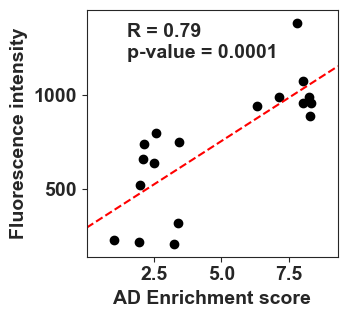

In [162]:
%run -i scripts/figure1C_lukasz.py

loading data from  /Users/aerijman/Desktop/AD_summary/publication/analysis/data/data_complete.db

    Available methods:
    get_enrichment_scores_table: pandas table with sequences, counts/bin and enrichment scores
    ADPred: Keras model to predict ADs probability in a 30mer.
    Test and Validation sets have 50% positives and 50% negatives.



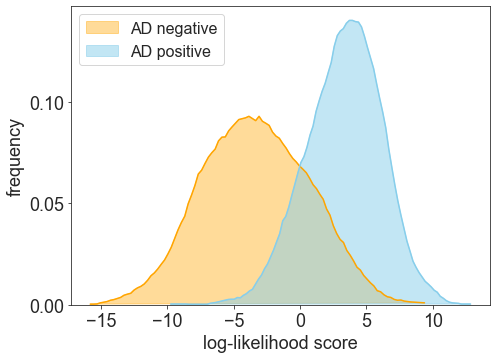

In [3]:
# plots from all different splits during the CV can be plotted with --plot-intermediates
%run -i scripts/figure2A_lukasz.py --only-one-example

---
## Figure 2B
### Logistic regression of aminoacid frequencies and plot coefficients

The default [LogisticRegressionCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html) in scikit-learn uses stratifiedKfold.  
A dictionary, `single_aa_performances` is populated with results obtained in this cell

33003  positives and  1012746  negatives
test	AUROC=0.9469	accuracy=0.8875	AUPRC=0.9318
valid	AUROC=0.9441	accuracy=0.8767	AUPRC=0.9306
single_aa_composition available


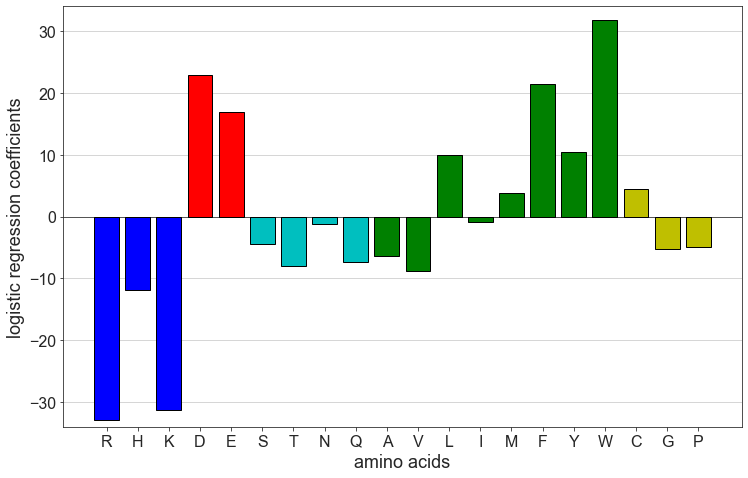

In [3]:
%run -i scripts/figure2B_lukasz.py --only-one-example
#joblib.dump(model_single_aa_composition, analysis_home+'/models/model_single_aa_composition.joblib')

---
### Logistic regression of aminoacid composition and position

600 features: 30 positions by 20 aminoacids

test	AUROC=0.9547	accuracy=0.9014
valid	AUROC=0.9547	accuracy=0.9014


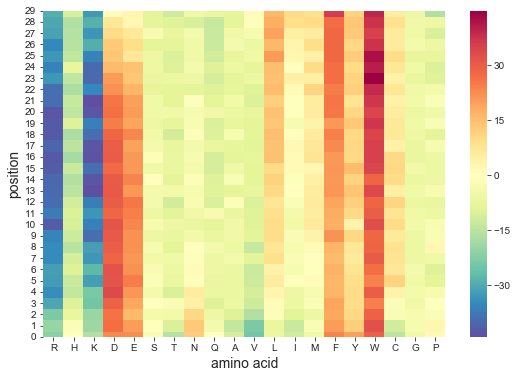

In [6]:
%run -i scripts/logistic_freq_pos.py --only-one-example

---
## Figure 3
#### Logistic regression of dipeptide frequencies and plot coefficients

heatmap of coefficients of dipeptides in the logistic regression analysis.

33003  positives and  1012746  negatives
test	AUROC=0.9525	accuracy=0.8983	AUPRC=0.9412
valid	AUROC=0.9520	accuracy=0.8908	AUPRC=0.9413
model_dipeptides now available
to save your time, using saved results from /Users/aerijman/Desktop/AD_summary/publication/analysis/results/likelihood_ratio.results


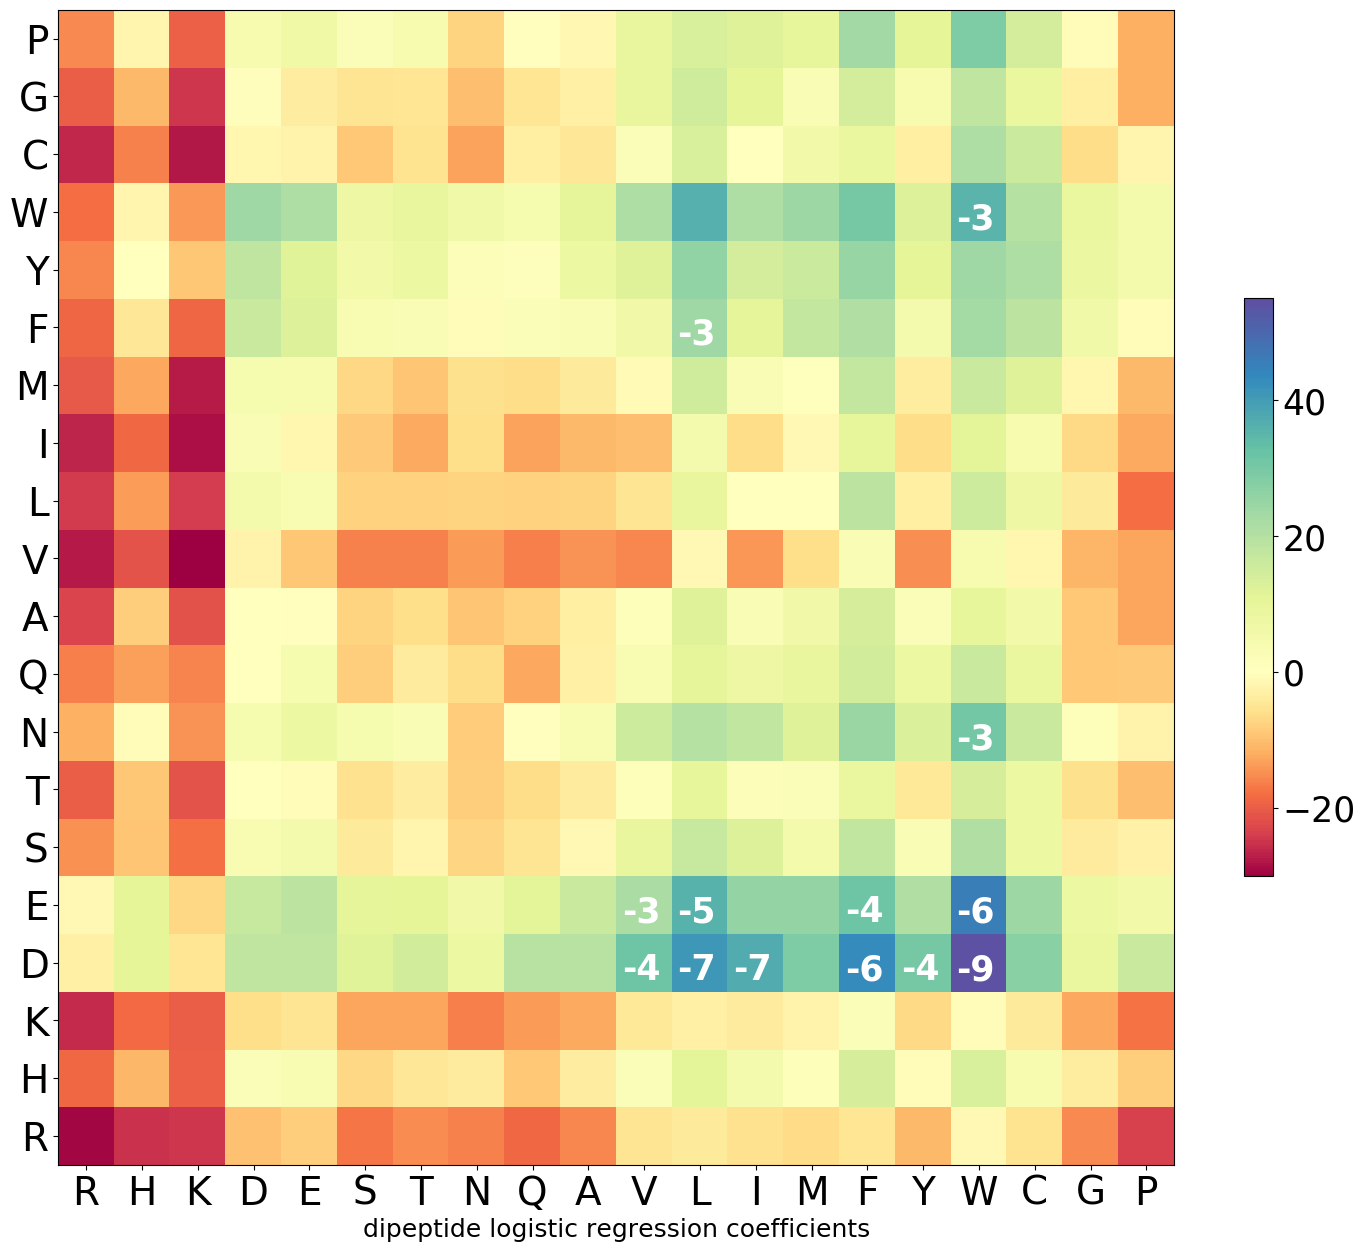

In [114]:
# '--calculate-likelihood-ratio' for the complete calculation. It's VERY time consuming.
%run scripts/figure3_lukasz.py --only-one-example #--use-NN-test-sets-fig7 #
#joblib.dump(model_dipeptides, analysis_home+'/models/model_dipeptides.joblib')

---
## Figure 4B
#### ROC curves of the best linear model and NN

      label  y_hat_linear  y_hat_deep
1541    1.0      0.688191    0.925554
7233    0.0      0.623917    0.177661
884     1.0      0.991499    0.988012
4678    0.0      0.892606    0.144435
238     1.0      0.983940    0.980460
0.9415526951538833
0.9731820705615467


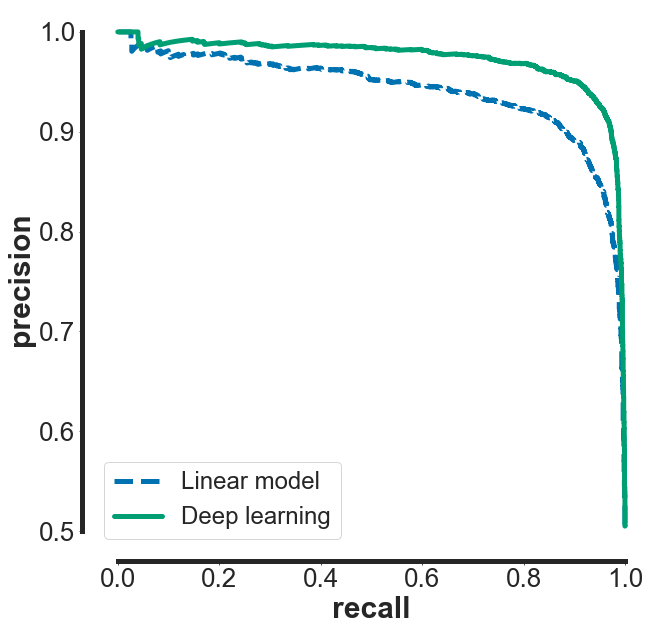

In [94]:
%run -i scripts/figure4B_lukasz.py

---
## Figure 4C
#### Compare Deep Neural Network with different set of features and include linear models. 

aa        : 0.975 ± 0.00014
aa_ss     : 0.977 ± 0.00004
aa_dis    : 0.975 ± 0.00020
aa_ss_dis : 0.976 ± 0.00009
linear_aa : 0.934 ± 0.00167
linear_dip: 0.942 ± 0.00165


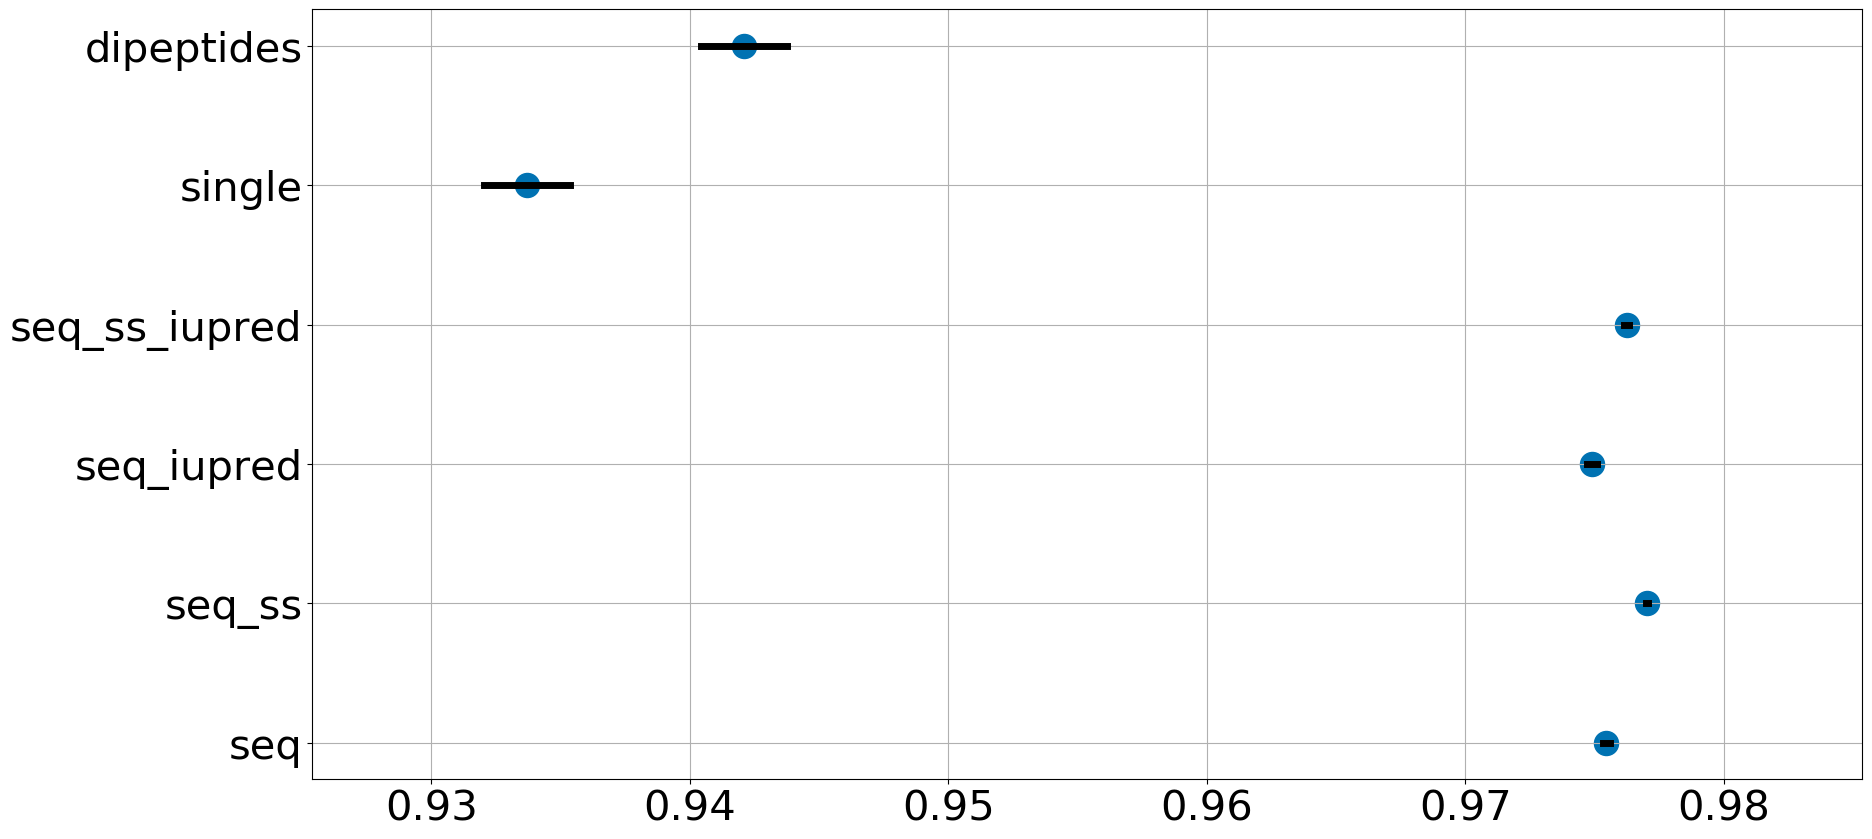

In [102]:
%run -i scripts/figure4C.py #--from-pickle

---
## Figure 4D
#### Net charge of 30mer vs NN predictions 

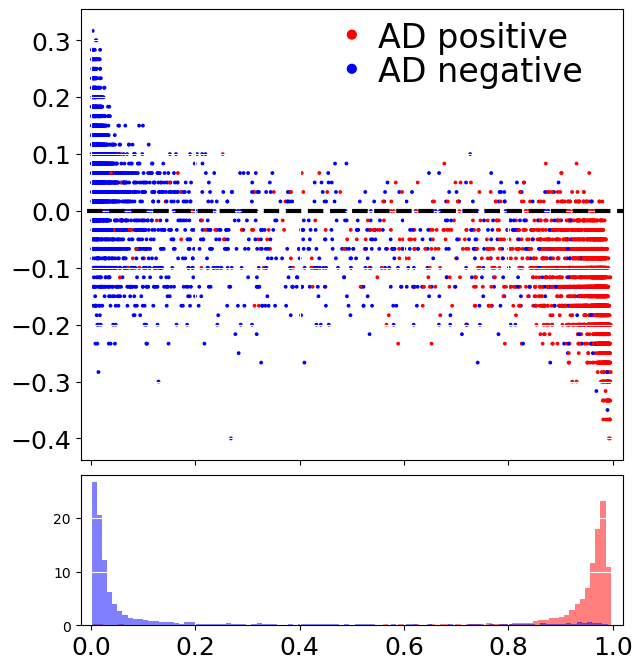

In [113]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
%run -i scripts/figure4D.py

---
## Figure 5A,B + S2
#### Heatmap of mutagenesis analysis on Gcn4cAD  
#### Correlation between Warfield et al, 2015 and our predictions on:
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;**AVWESLFSS**   
FEYENLEDNS**KEWTSLFDN**DIPVTTDDVSL 

0.93123233
0.926888
0.8538983


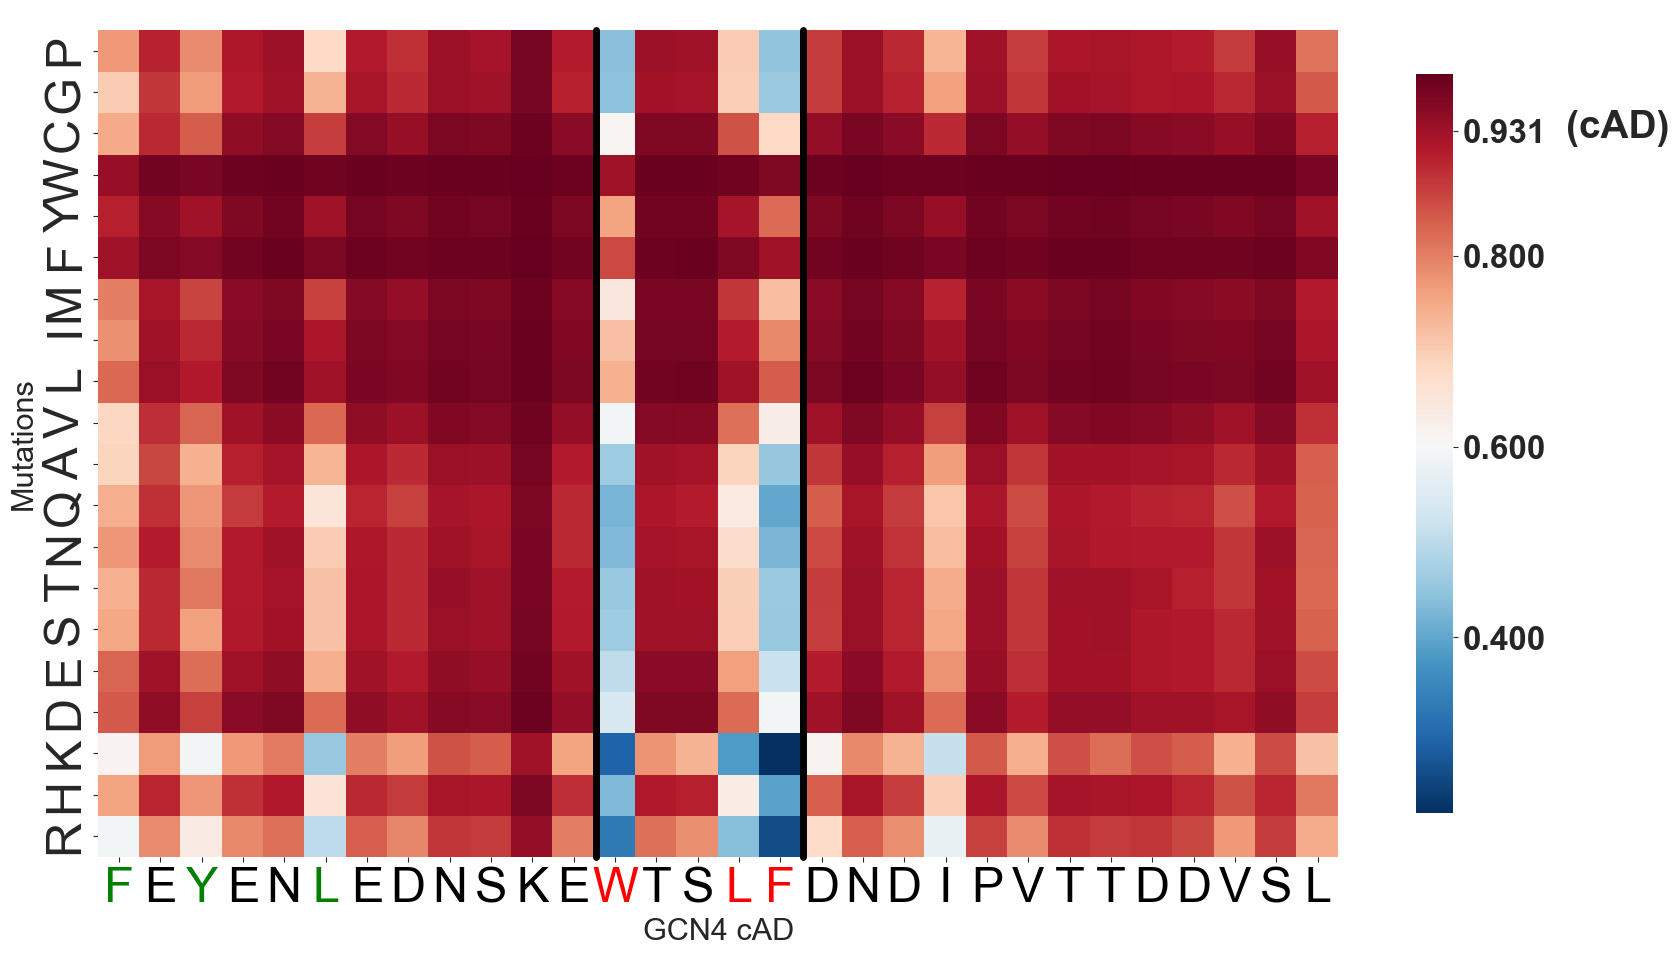

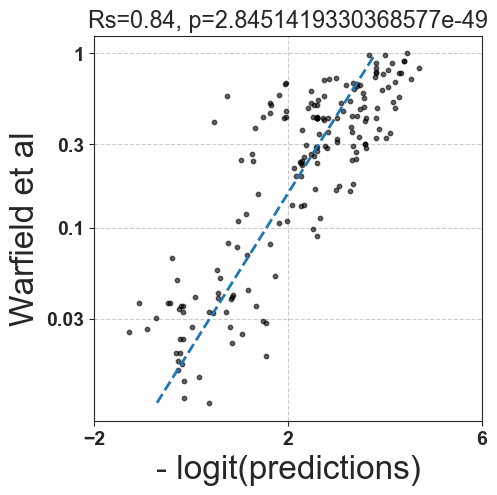

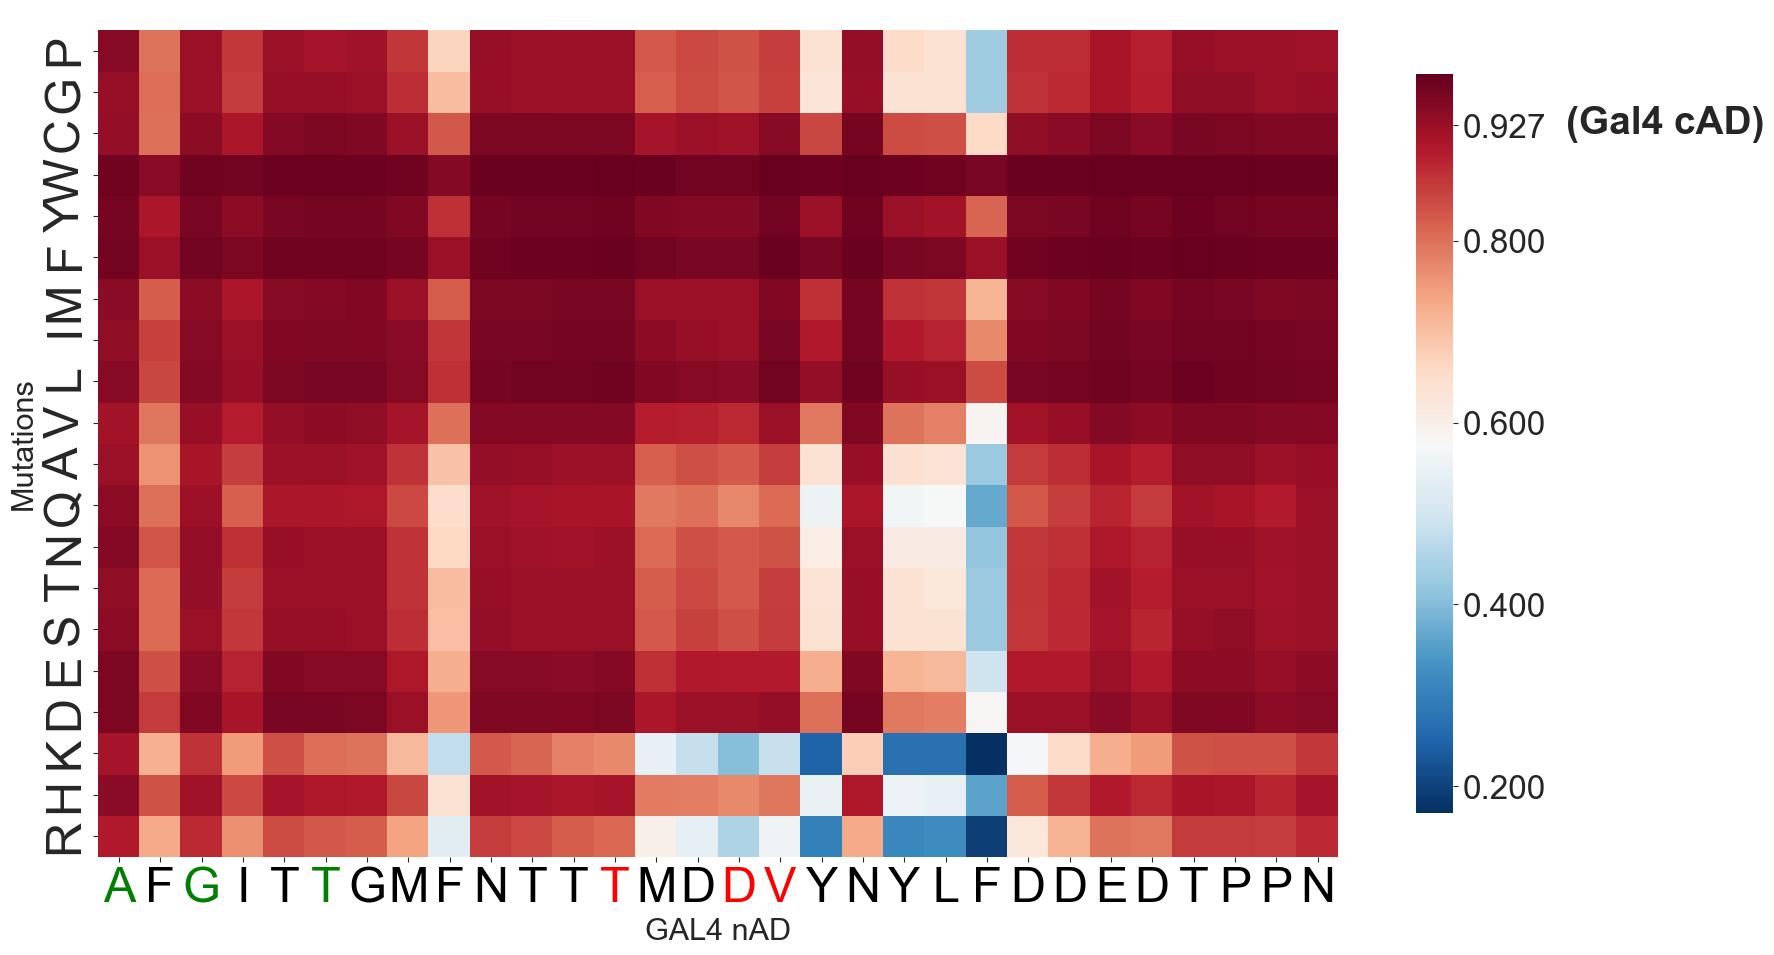

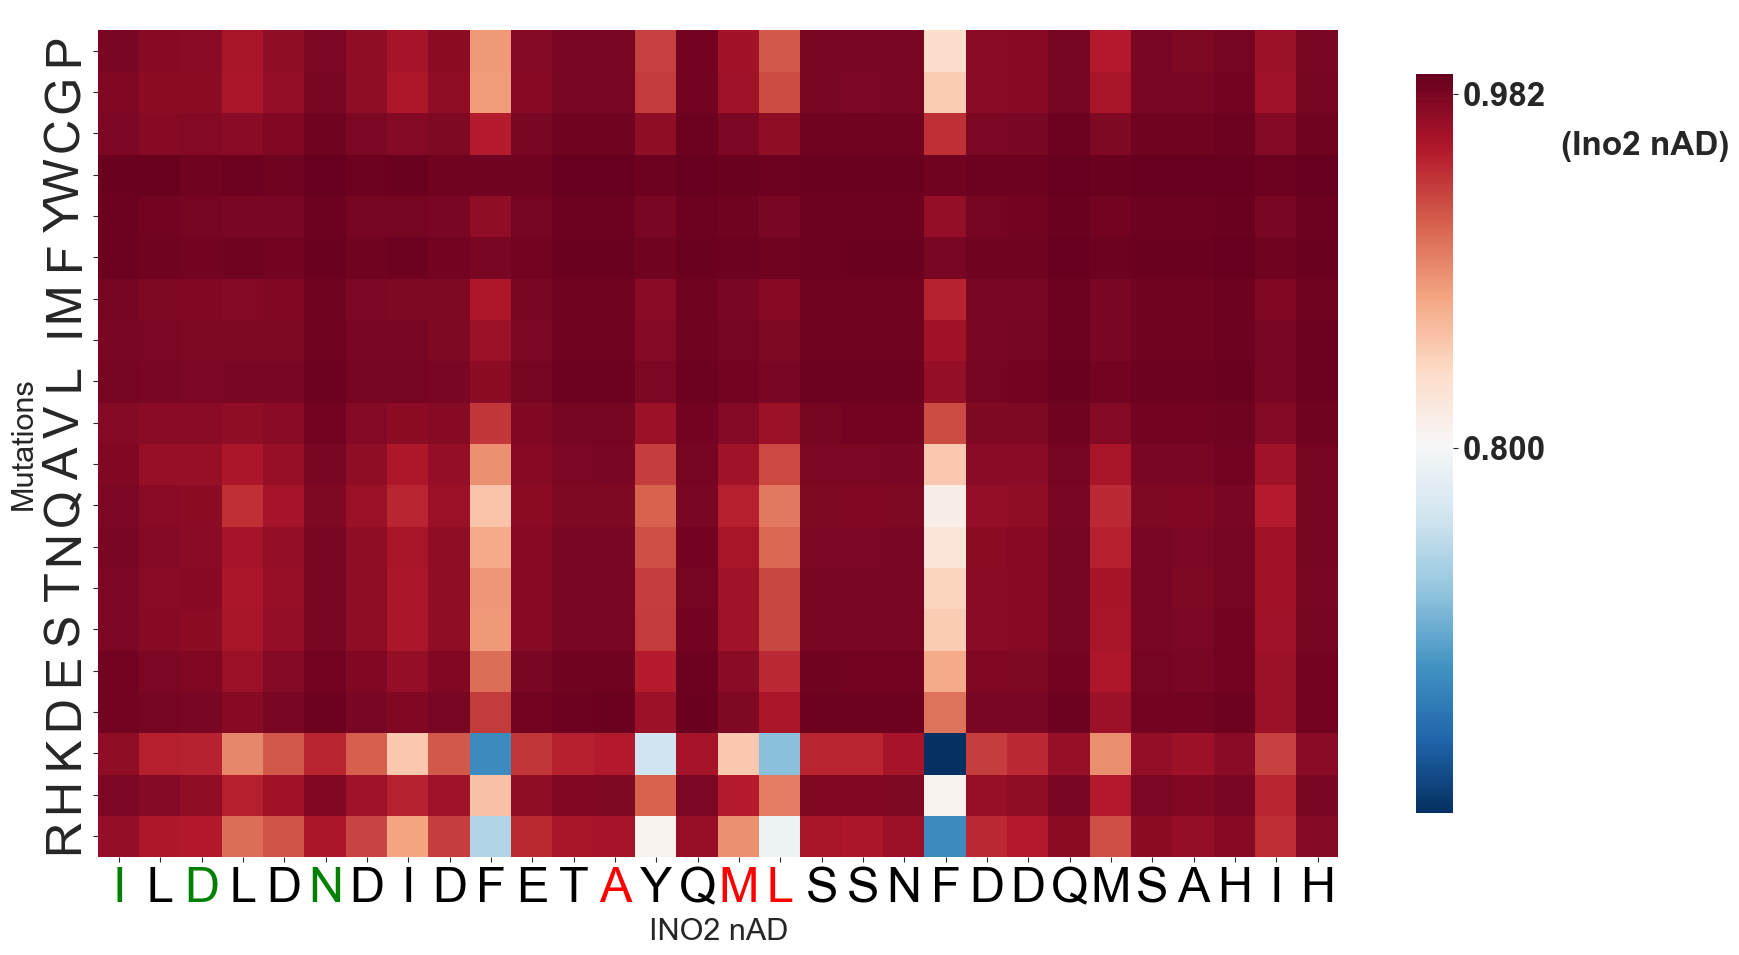

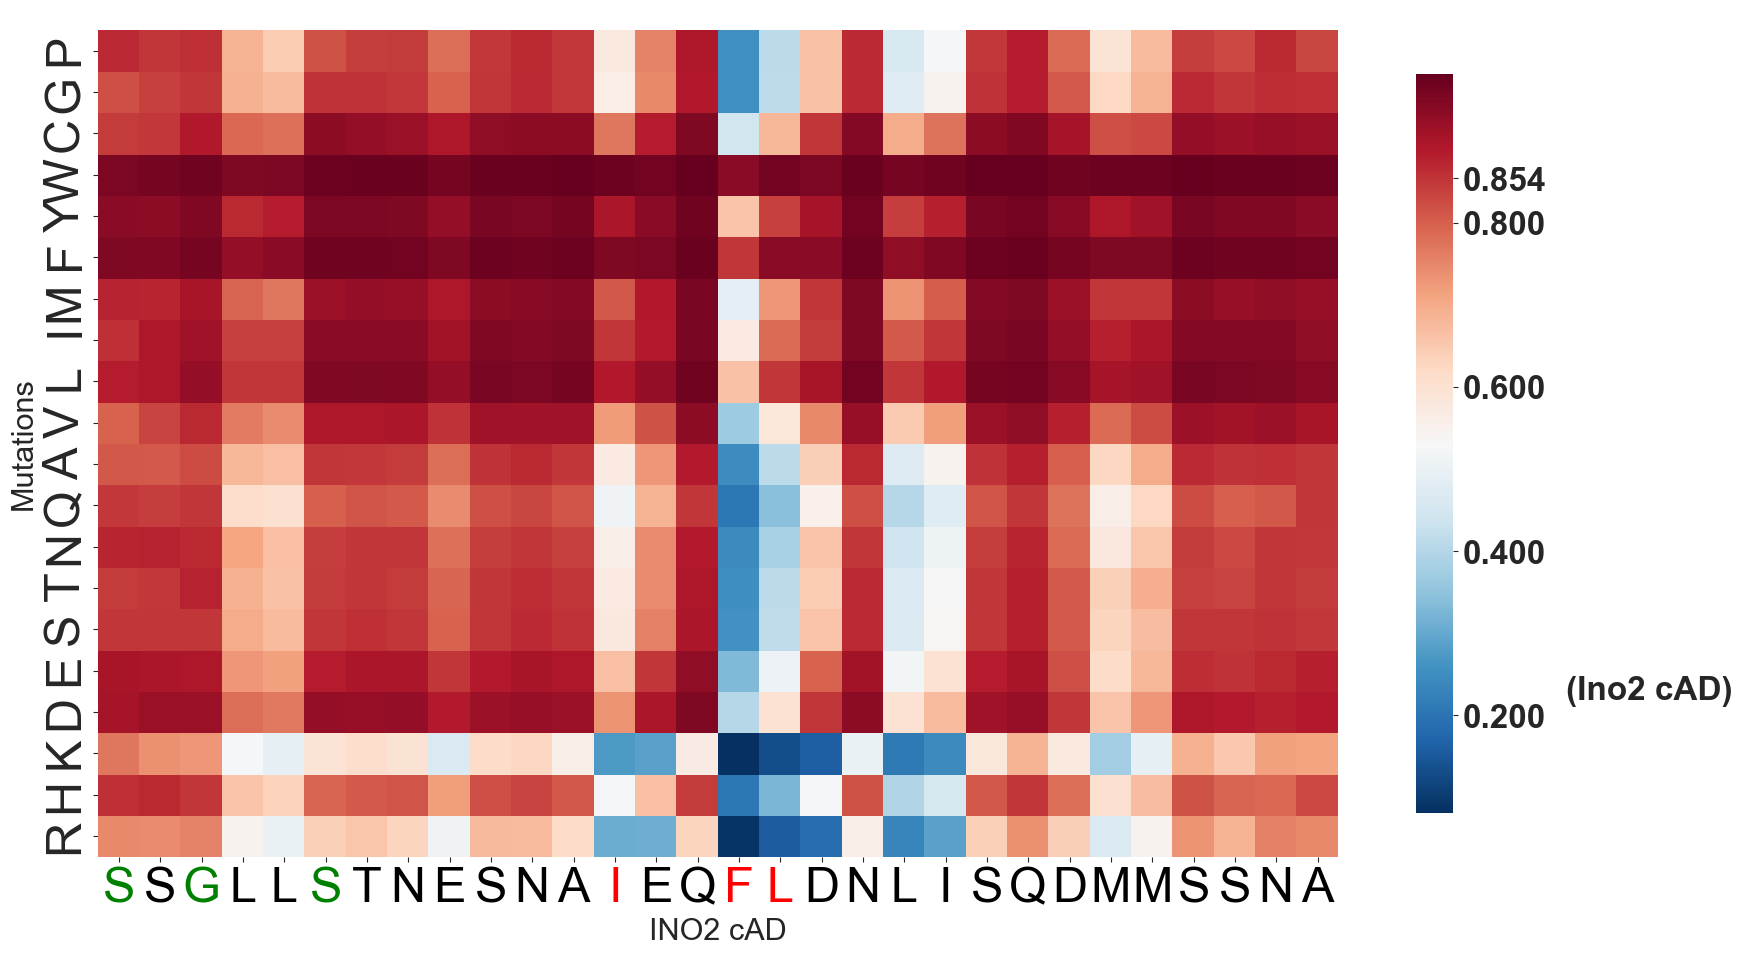

In [158]:
%run -i scripts/figure5AB.py

---
### Figure 5C
#### Find AD regions in knwon activators

findfont: Font family ['calibry'] not found. Falling back to DejaVu Sans.
findfont: Font family ['calibry'] not found. Falling back to DejaVu Sans.


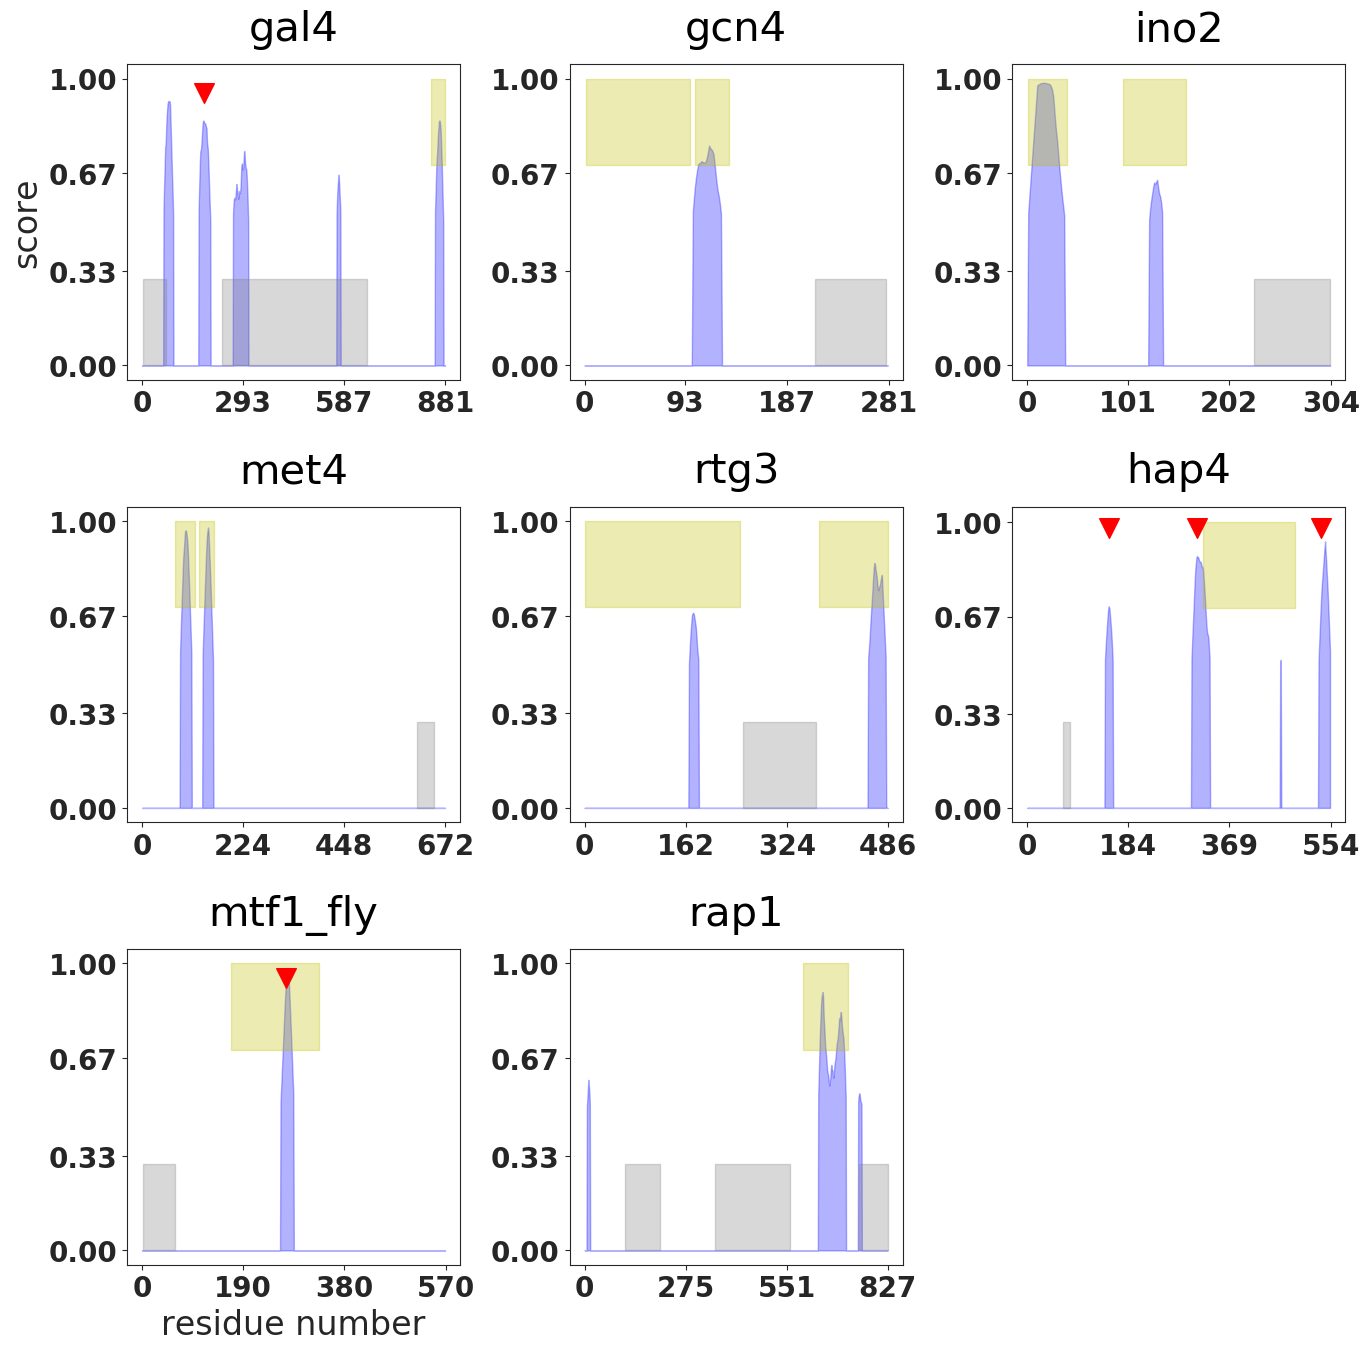

In [6]:
matplotlib.style.use('seaborn-colorblind')
%run -i scripts/figure5C.py

---
### Figure 6
#### deepLIFT logos

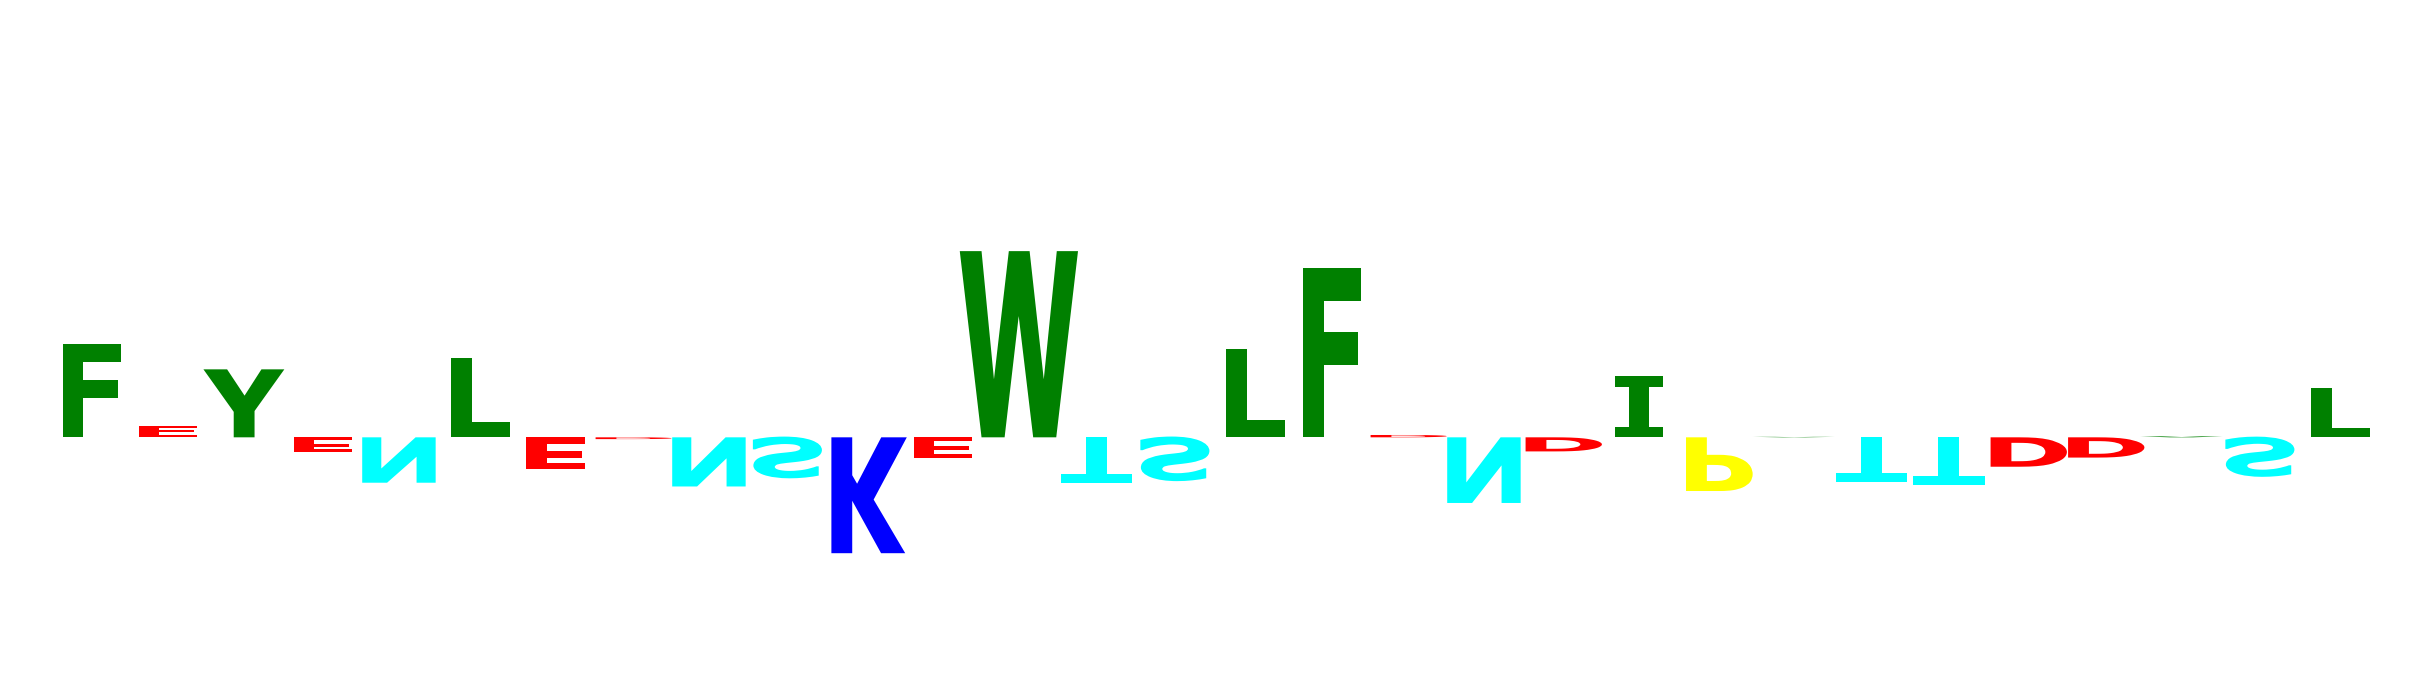

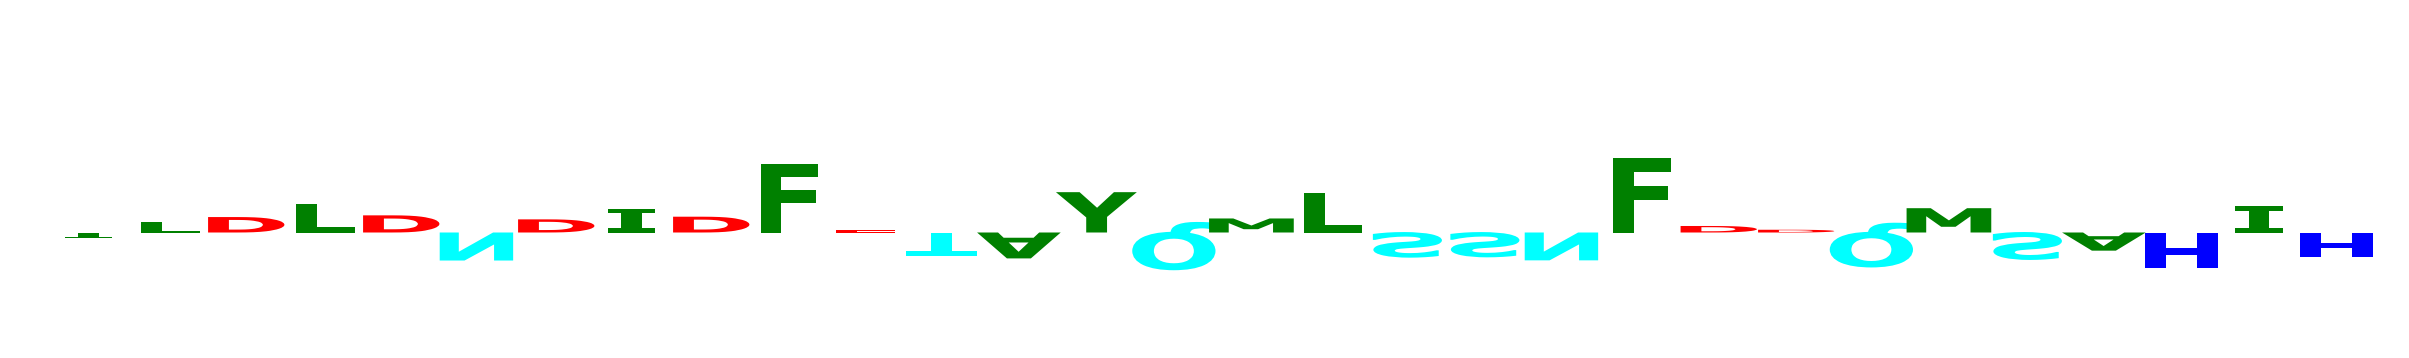

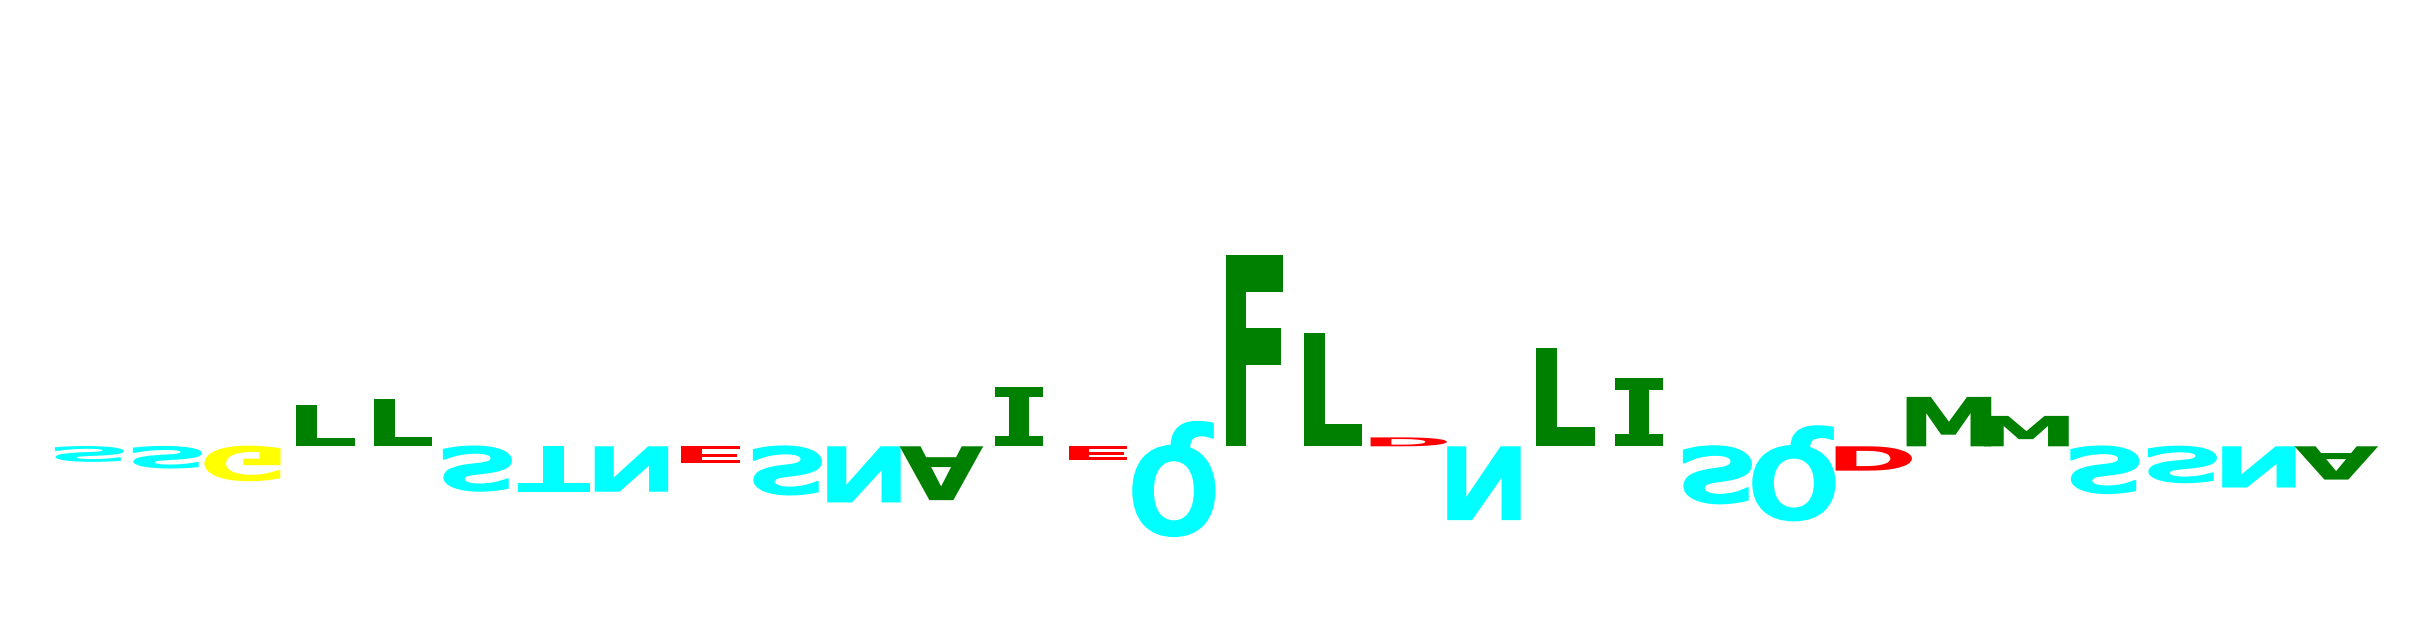

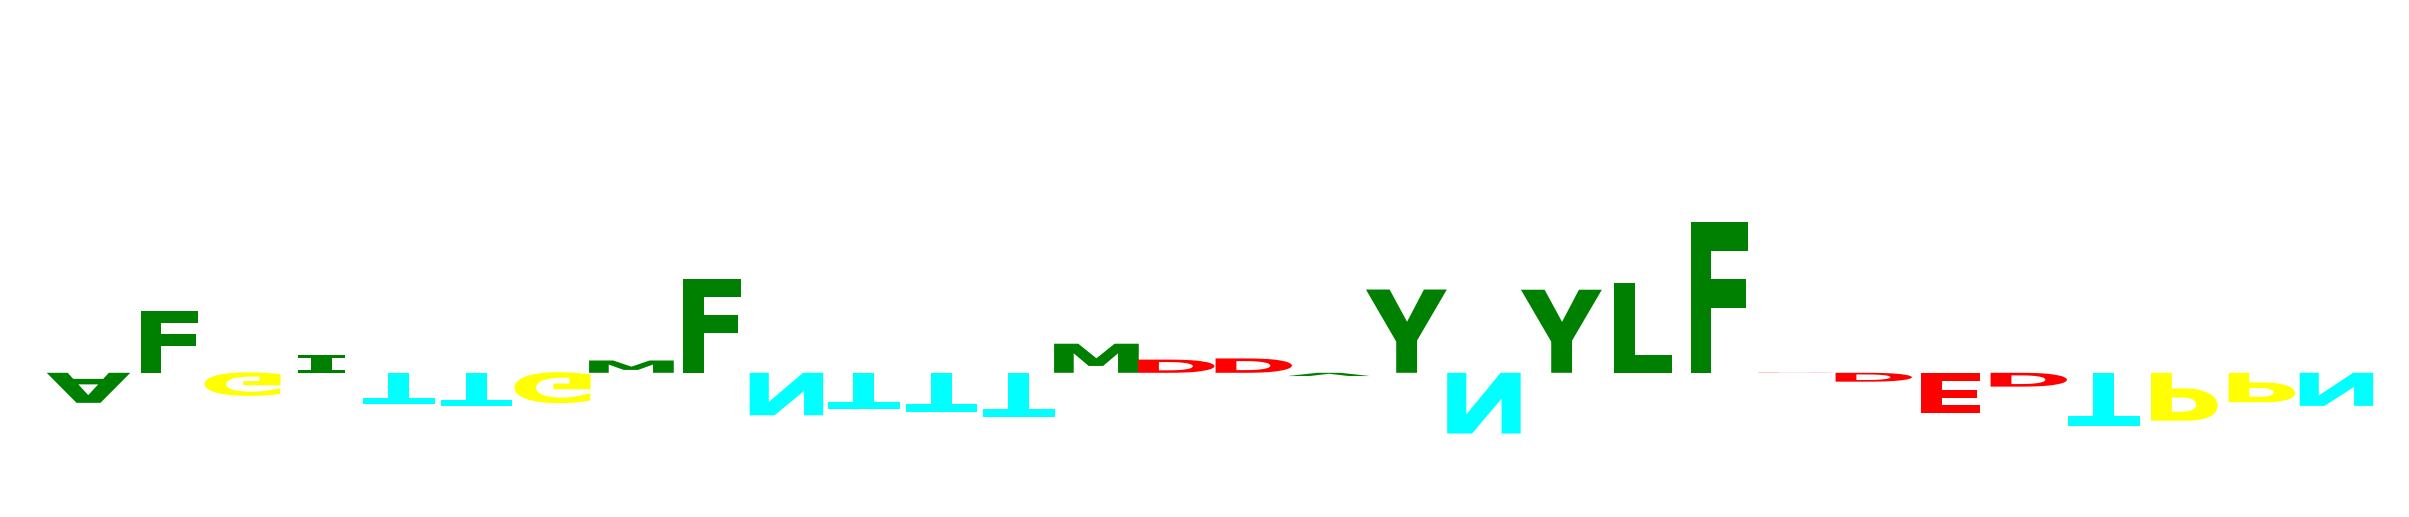

In [160]:
%run -i scripts/figure6B.py

---
### Figure 7
#### Enrichments

175 in tf_full
132 in tf_short
4802 in total
812 in nuclear

4802 175 812 81 2.737241379310345 2.4750143024221987e-20


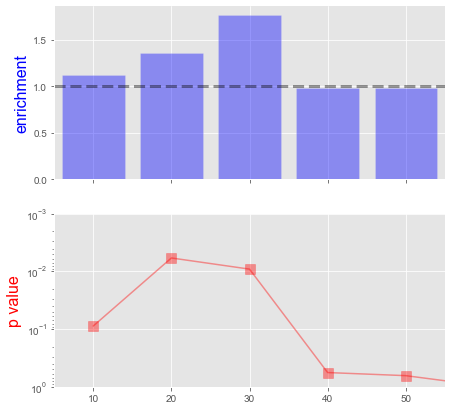

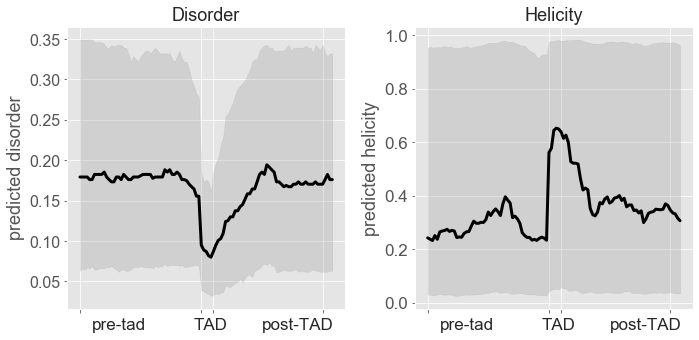

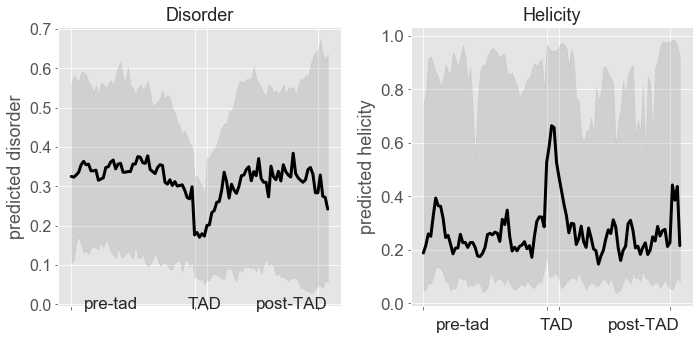

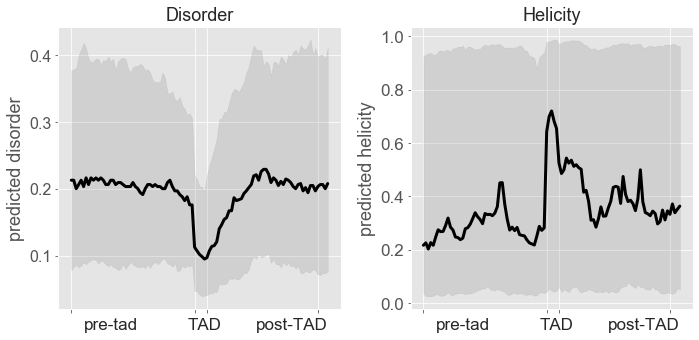

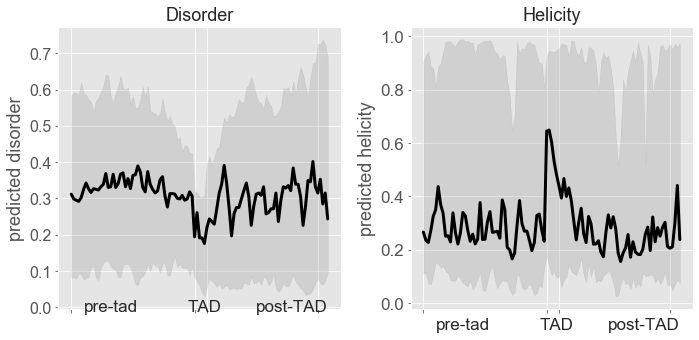

In [23]:
ax.tick_params(axis='both', labelsize=15)
%run -i scripts/figure7.py

---
### How does Piscacek model performs with our data

In [19]:
%run -i scripts/piscacek.py

_9aa_p = search_9aa(positives[ptest,0])
_9aa_n = search_9aa(negatives[ntest,0])
print(_9aa_p)
print(_9aa_n)

# most stringent
TOTAL = 3791*2
TP = 917; FP = 373; TN = 3791-FP; FN = 3791-TP
acc_most = (TP+TN)/(TP+TN+FP+FN)

# less stringent
TOTAL = 3791*2
TP = 3097 
FP = 2332 
TN = 3791-FP 
FN = 3791-TP
acc_less = (TP+TN)/(TP+TN+FP+FN)

print(acc_most, acc_less)

Most stringent [MDENQSTYG]{KRHCGP}[ILVFWM]{KRHCGP}{CGP}{KRHCGP}[ILVFWM][ILVFWMAY]{KRHC} and 
Less stringent [MDENQSTYCPGA]X[ILVFWMAY]{KRHCGP}{CGP}{CGP}[ILVFWMAY]XX
{'most_stringent': 884, 'less_stringent': 3083, 'total': 3665}
{'most_stringent': 383, 'less_stringent': 2331, 'total': 3665}
0.5717488789237668 0.600896860986547


### Last supp figure

bg  bin1  bin2  bin3  bin4
sequence                                                  
MFGDVSDDSGDGFYDEIIALIVSADDKTRT   2     0    17    10     0
RVGIGDGGIAIVDSVFDNLDNFFVNILAMM   1     2     0    17   106
ECDSPREAFDVNDYYNWGEVVKGGAIGMLS   0     0    19    31     0
IGDCVFNATSLYLYEDSNDEWNVLVWKAGE   1     0     1    46     0
AYRFLATEWARDSSALFCEFGIESCRYGWT   5    11    58    56     1
...                             ..   ...   ...   ...   ...
SGELVTLNEECSGPEKAIRGSIDAAKRSTE   1     0     0     0     0
SDTDRCHNWDSSYFWGSSWHTSVPRLACCW   2     0     0     0     0
STDVAATYPNSATRTARRAGETSIEDDGYC   1     0     0     0     0
NEWGVDVVVVVNCVIVPSVLSLSRLERWLK   1     0     0     0     0
DSLTNRSPTAVMGREAGFVNMGSGHNIYRC  14     0     0     0     0

[1054335 rows x 5 columns]

### Figure S3B

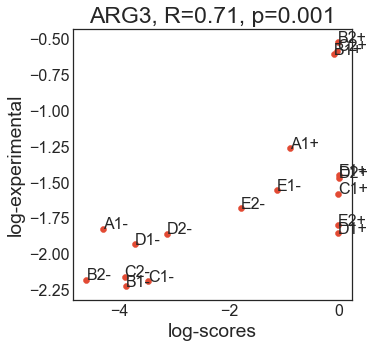

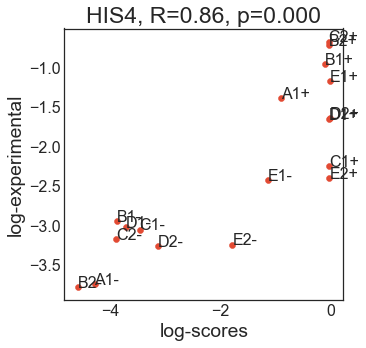

In [25]:
import matplotlib
matplotlib.style.use('seaborn-white')
%run -i scripts/figureS3B.py

### Figure S1A 

['dipeptide1', 'dipeptide2', 'test_auc', 'test_acc', 'val_auc', 'val_acc']


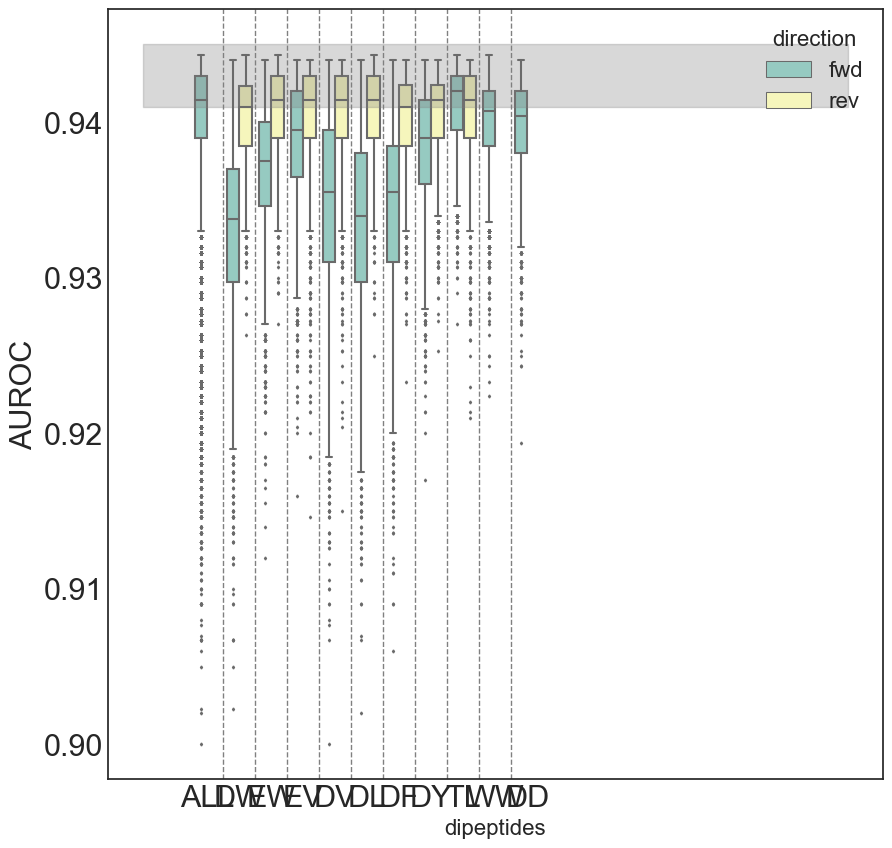

In [31]:
%run -i scripts/figureS1A.py

### Figure S1B

NameError: name 'p_1' is not defined

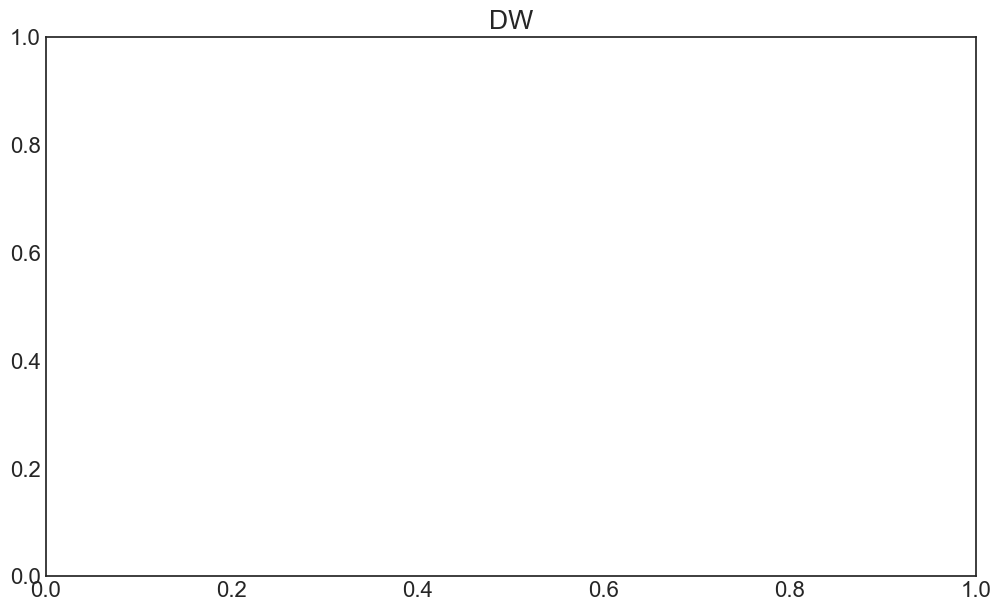

In [52]:
%run -i scripts/figureS1B.py

### Figure S4

done! /Users/aerijman/Desktop/AD_summary/publication/analysis/data/Stark_data/GSM3140923_short-library_GFP+_1+.wig file loaded
done! /Users/aerijman/Desktop/AD_summary/publication/analysis/data/Stark_data/GSM3140921_short-library_GFP-_1+.wig file loaded


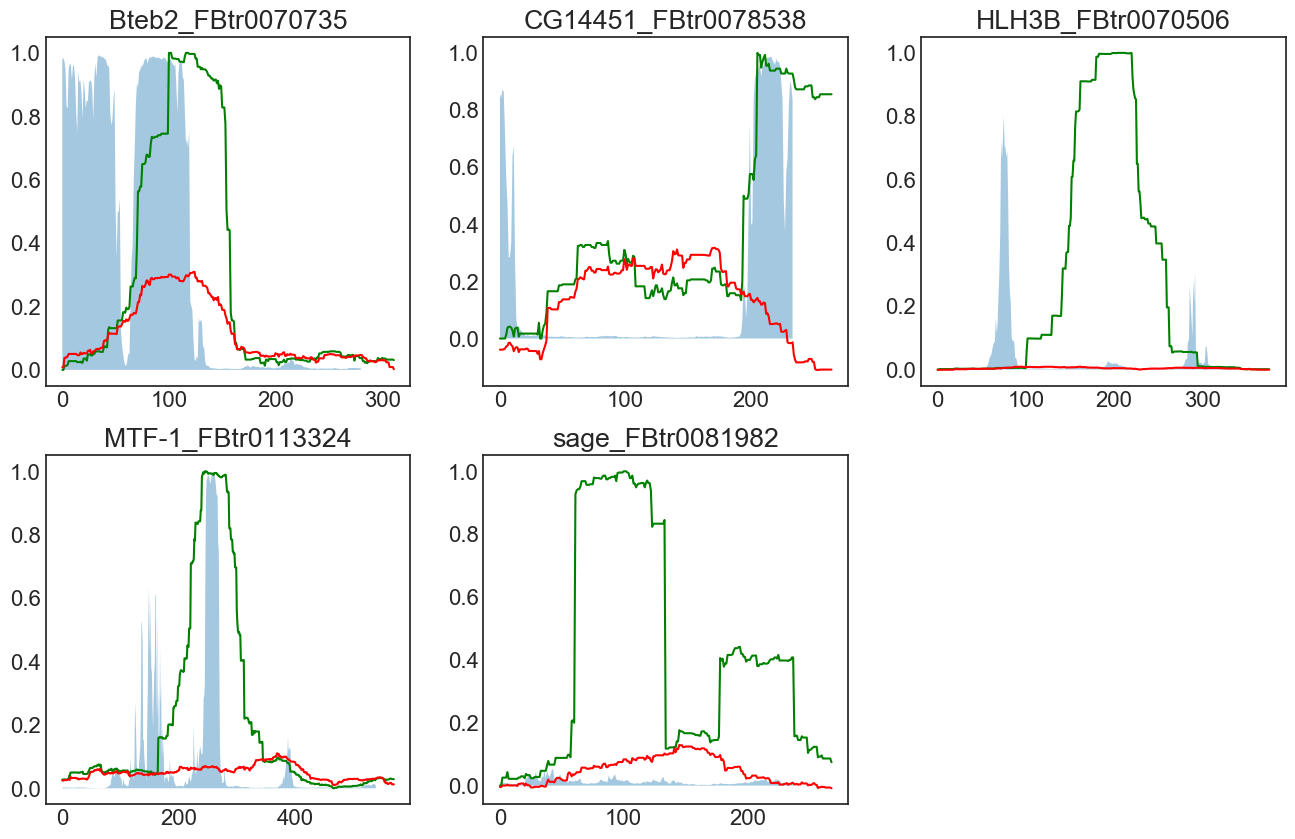

In [54]:
%run -i scripts/figureS4.py

### Figure S5

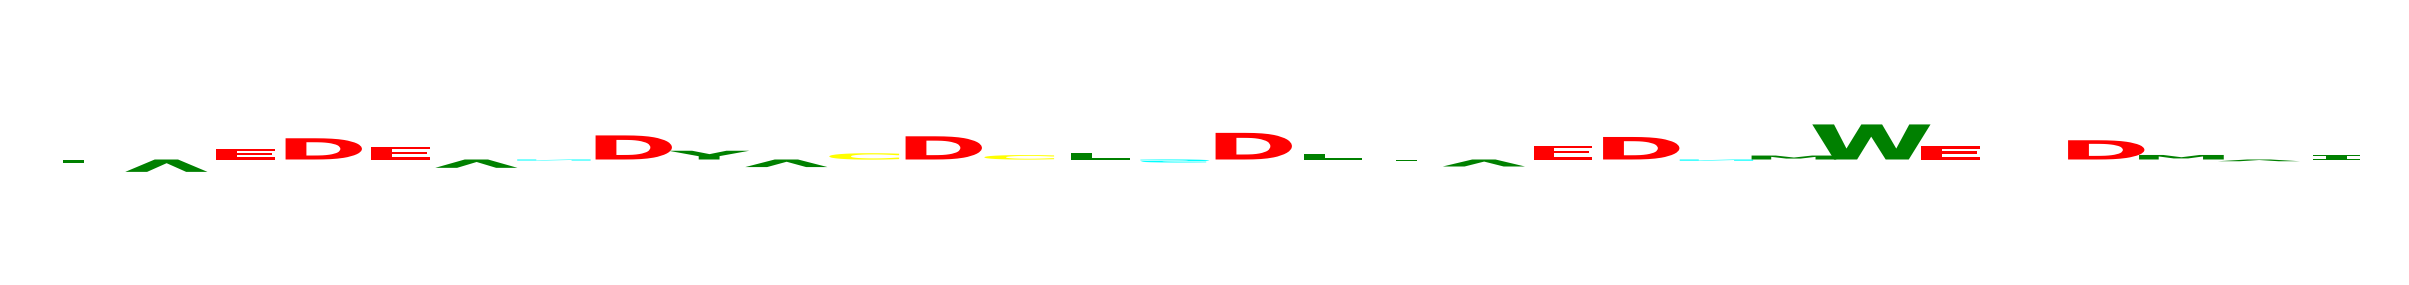

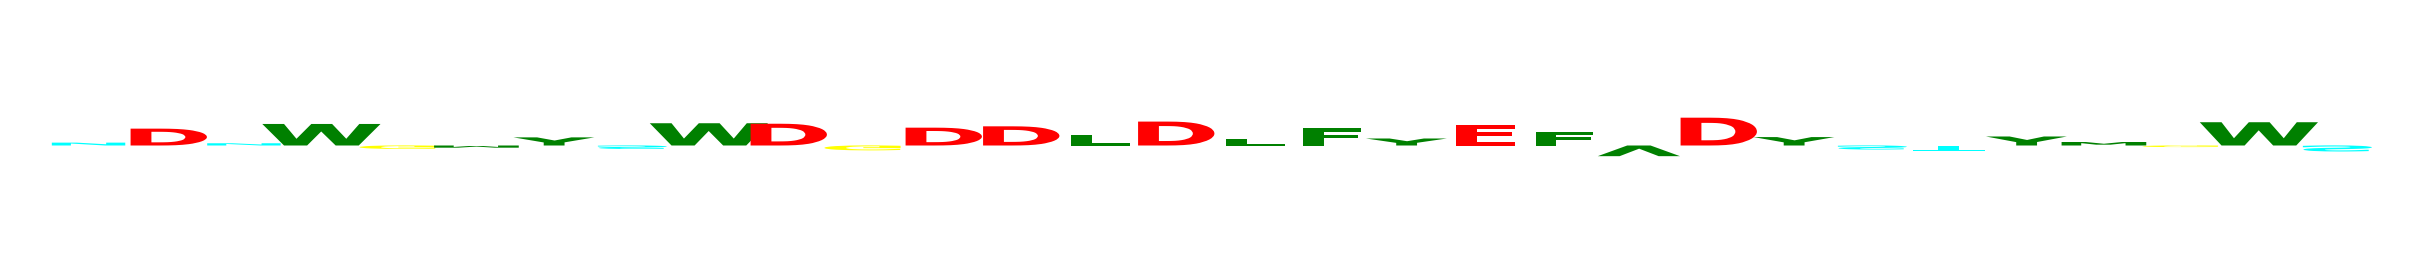

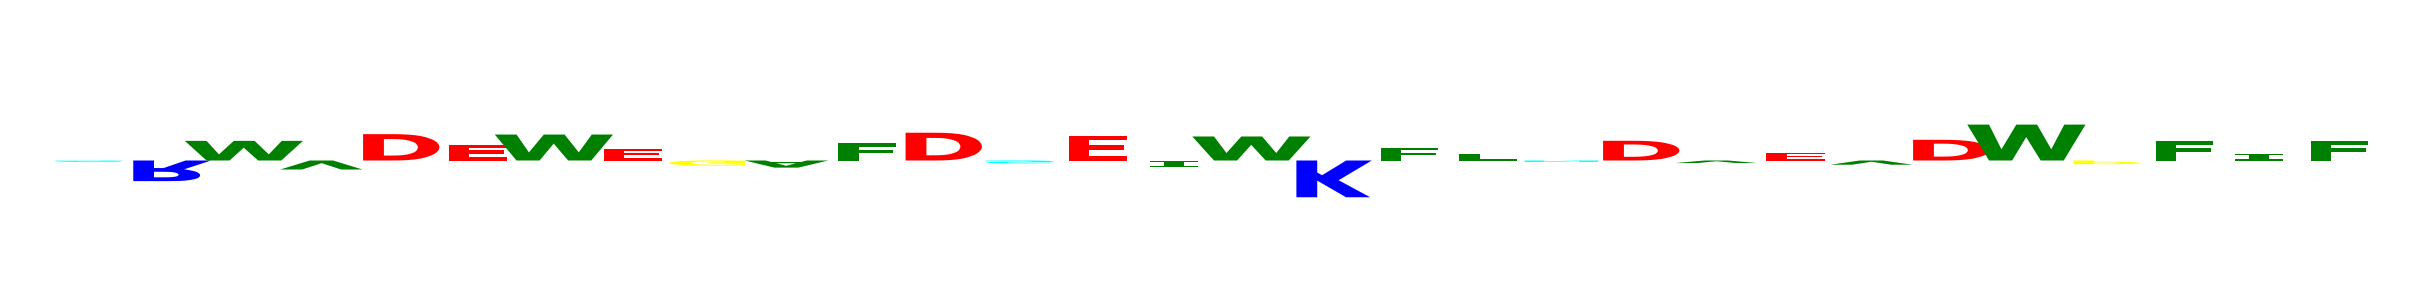

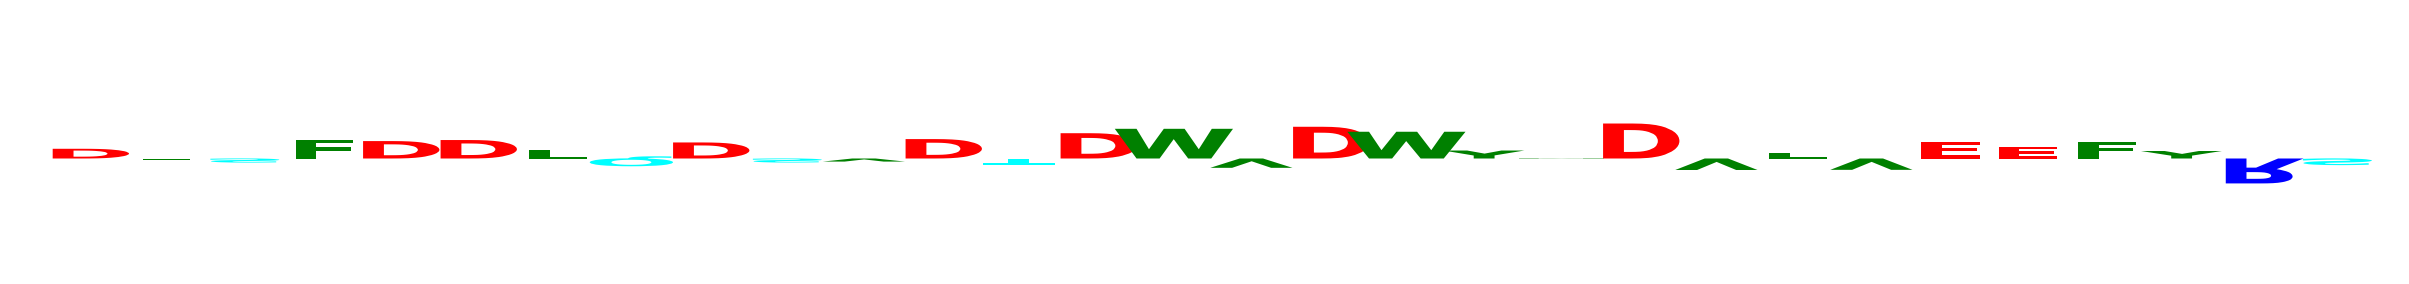

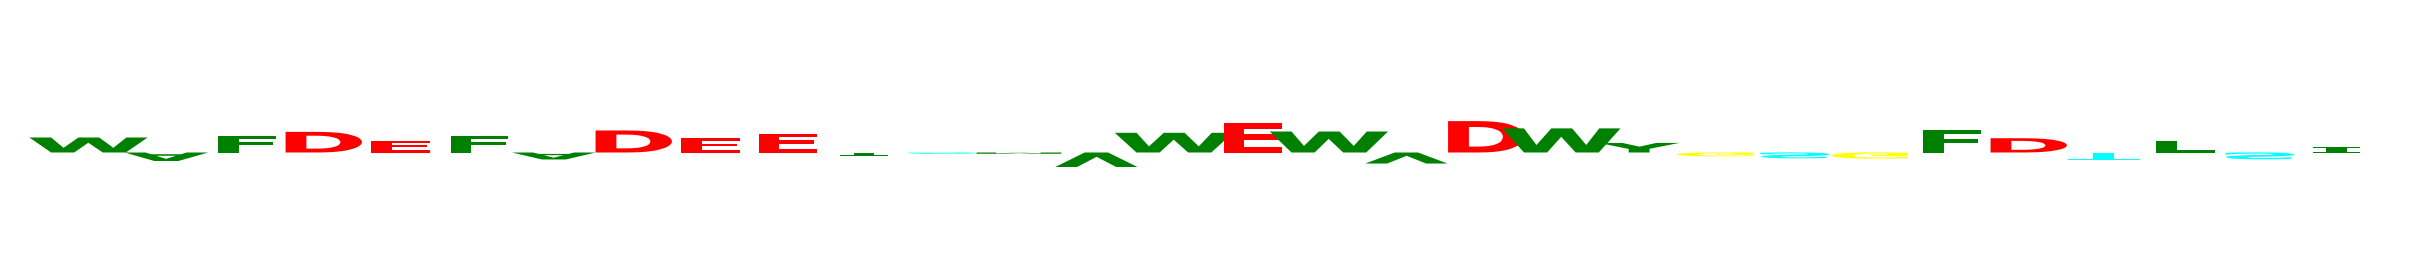

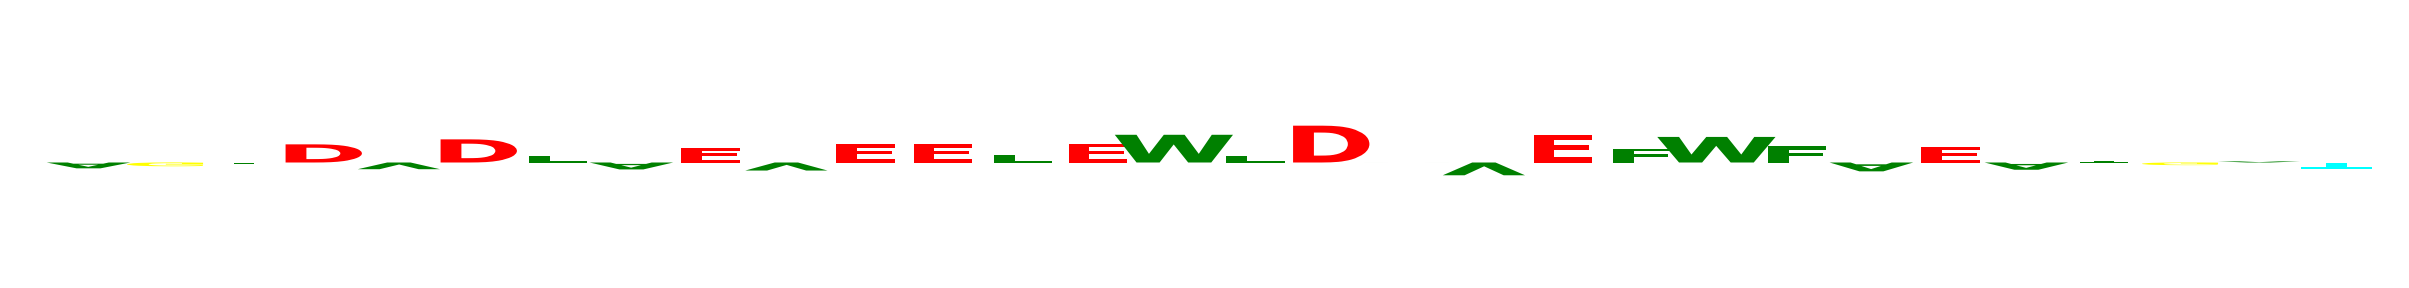

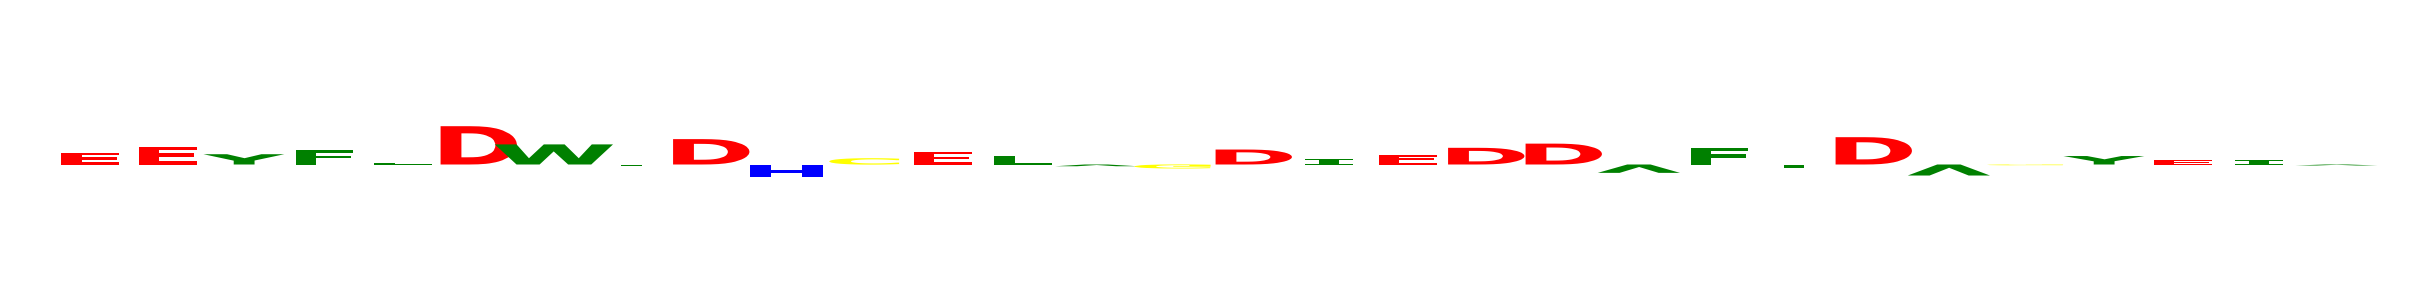

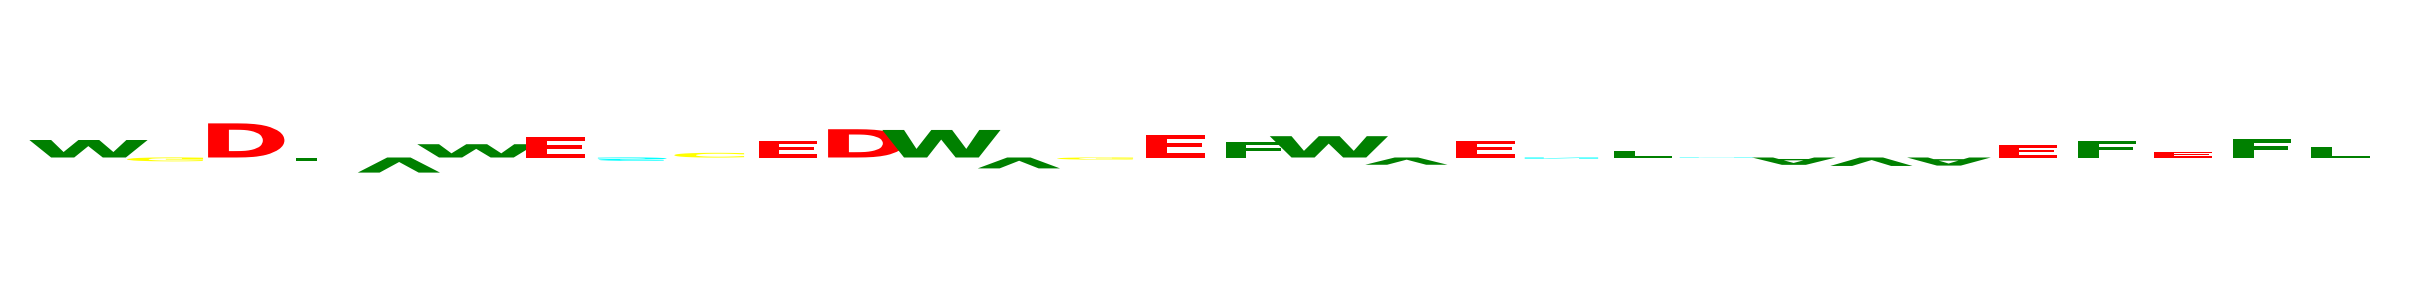

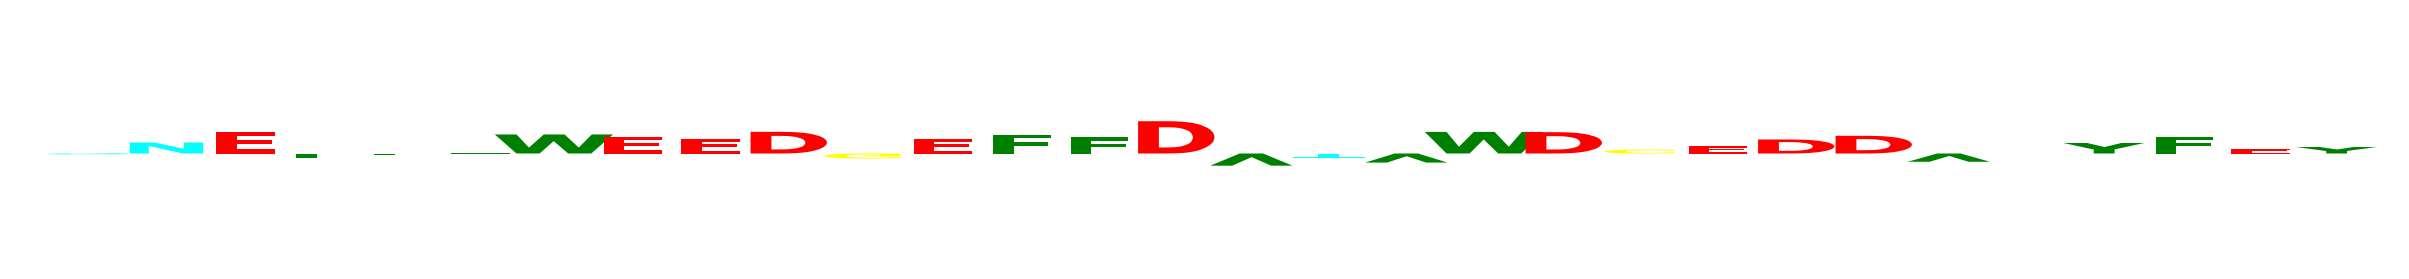

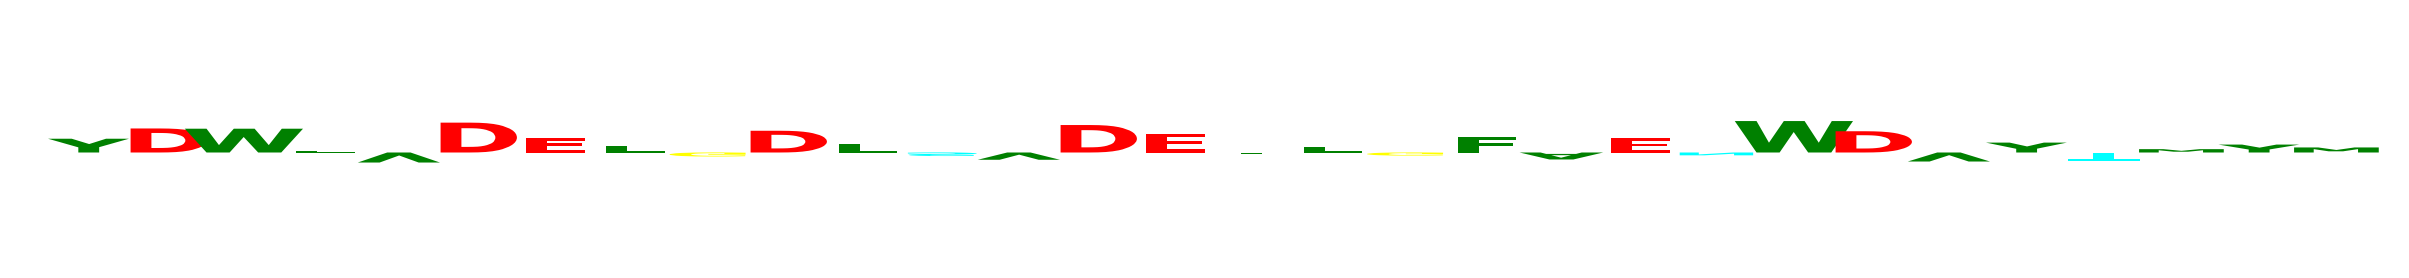

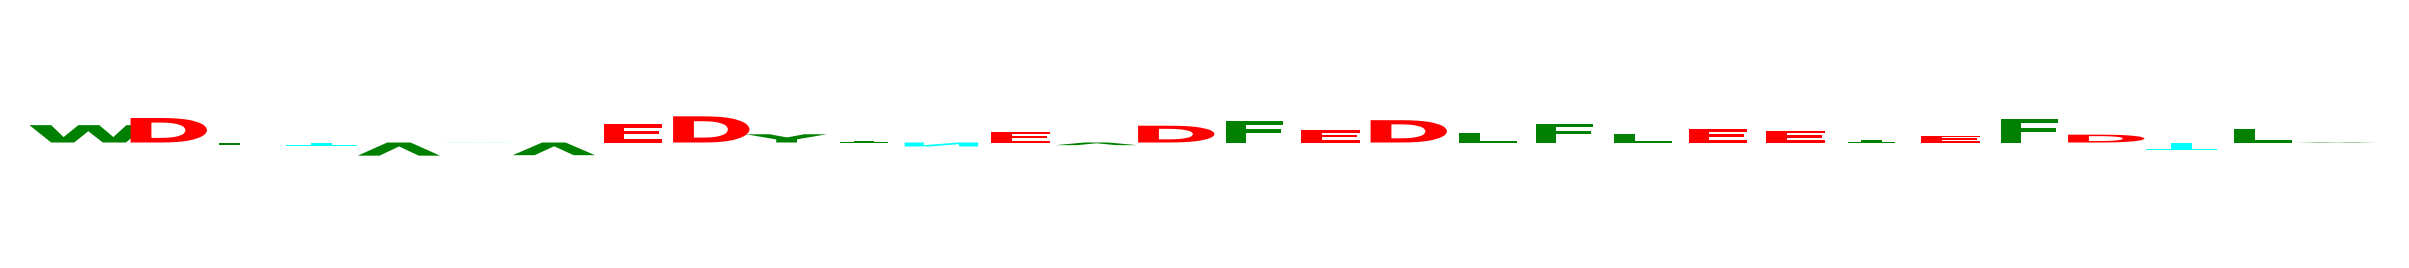

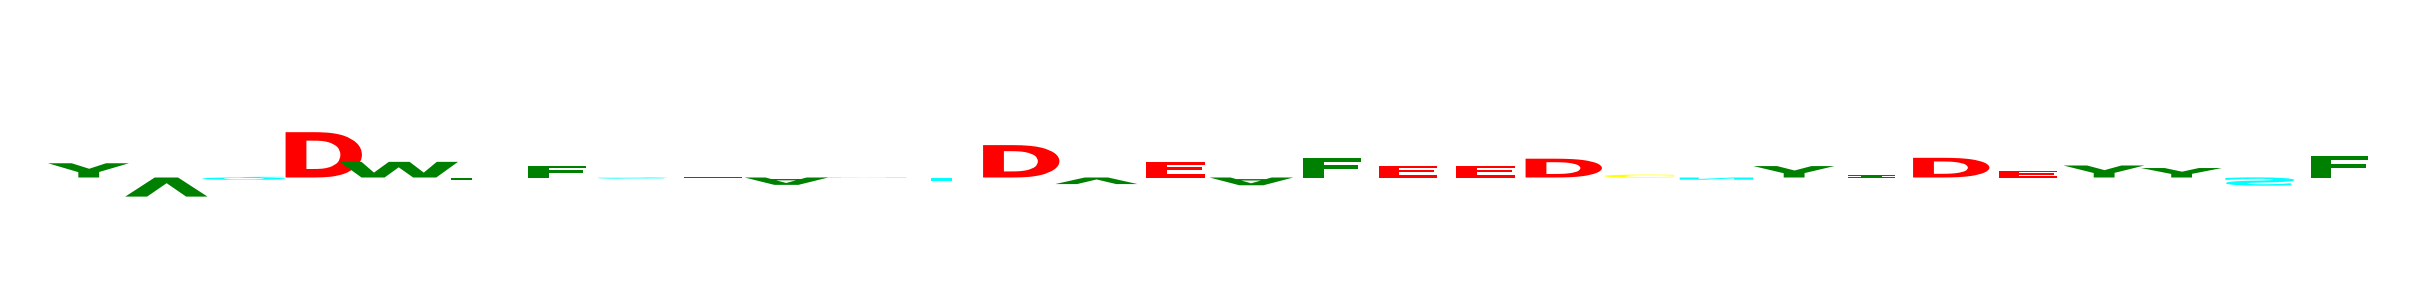

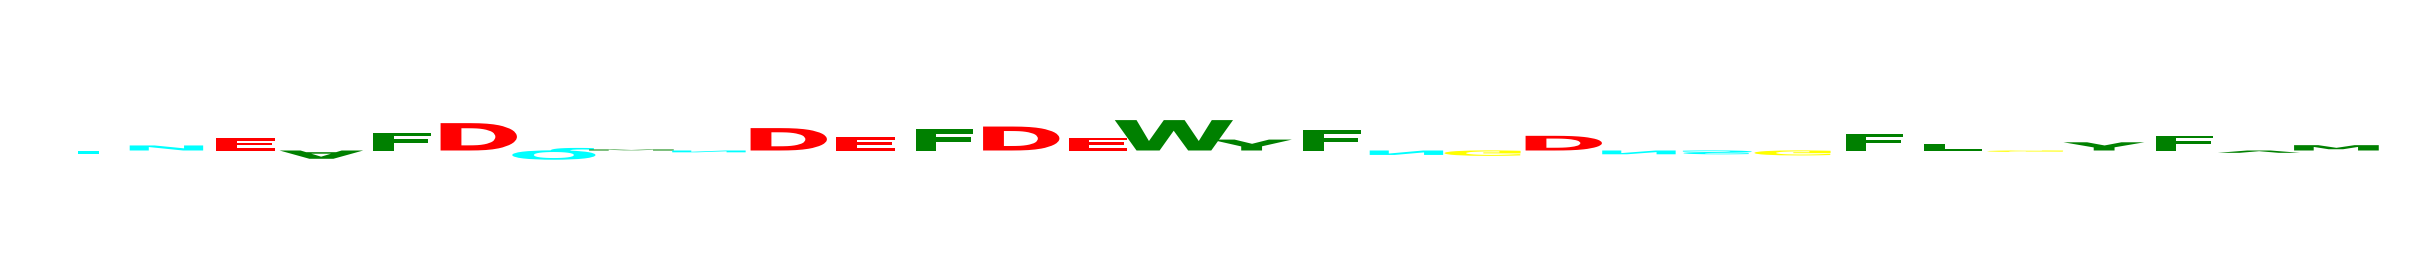

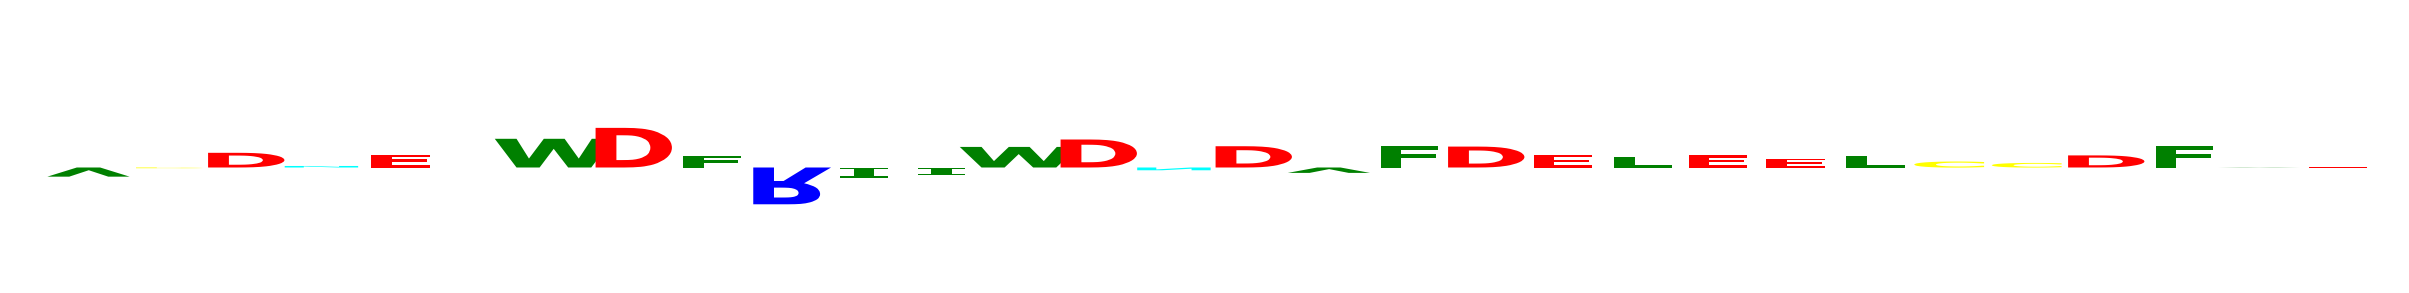

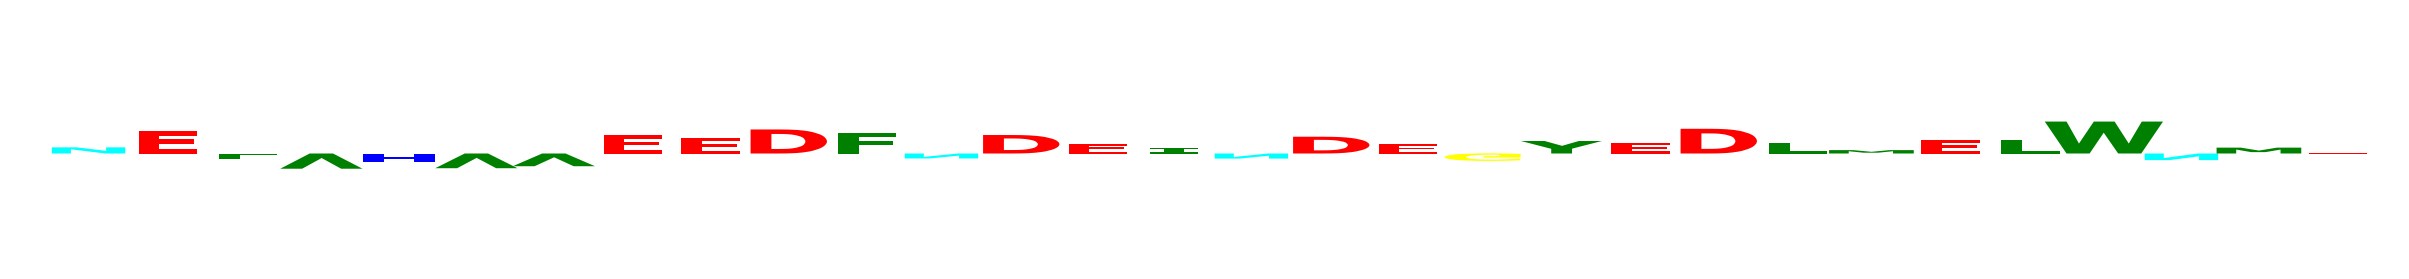

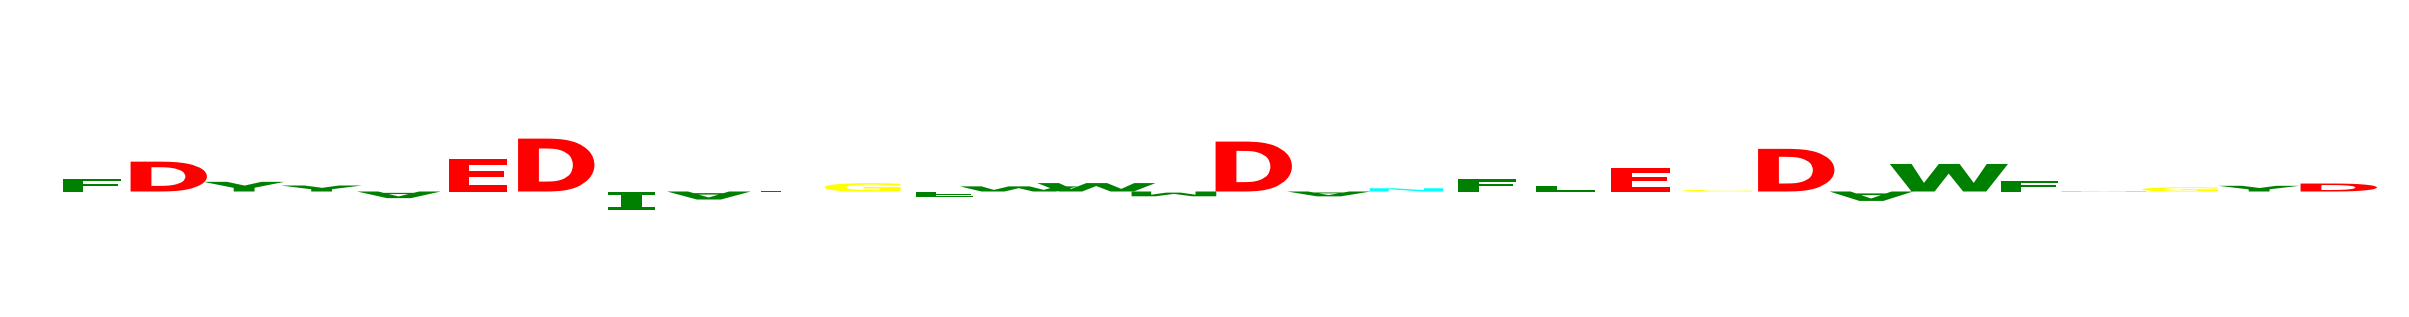

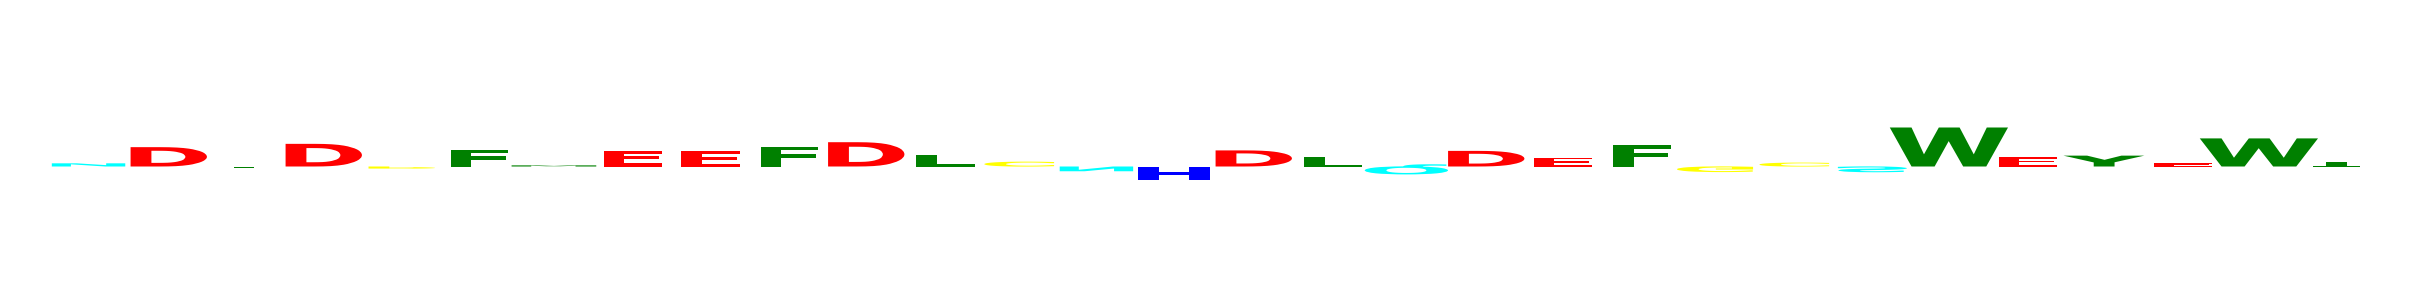

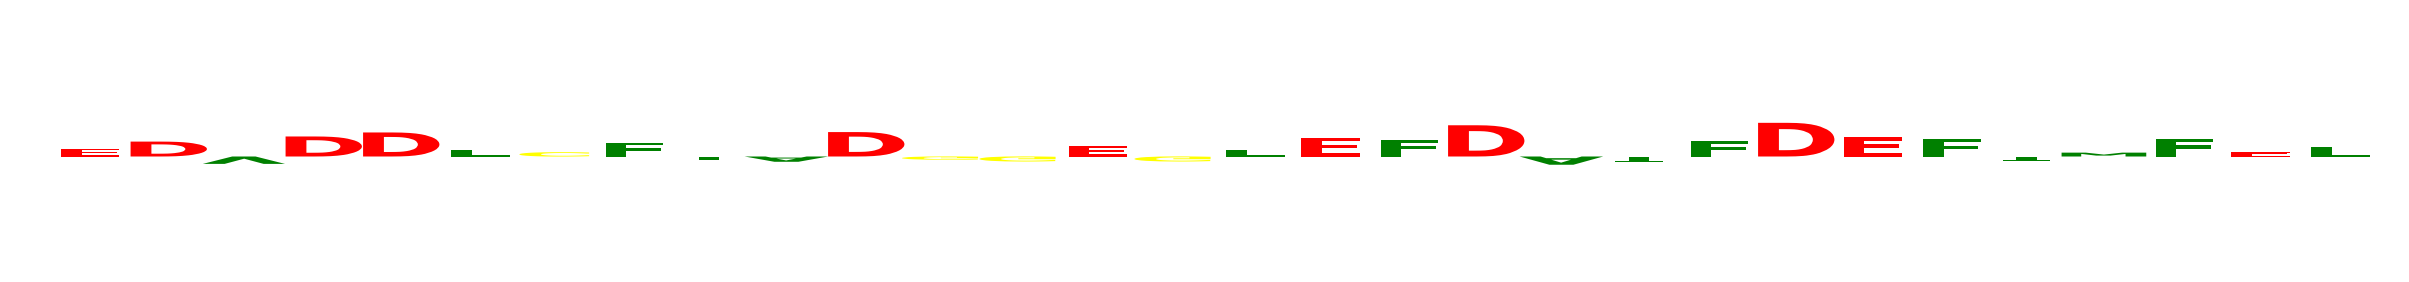

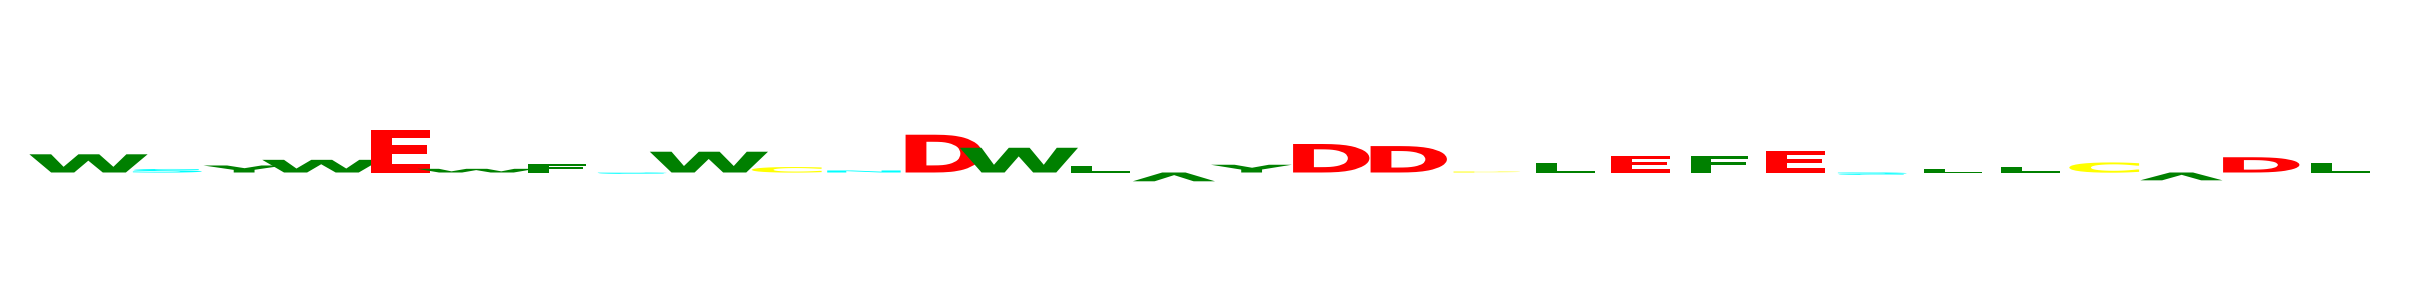

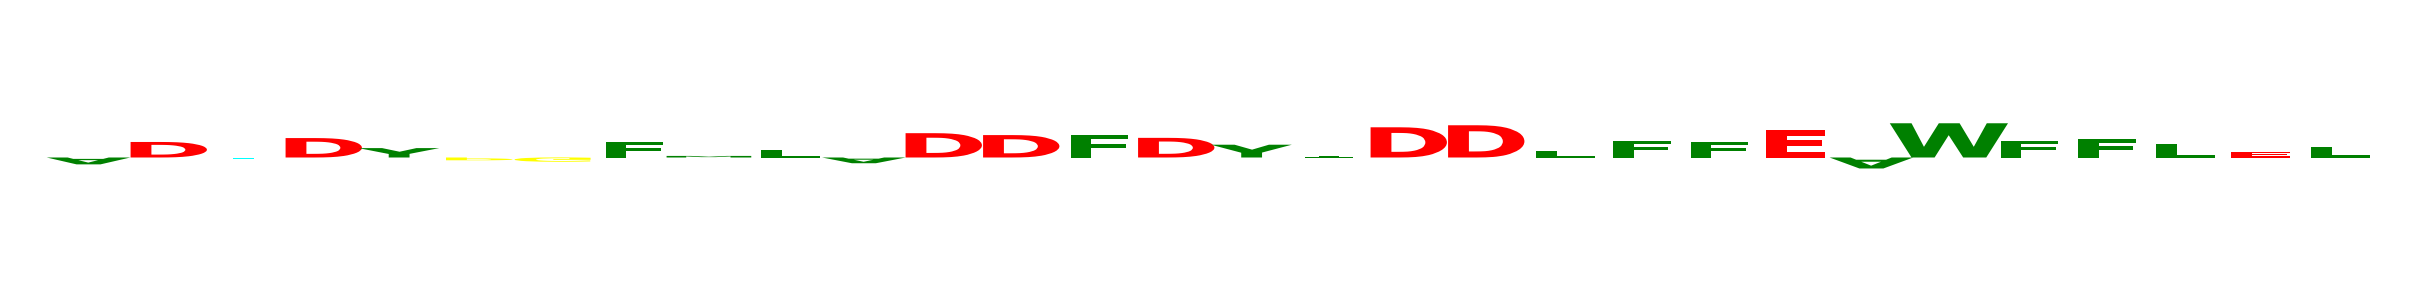

In [165]:
%run -i scripts/figureS5.py   # need to run figure 1C first!

# END
---

In [167]:
Dir = analysis_home + '/data/same_aa_diff_scores/'
ss2_files= [Dir+i for i in os.listdir(Dir) if i[-3:]=='ss2']
filesP = [i for i in os.listdir(Dir) if i[-5:]=='+.ss2']
filesN = [i for i in os.listdir(Dir) if i[-5:]=='-.ss2']
filesP+filesN

['log_odd_D2+.ss2',
 'log_odd_B2+.ss2',
 'log_odd_E2+.ss2',
 'log_odd_C2+.ss2',
 'log_odd_A1+.ss2',
 'log_odd_C1+.ss2',
 'log_odd_E1+.ss2',
 'log_odd_B1+.ss2',
 'log_odd_D1+.ss2',
 'log_odd_B2-.ss2',
 'log_odd_D2-.ss2',
 'log_odd_C2-.ss2',
 'log_odd_E2-.ss2',
 'log_odd_E1-.ss2',
 'log_odd_A1-.ss2',
 'log_odd_C1-.ss2',
 'log_odd_D1-.ss2',
 'log_odd_B1-.ss2']

In [168]:
from deepexplain.tensorflow import DeepExplain

# supp figure
def open_prot(prefix, which='ss'):
    ss,seq=[],[]
    Dir = analysis_home + '/data/same_aa_diff_scores/'

    f = open(Dir + prefix + '.' + which)
    for i in f:
        if i[0]=='#' or len(i)<3: continue
        ss.append(i.strip().replace('  ',' ').replace('C','-').split(' ')[2])
    f.close()

    f=open(Dir + prefix + '.fasta')
    seq = [i for i in f if i[0]!=">"][0]

    return np.array([seq, ''.join(ss)])


Dir = analysis_home + '/data/same_aa_diff_scores/'
ss2_files= [Dir+i for i in os.listdir(Dir) if i[-3:]=='ss2']

filesP = [i for i in os.listdir(Dir) if i[-5:]=='+.ss2']
filesN = [i for i in os.listdir(Dir) if i[-5:]=='-.ss2']
x = []

for n,i in enumerate(filesN+filesP):
    a,b = open_prot(i[:-4])
    x.append(prepare_ohe([a,b]))

x = np.array(x)
y = np.hstack(ADPred.predict(x.reshape(len(x),30,23,1)))


with DeepExplain(session=K.get_session()) as de:
    input_tensor = ADPred.layers[0].input
    fModel = Model(inputs=input_tensor, outputs = ADPred.layers[-2].output)
    target_tensor = fModel(input_tensor)

    xs = x.reshape(x.shape[0],30,23,1)
    ys = (y>=0).astype(int).reshape(y.shape[0],1)

    attributions_gi = de.explain('grad*input', target_tensor, input_tensor, xs, ys=ys)
    #attributions_sv = de.explain('shapley_sampling', target_tensor, input_tensor, xs, ys=ys)
    #attributions_dl = de.explain('deeplift', target_tensor, input_tensor, xs, ys=ys)
    #attributions_s  = de.explain('intgrad', target_tensor, input_tensor, xs, ys=ys)

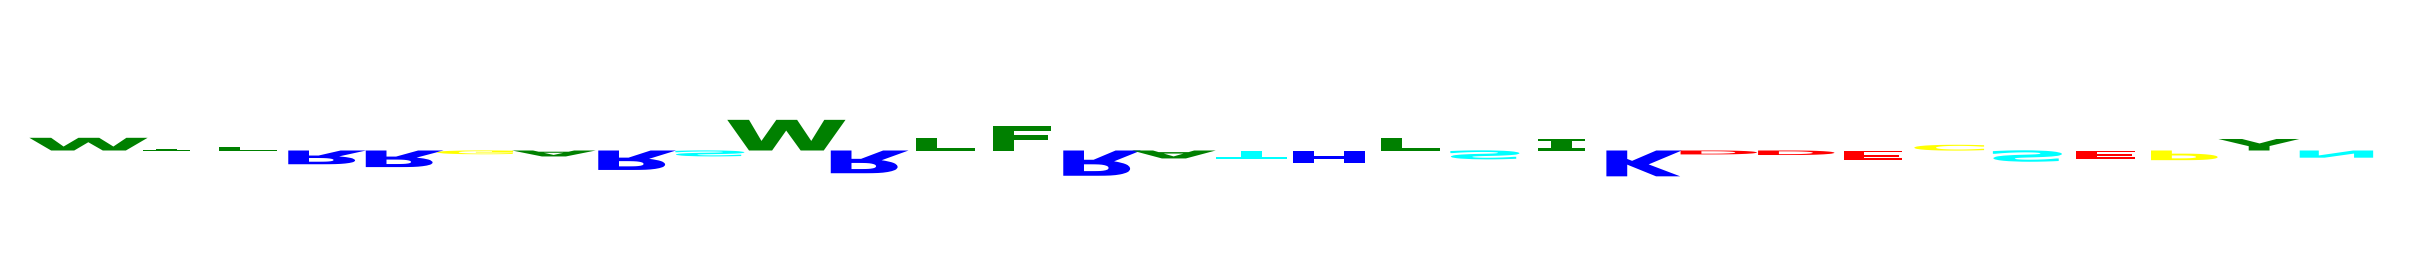

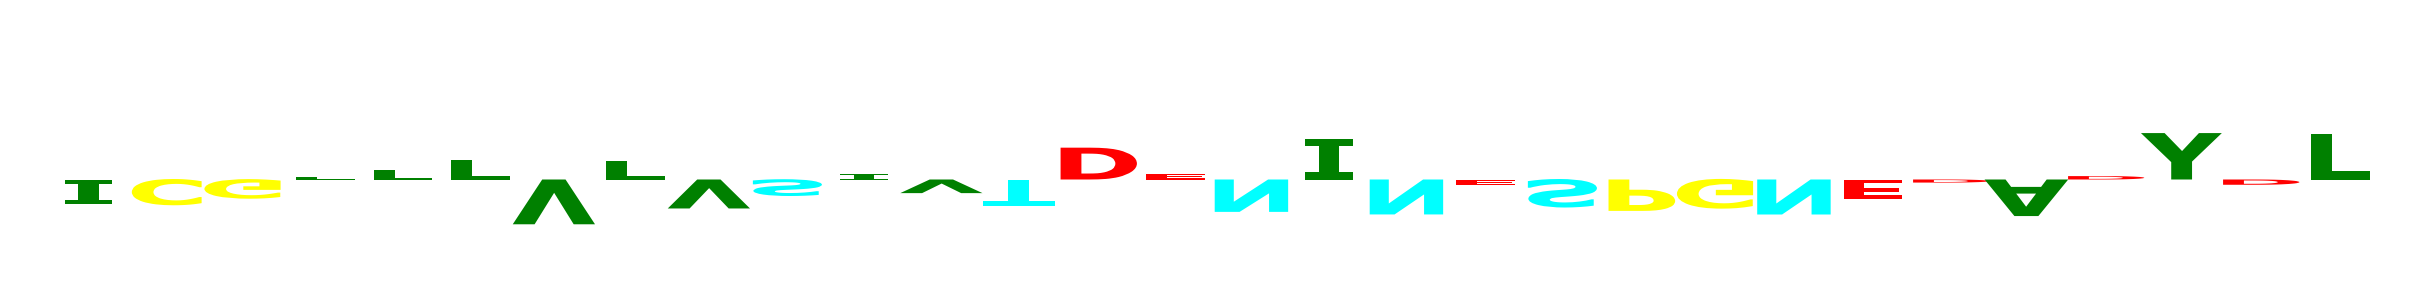

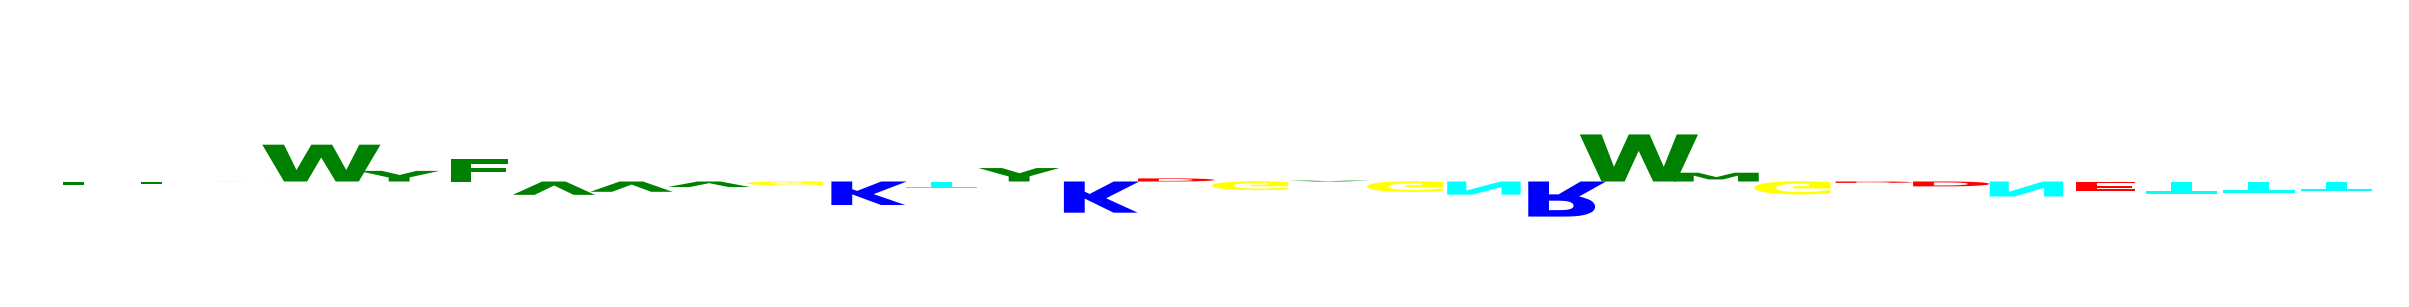

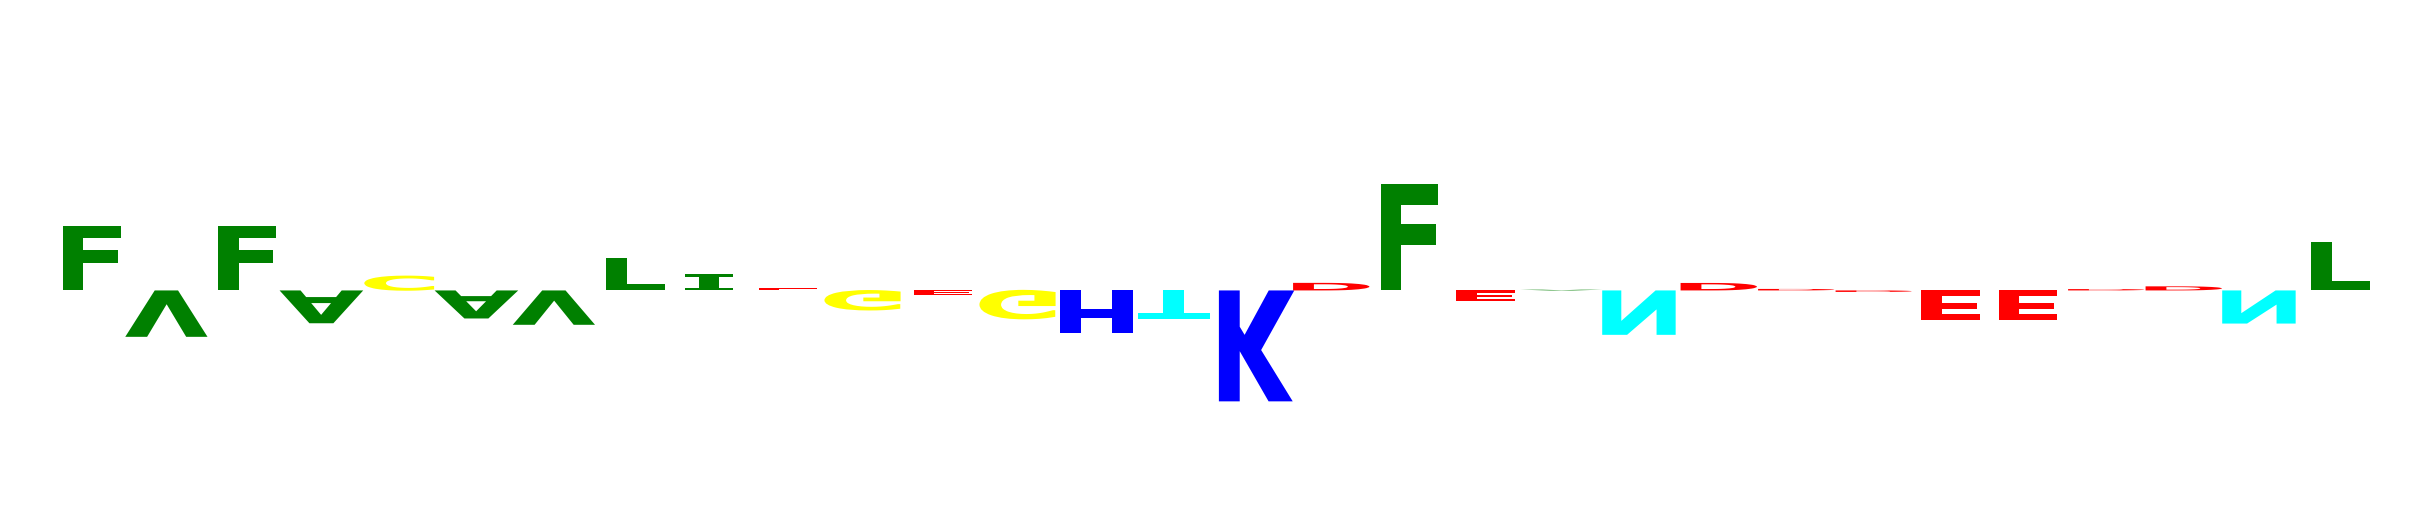

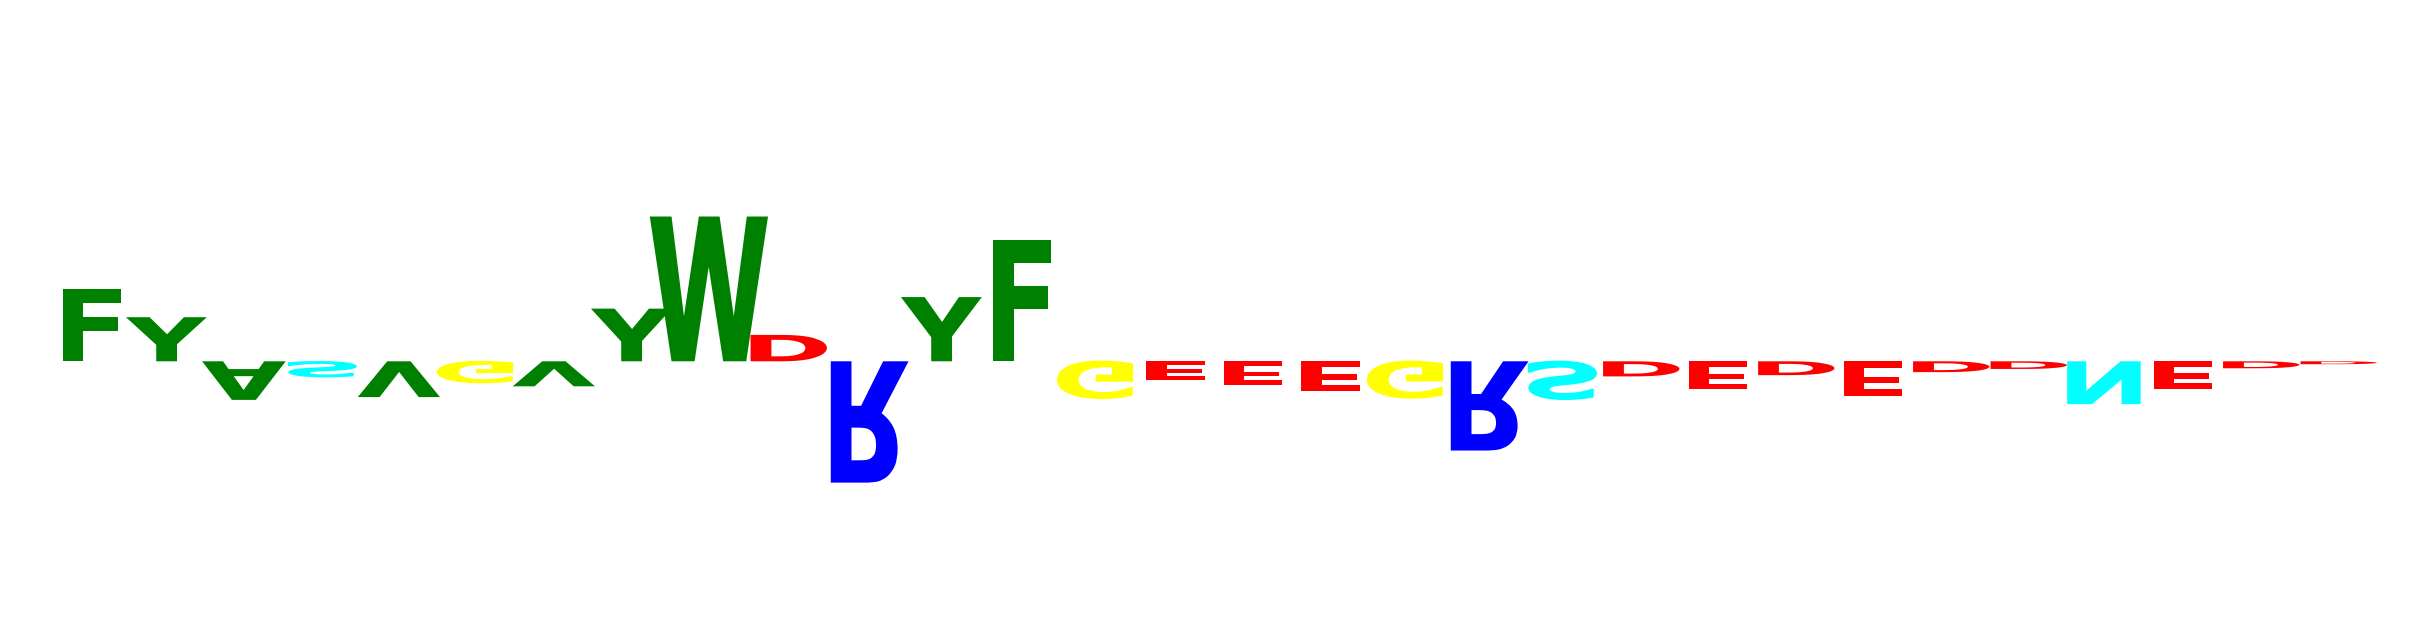

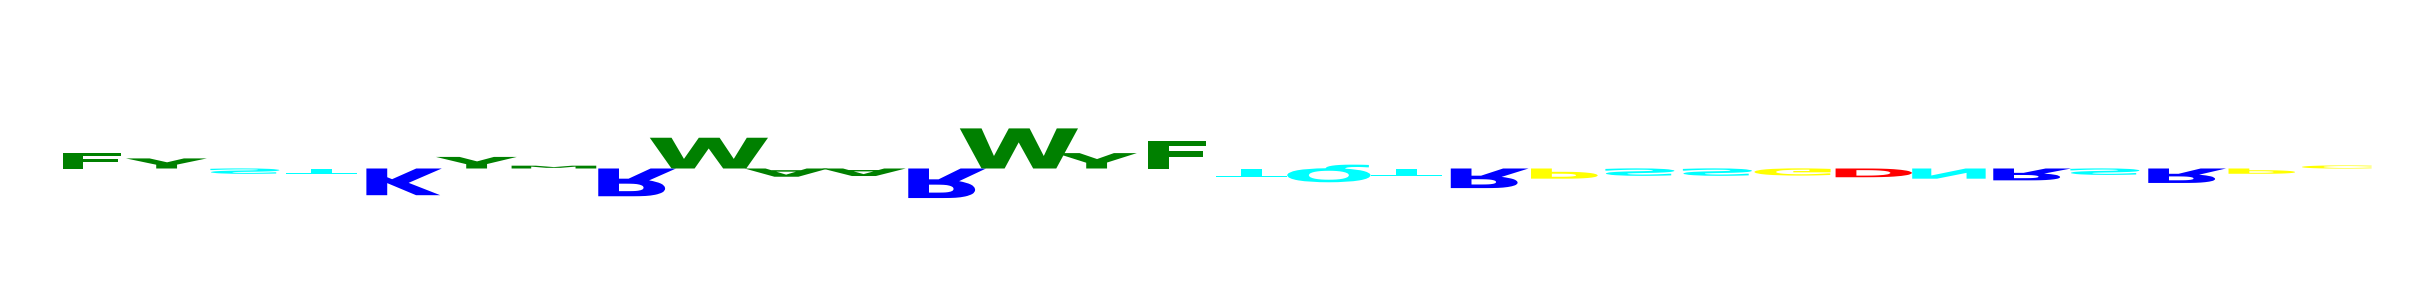

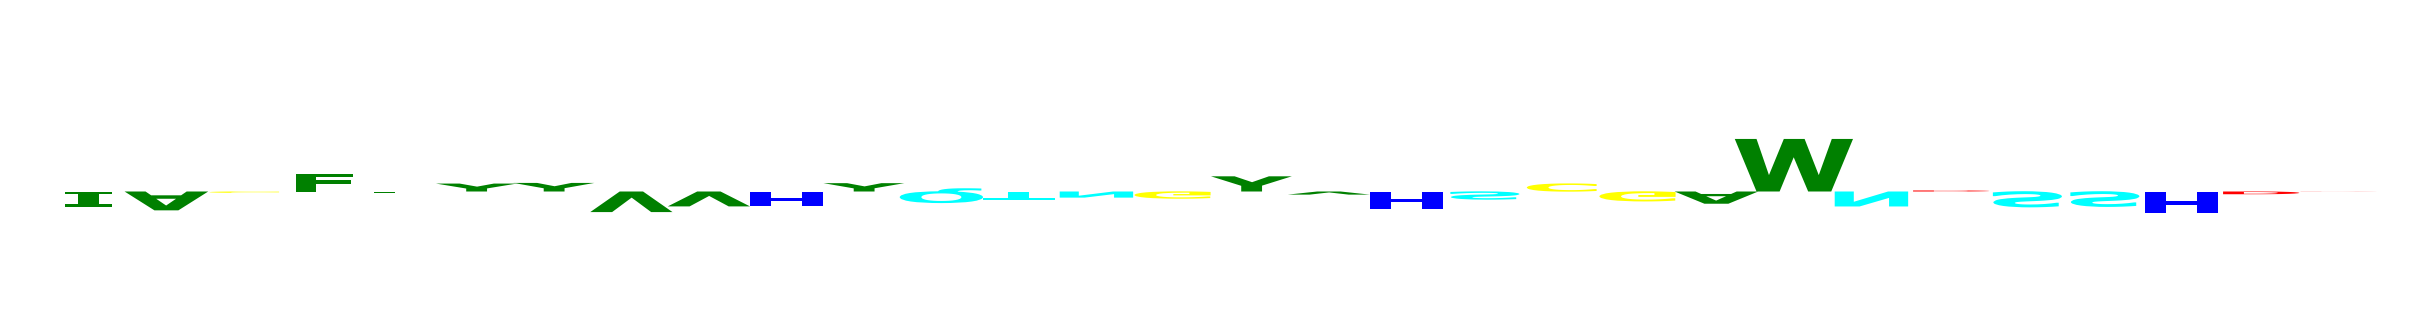

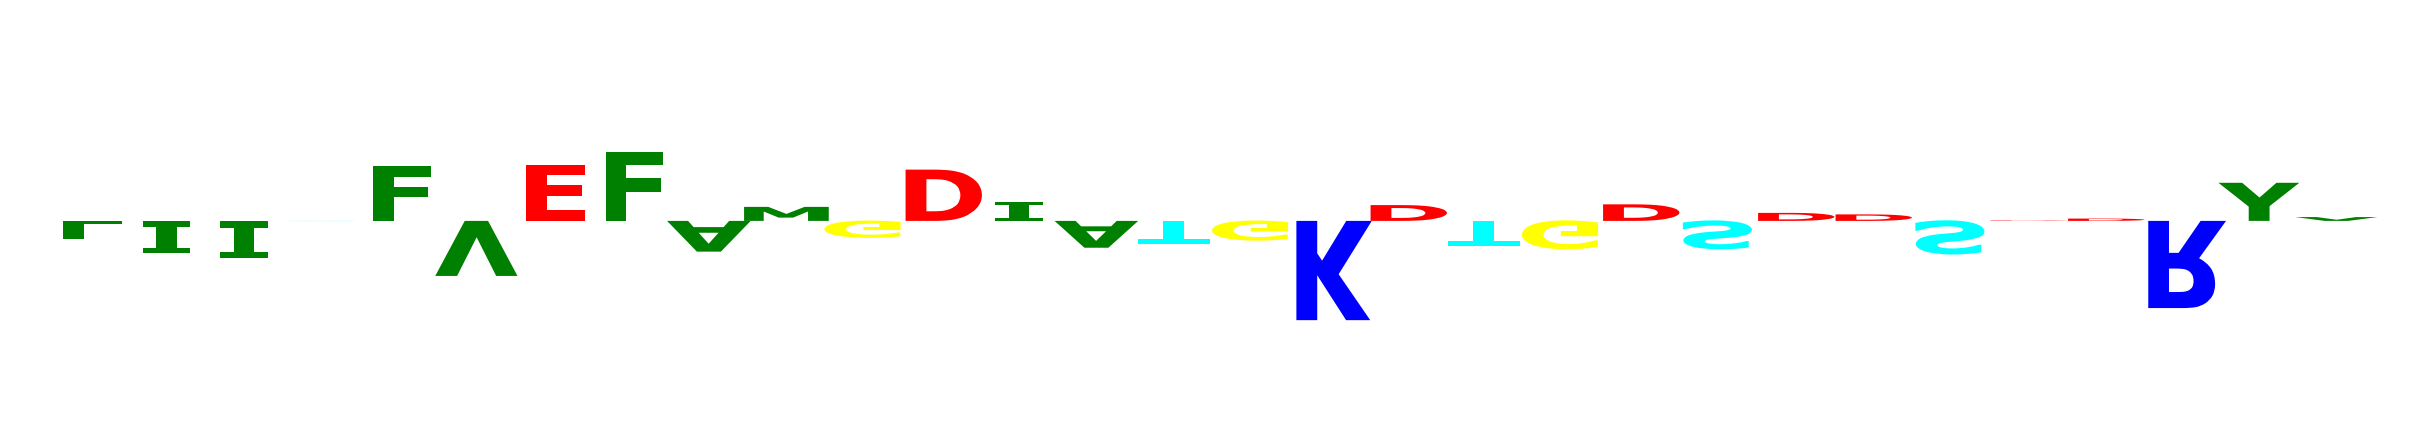

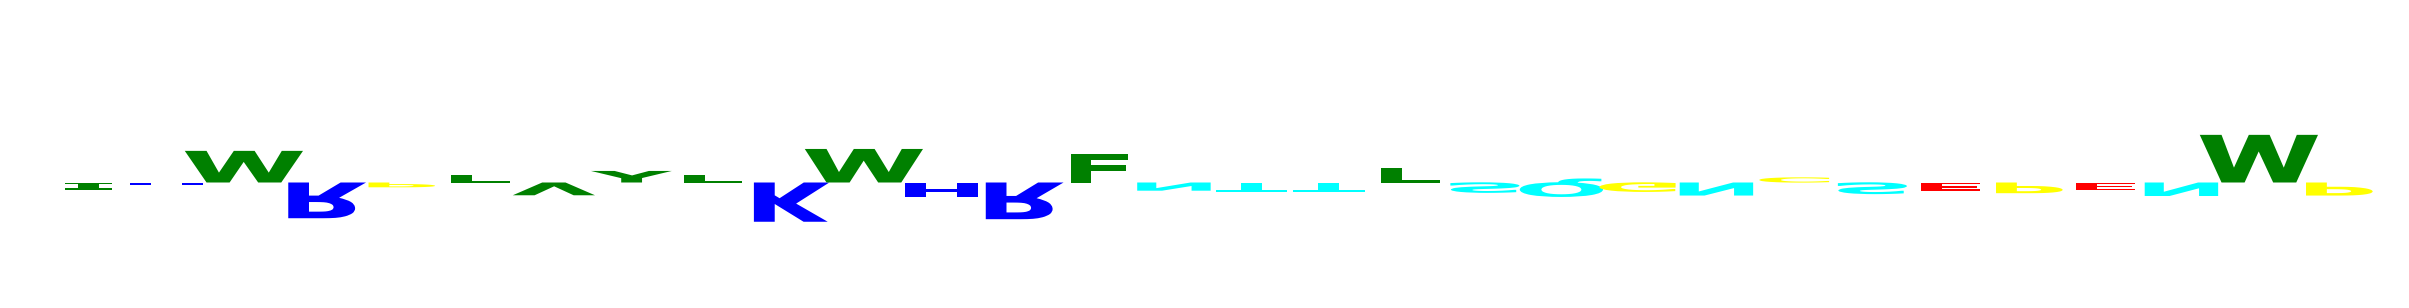

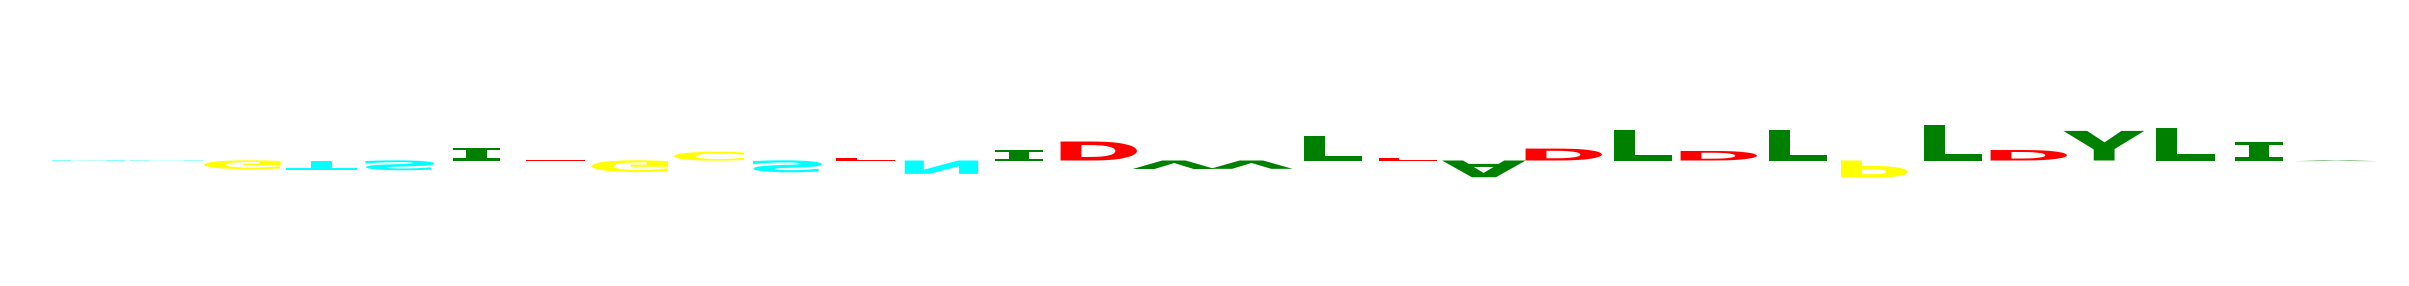

In [ ]:
from deepexplain.tensorflow import DeepExplain
from matplotlib import transforms
import matplotlib.patheffects
from matplotlib.font_manager import FontProperties



class Scale(matplotlib.patheffects.RendererBase):
    def __init__(self, sx, sy=None):
        self._sx = sx
        self._sy = sy

    def draw_path(self, renderer, gc, tpath, affine, rgbFace):
        affine = affine.identity().scale(self._sx, self._sy)+affine
        renderer.draw_path(gc, tpath, affine, rgbFace)


def ohe_2_aa_analog(ohe_data):
    global ss
    seq = ohe_data[:,:20].reshape(30,20)
    SS =  ohe_data[:,20:].reshape(30,3)

    seq_list = []
    for i in seq:
        seq_list.append([(i,j) for i,j in zip(aa,i)])
        
    ss_list = []
    for i in SS:
        ss_list.append([(i,j) for i,j in zip(ss,i)])
        
    return seq_list, ss_list


# define color schemes
aa_1 = {i:'blue' for i in ['R','H','K']}
aa_2 = {i:'red' for i in ['D','E']}
aa_3 = {i:'cyan' for i in ['S','T','N','Q']}
aa_4 = {i:'green' for i in ['A','I','L','M','F','W','Y','V']}
aa_5 = {i:'yellow' for i in ['C','G','P']}

COLOR_SCHEME_AA = {**aa_1,**aa_2,**aa_3,**aa_4,**aa_5}

COLOR_SCHEME_SS = {'E': 'orange',
                   'H': 'blue',
                   '-': 'red'}

def draw_logo2(all_scores, filename, fontfamily='Arial', size=80, COLOR_SCHEME=COLOR_SCHEME_AA):
    #if fontfamily == 'xkcd':
    #    plt.xkcd()
    #else:
    matplotlib.rcParams['font.family'] = fontfamily

    fig, ax = plt.subplots(figsize=(len(all_scores), 2.5))

    font = FontProperties()
    font.set_size(size)
    font.set_weight('bold')
    #font.set_family(fontfamily)

    ax.set_xticks(range(1,len(all_scores)+1))    
    ax.set_yticks(range(0,6))
    ax.set_xticklabels(range(1,len(all_scores)+1), rotation=90)
    ax.set_yticklabels(np.arange(-3,3,1))    
    sns.despine(ax=ax, trim=True)
    
    trans_offset = transforms.offset_copy(ax.transData,fig=fig, x=1, y=0,units='dots')
   
    for index, scores in enumerate(all_scores):
        yshift = 0
        #print(index,'esperando...', scores)
        for base, score in scores:
            txt = ax.text(index+1, 3, base,transform=trans_offset,fontsize=80, color=COLOR_SCHEME[base],ha='center',fontproperties=font,)
            txt.set_path_effects([Scale(1.0, score)])
            fig.canvas.draw()
            window_ext = txt.get_window_extent(txt._renderer)
            yshift = window_ext.height*score
            trans_offset = transforms.offset_copy(txt._transform, fig=fig, y=yshift, units='points')
        trans_offset = transforms.offset_copy(ax.transData, fig=fig, x=1, y=0, units='points')    
        
    plt.axis('off')
    plt.savefig(filename)
    plt.show()
    plt.close()
    return fig


for i in range(len(attributions_gi)):
    ALL_SCORES1, aSS1 = ohe_2_aa_analog(attributions_gi[i])
    f = draw_logo2(ALL_SCORES1, 'lala_AA.png', 'Verdana', COLOR_SCHEME=COLOR_SCHEME_AA)

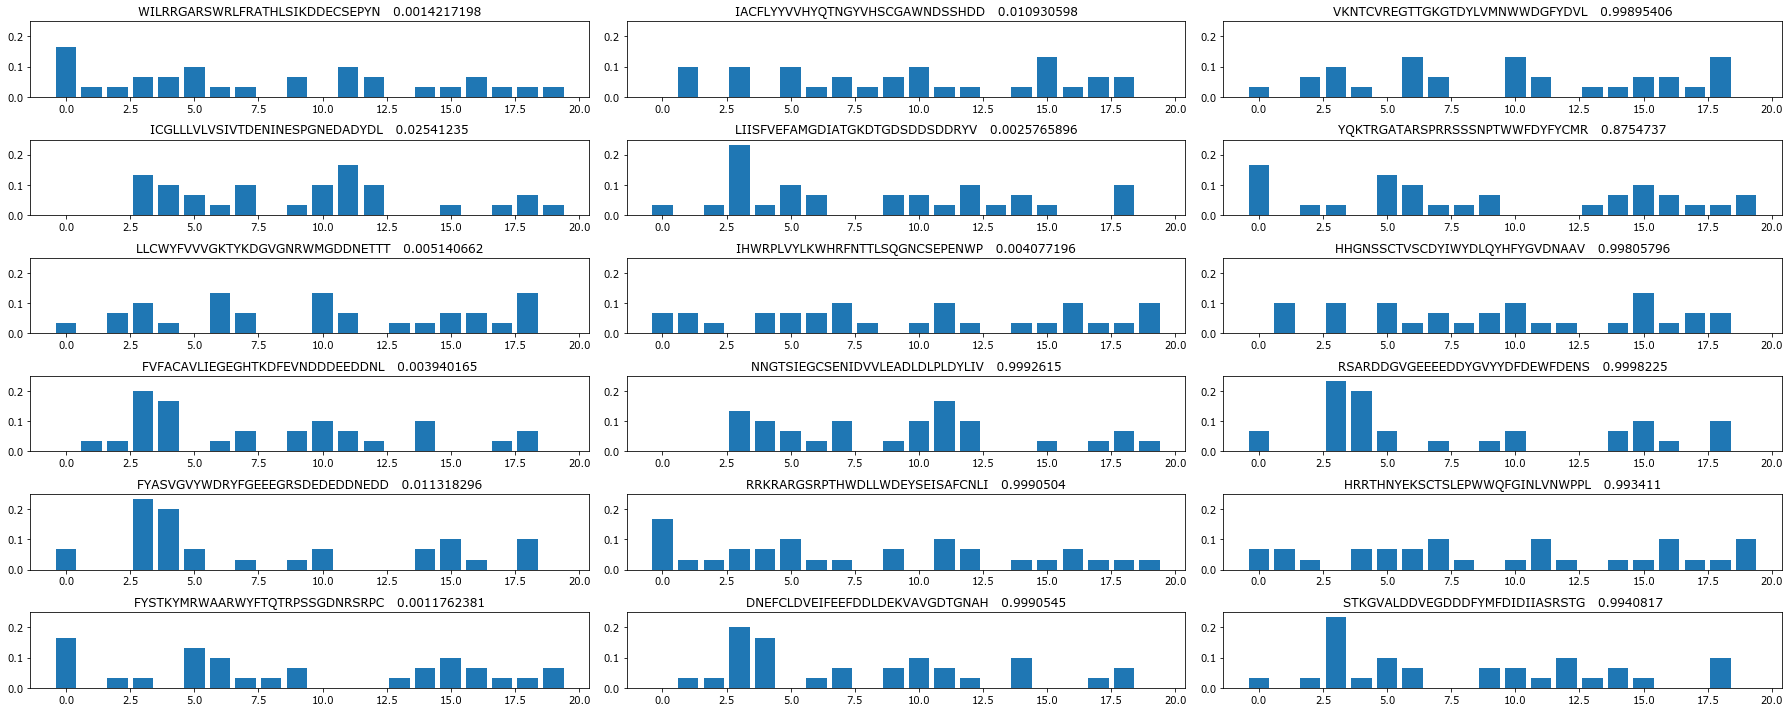

In [143]:
f, ax = plt.subplots(6,3, figsize=(25,10))

for n, (sequence, prediction) in enumerate(zip(x,y)):
    s=[]
    for position in sequence:
        s.append(aa[np.where(position==1)[0][0]]) 
    #print(''.join(s), '\t\t', prediction)
    
    n1 = n%6
    n2 = n//6
    
    ax[n1,n2].bar(np.arange(20), np.hstack(get_aa_frequencies(''.join(s))))
    ax[n1,n2].set_ylim(0,0.25)
    ax[n1,n2].set_title('   '.join([''.join(s), str(prediction)]))
    
plt.tight_layout()

In [7]:
def read_ss(filename):
    f = open(filename)
    for i in f:
        if i[0]=='#' or len(i)<3: continue
        ss.append(i.strip().replace('  ',' ').replace('C','-').split(' ')[2])
    f.close()
    return ''.join(ss)

def make_ohe(SEQ,SS):
    ohe = np.zeros(shape=(30,23))
    for n,i in enumerate(SEQ):
        ohe[n, aa.index(i)]=1    
    for n,i in enumerate(SS):
        ohe[n, ss.index(i)+20]=1

    return ohe

def ohe_2_aa_binary(ohe_data):
    seq = []
    struc = []
    
    for n,i in enumerate(ohe_data):
        seq.append(aa[int(np.where(i[:20]!=0)[0])])
        struc.append(ss[int(np.where(i[20:]!=0)[0])])
        
    return ''.join(seq), ''.join(struc)

def ohe_2_aa_analog(ohe_data):
    global ss
    seq = ohe_data[:,:20].reshape(30,20)
    SS =  ohe_data[:,20:].reshape(30,3)

    seq_list = []
    for i in seq:
        seq_list.append([(i,j) for i,j in zip(aa,i)])
        
    ss_list = []
    for i in SS:
        ss_list.append([(i,j) for i,j in zip(ss,i)])
        
    return seq_list, ss_list

# define color schemes
aa_1 = {i:'blue' for i in ['R','H','K']}
aa_2 = {i:'red' for i in ['D','E']}
aa_3 = {i:'cyan' for i in ['S','T','N','Q']}
aa_4 = {i:'green' for i in ['A','I','L','M','F','W','Y','V']}
aa_5 = {i:'yellow' for i in ['C','G','P']}

COLOR_SCHEME_AA = {**aa_1,**aa_2,**aa_3,**aa_4,**aa_5}

COLOR_SCHEME_SS = {'E': 'orange',
                   'H': 'blue',
                   '-': 'red'}

def logo(attributions_gradin_sample, score, ax):
    a = attributions_gradin_sample.reshape(30,23).T
    b = a.sum(axis=0)
    A = np.abs(b)
    scale = (A-np.min(A)) / (np.max(A) - np.min(A))
    sequence=ohe_2_aa_binary(attributions_gradin_sample)[0]
    colors = [COLOR_SCHEME_AA[i] for i in sequence]
    
    ax.bar(np.arange(30), a.sum(axis=0), alpha=0.2, color=colors)

    for n,(s,h) in enumerate(zip(sequence, b)):
        y = [0 if h>0 else h][0]
        ax.text(n-0.5,y, s, fontsize=scale[n]*100, color=colors[n], fontweight='bold', fontname='Andale Mono')
        ax.text(n,np.min(b), s, fontsize=15, color=colors[n], fontweight='bold', fontname='Andale Mono')

    ax.set_title(score)
    plt.tight_layout()
    

for n, (i,j) in enumerate(zip(attributions_gi, y)):
    f,ax = plt.subplots(1,1, figsize=(20,5))
    logo(i, j, ax)

NameError: name 'attributions_gi' is not defined

---
## Try to find patterns at the last minute to argument in the conclussions.

In [8]:
dfscore = get_enrichment_scores_table()
dfscore['score'] = np.sum(dfscore[['bin1','bin2','bin3','bin4']] * np.array(ARG3_FACS_RFU), axis=1) / (dfscore['bg']+1)

In [9]:
top200 = []

for i in dfscore.sort_values('score')[::-1][:200].index:
    idx = np.where(positives[:,0]==i)[0][0]
    top200.append(positives[idx])
    
ohes = np.array([prepare_ohe(i) for i in top200])
preds = np.hstack(ADPred.predict(ohes.reshape(len(ohes),30,23,1)))


bottom200=[]

for i in dfscore.loc[positives[:,0],:].sort_values('score')[20:220].index:
    idx = np.where(positives[:,0]==i)[0][0]
    bottom200.append(positives[idx])
    
ohes = np.array([prepare_ohe(i) for i in bottom200])
predsb = np.hstack(ADPred.predict(ohes.reshape(len(ohes),30,23,1)))

In [10]:
def read_ss(filename):
    f = open(filename)
    for i in f:
        if i[0]=='#' or len(i)<3: continue
        ss.append(i.strip().replace('  ',' ').replace('C','-').split(' ')[2])
    f.close()
    return ''.join(ss)

def make_ohe(SEQ,SS):
    ohe = np.zeros(shape=(30,23))
    for n,i in enumerate(SEQ):
        ohe[n, aa.index(i)]=1    
    for n,i in enumerate(SS):
        ohe[n, ss.index(i)+20]=1

    return ohe

def ohe_2_aa_binary(ohe_data):
    seq = []
    struc = []
    
    for n,i in enumerate(ohe_data):
        seq.append(aa[int(np.where(i[:20]!=0)[0])])
        struc.append(ss[int(np.where(i[20:]!=0)[0])])
        
    return ''.join(seq), ''.join(struc)

def ohe_2_aa_analog(ohe_data):
    global ss
    seq = ohe_data[:,:20].reshape(30,20)
    SS =  ohe_data[:,20:].reshape(30,3)

    seq_list = []
    for i in seq:
        seq_list.append([(i,j) for i,j in zip(aa,i)])
        
    ss_list = []
    for i in SS:
        ss_list.append([(i,j) for i,j in zip(ss,i)])
        
    return seq_list, ss_list

# define color schemes
aa_1 = {i:'blue' for i in ['R','H','K']}
aa_2 = {i:'red' for i in ['D','E']}
aa_3 = {i:'cyan' for i in ['S','T','N','Q']}
aa_4 = {i:'green' for i in ['A','I','L','M','F','W','Y','V']}
aa_5 = {i:'yellow' for i in ['C','G','P']}

COLOR_SCHEME_AA = {**aa_1,**aa_2,**aa_3,**aa_4,**aa_5}

COLOR_SCHEME_SS = {'E': 'orange',
                   'H': 'blue',
                   '-': 'red'}

def logo(attributions_gradin_sample, score, ax):
    a = attributions_gradin_sample.reshape(30,23).T
    b = a.sum(axis=0)
    A = np.abs(b)
    scale = (A-np.min(A)) / (np.max(A) - np.min(A))
    sequence=ohe_2_aa_binary(attributions_gradin_sample)[0]
    colors = [COLOR_SCHEME_AA[i] for i in sequence]
    
    ax.bar(np.arange(30), a.sum(axis=0), alpha=0.2, color=colors)

    for n,(s,h) in enumerate(zip(sequence, b)):
        y = [0 if h>0 else h][0]
        ax.text(n-0.5,y, s, fontsize=scale[n]*100, color=colors[n], fontweight='bold', fontname='Andale Mono')
        ax.text(n,np.min(b), s, fontsize=15, color=colors[n], fontweight='bold', fontname='Andale Mono')

    ax.set_title(score)
    plt.tight_layout()

In [11]:
from deepexplain.tensorflow import DeepExplain
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# Import DeepExplain
from deepexplain.tensorflow import DeepExplain

with DeepExplain(session=K.get_session()) as de:
    input_tensor = ADPred.layers[0].input
    fModel = Model(inputs=input_tensor, outputs = ADPred.layers[-2].output)
    target_tensor = fModel(input_tensor)
    
    s0 = ohes.shape[0]
    xs = ohes.reshape(s0,30,23,1)
    ys = preds.reshape(s0,1)
    
    #attributions_gradin = de.explain('grad*input', target_tensor, input_tensor, xs, ys=ys)
    #attributions_sv     = de.explain('shapley_sampling', target_tensor, input_tensor, xs, ys=ys, samples=100)
    attributions_dl     = de.explain('deeplift', target_tensor, input_tensor, xs, ys=ys)

In [65]:
for n,i in enumerate(attributions_dl):
    f,ax = plt.subplots(1, figsize=(20,5))
    logo(i, preds[n], ax)
    plt.savefig('bottom200_'+str(n))
    plt.close()

# CHECKEAR QUE ESTOY USANDO POOLING EN ZIMBRA

In [24]:
783*300+300

235200

In [9]:
import sys, time
try:
    from IPython.core.display import clear_output
    have_ipython = True
except ImportError:
    have_ipython = False

class ProgressBar:
    def __init__(self, iterations):
        self.iterations = iterations
        self.prog_bar = '[]'
        self.fill_char = '*'
        self.width = 40
        self.__update_amount(0)
        if have_ipython:
            self.animate = self.animate_ipython
        else:
            self.animate = self.animate_noipython

    def animate_ipython(self, iter):
        try:
            clear_output()
        except Exception:
            # terminal IPython has no clear_output
            pass
        print('\r', self,)
        sys.stdout.flush()
        self.update_iteration(iter + 1)

In [2]:
# get filenames
Dir = analysis_home+'/data/performances/'
Dir2 = analysis_home + '/data/performances/test_new/'

files = {
    'single': [i for i in os.listdir(Dir2) if re.search('_single_',i)],
    'dipeptides': [i for i in os.listdir(Dir2) if re.search('_dipept_',i)],
    'seq': [i for i in os.listdir(Dir) if re.search('seq_--random-seed_', i)],
    'seq_iupred': [i for i in os.listdir(Dir) if re.search('seq_iupred_short_--random-seed_', i)],
    'seq_ss': [i for i in os.listdir(Dir) if re.search('seq_ss_--random-seed_', i)],
    'seq_ss_iupred': [i for i in os.listdir(Dir) if re.search('seq_ss_iupred_short_--random-seed_', i)]
}

# extract content of files into a dictionary with mean+/- SD of performance of models
performances = {i: {'auprc':{}, 'auroc':{}, 'acc':{}} for i in files.keys()}

for i in files.keys():

    # first get SD for each metric
    raw_values, metrics = [], {'auprc':[], 'auroc':[], 'acc':[]}

    for f in files[i]:
        tmp = np.load(Dir+f)
        raw_values.append(tmp)
        metrics['auprc'].append(average_precision_score(tmp[:,1],tmp[:,0]))
        metrics['auroc'].append(roc_auc_score(tmp[:,1],tmp[:,0]))
        metrics['acc'].append(accuracy(tmp[:,0], tmp[:,1].astype(int)))

    X = np.vstack(raw_values)
    performances[i]['auprc'] = np.hstack([average_precision_score( X[:,1], X[:,0] ), np.std( np.hstack(metrics['auprc']) )])
    performances[i]['auroc'] = np.hstack([roc_auc_score( X[:,1], X[:,0] ),           np.std( np.hstack(metrics['auroc']) )])
    performances[i]['acc']   = np.hstack([accuracy( X[:,0], X[:,1].astype(int) ),    np.std( np.hstack(metrics['acc']) )])


matplotlib.style.use('ggplot') #seaborn-colorblind')
plt.figure(figsize=(10,5))
keys = ['dipeptides', 'single', 'seq_ss_iupred', 'seq_iupred', 'seq_ss', 'seq'][::-1]
vals = np.vstack([performances[i]['auprc'] for i in keys])
plt.errorbar(vals[:,0], keys, xerr=vals[:,1], fmt='o', mfc='r', mec='r', ecolor='k', lw=3, markersize=10)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/aerijman/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-939553e94875>", line 6, in <module>
    'single': [i for i in os.listdir(Dir2) if re.search('_single_',i)],
FileNotFoundError: [Errno 2] No such file or directory: '/Users/aerijman/Desktop/AD_summary/publication/analysis/data/performances/test_new/'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/aerijman/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'FileNotFoundError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/aerijman/miniconda3/lib/python3.7/site-package

FileNotFoundError: [Errno 2] No such file or directory: '/Users/aerijman/Desktop/AD_summary/publication/analysis/data/performances/test_new/'

In [3]:
Dir = analysis_home+'/data/performances/'
files = {
    'single': [i for i in os.listdir(Dir) if re.search('_single_',i)],
    'dipeptides': [i for i in os.listdir(Dir) if re.search('_dipept_',i)],
    'seq': [i for i in os.listdir(Dir) if re.search('seq_--random-seed_', i)],
    'seq_iupred': [i for i in os.listdir(Dir) if re.search('seq_iupred_short_--random-seed_', i)],
    'seq_ss': [i for i in os.listdir(Dir) if re.search('seq_ss_--random-seed_', i)],
    'seq_ss_iupred': [i for i in os.listdir(Dir) if re.search('seq_ss_iupred_short_--random-seed_', i)]
}

# extract content of files into a dictionary with mean+/- SD of performance of models
performances = {i: {'auprc':{}, 'auroc':{}, 'acc':{}} for i in files.keys()}

for i in files.keys():

    # first get SD for each metric
    raw_values, metrics = [], {'auprc':[], 'auroc':[], 'acc':[]}

    for f in files[i]:
        tmp = np.load(Dir+f)
        raw_values.append(tmp)
        metrics['auprc'].append(average_precision_score(tmp[:,1],tmp[:,0]))
        metrics['auroc'].append(roc_auc_score(tmp[:,1],tmp[:,0]))
        metrics['acc'].append(accuracy(tmp[:,0], tmp[:,1].astype(int)))

    X = np.vstack(raw_values)
    performances[i]['auprc'] = np.hstack([average_precision_score( X[:,1], X[:,0] ), np.std( np.hstack(metrics['auprc']) )])
    performances[i]['auroc'] = np.hstack([roc_auc_score( X[:,1], X[:,0] ),           np.std( np.hstack(metrics['auroc']) )])
    performances[i]['acc']   = np.hstack([accuracy( X[:,0], X[:,1].astype(int) ),    np.std( np.hstack(metrics['acc']) )])

In [12]:
for i in performances.keys():
    auprc, auroc, acc = [performances[i][j] for j in performances[i].keys()]
    
    print('{:<15} auprc={:.3f} \u00B1 {:.3f} \t auroc={:.3f} \u00B1 {:.3f} \t acc={:.3f} \u00B1 {:.3f}'.format(
        i, auprc[0], auprc[1], auroc[0], auroc[1], acc[0], acc[1]))

single          auprc=0.934 ± 0.002 	 auroc=0.945 ± 0.002 	 acc=0.883 ± 0.003
dipeptides      auprc=0.942 ± 0.002 	 auroc=0.951 ± 0.002 	 acc=0.892 ± 0.004
seq             auprc=0.972 ± 0.002 	 auroc=0.974 ± 0.001 	 acc=0.929 ± 0.004
seq_iupred      auprc=0.971 ± 0.002 	 auroc=0.974 ± 0.002 	 acc=0.927 ± 0.005
seq_ss          auprc=0.975 ± 0.002 	 auroc=0.977 ± 0.002 	 acc=0.933 ± 0.005
seq_ss_iupred   auprc=0.974 ± 0.002 	 auroc=0.976 ± 0.002 	 acc=0.932 ± 0.003


In [13]:
df = get_enrichment_scores_table()
df['score'] = np.sum(df.iloc[:,1:]*ARG3_FACS_RFU, axis=1) / (df.iloc[:,0] + 1)

best_20_enrichment = list(df.sort_values('score')[::-1][:20].index)
best_20_ADscore = positives[np.argsort([ADPred.predict(prepare_ohe(sample).reshape(1,30,23,1))[0][0] for sample in positives])[-20:],0]

In [14]:
ids_enrichment = [np.where(positives[:,0]==sample)[0][0] for sample in best_20_enrichment]
ids_adpred = [np.where(positives[:,0]==sample)[0][0] for sample in best_20_ADscore]

ohes1 = np.array([prepare_ohe(i) for i in positives[ids_enrichment]])
ohes2 = np.array([prepare_ohe(i) for i in positives[ids_adpred]])

preds1 = np.hstack([ADPred.predict(i.reshape(1,30,23,1))[0][0] for i in ohes1])
preds2 = np.hstack([ADPred.predict(i.reshape(1,30,23,1))[0][0] for i in ohes2])

In [15]:
from deepexplain.tensorflow import DeepExplain
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# Import DeepExplain
from deepexplain.tensorflow import DeepExplain

with DeepExplain(session=K.get_session()) as de:
    input_tensor = ADPred.layers[0].input
    fModel = Model(inputs=input_tensor, outputs = ADPred.layers[-2].output)
    target_tensor = fModel(input_tensor)
    
    s0 = ohes1.shape[0]
    xs = ohes1.reshape(s0,30,23,1)
    ys = preds1.reshape(s0,1)
    
    #attributions_gradin = de.explain('grad*input', target_tensor, input_tensor, xs, ys=ys)
    #attributions_sv     = de.explain('shapley_sampling', target_tensor, input_tensor, xs, ys=ys, samples=100)
    attributions_dl     = de.explain('deeplift', target_tensor, input_tensor, xs, ys=ys)

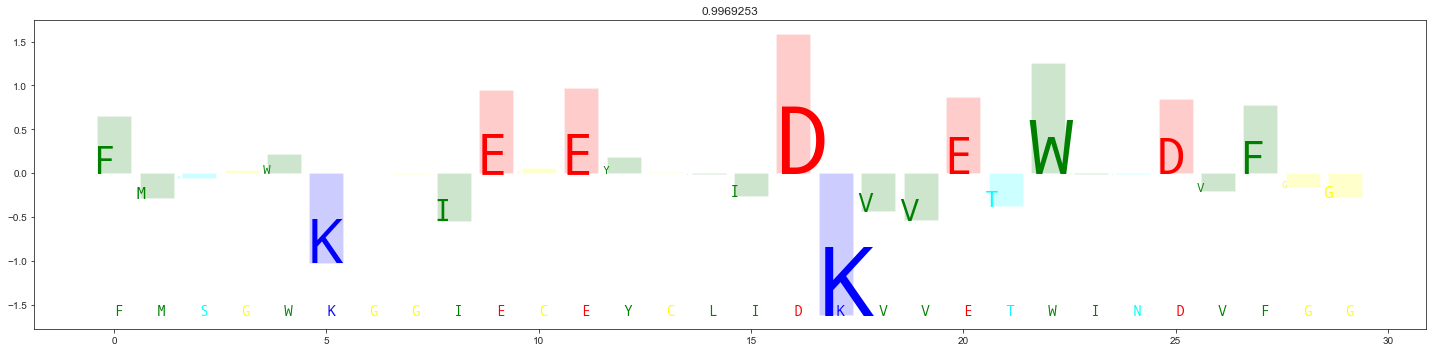

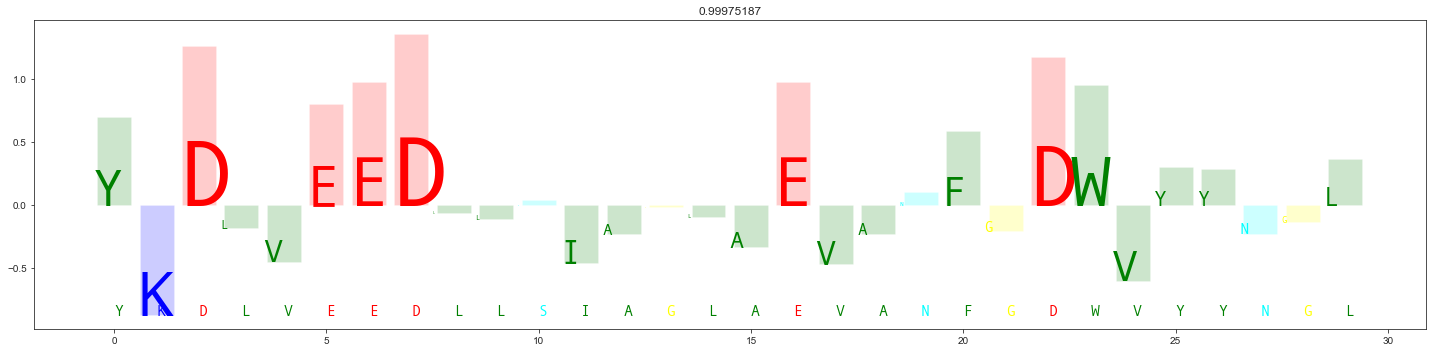

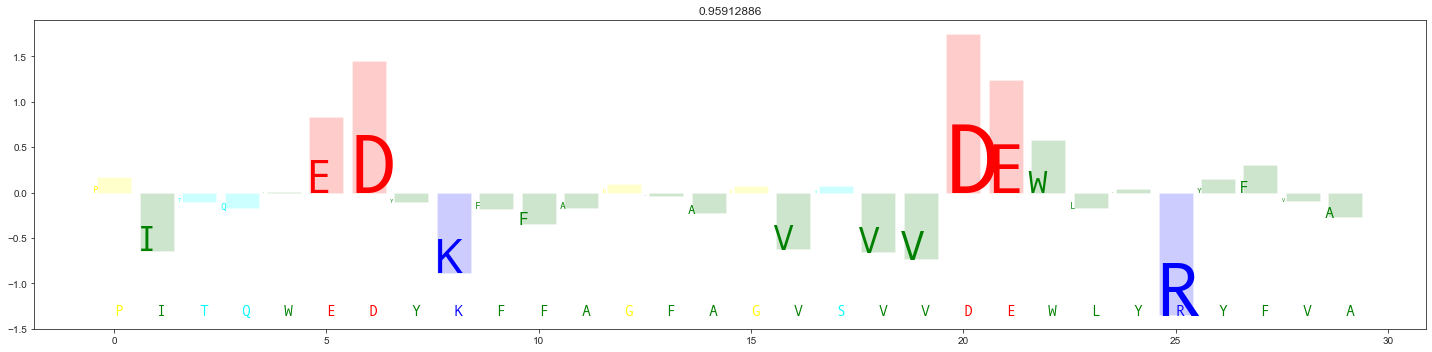

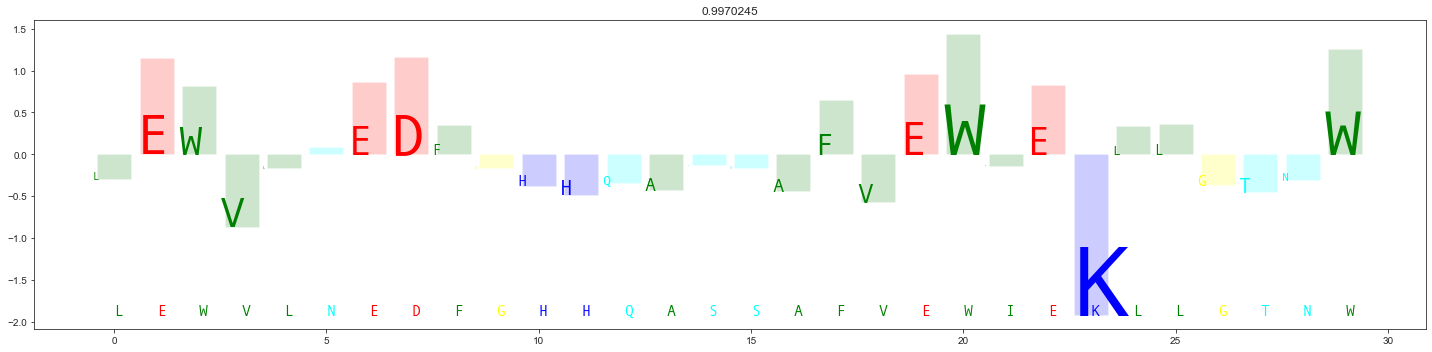

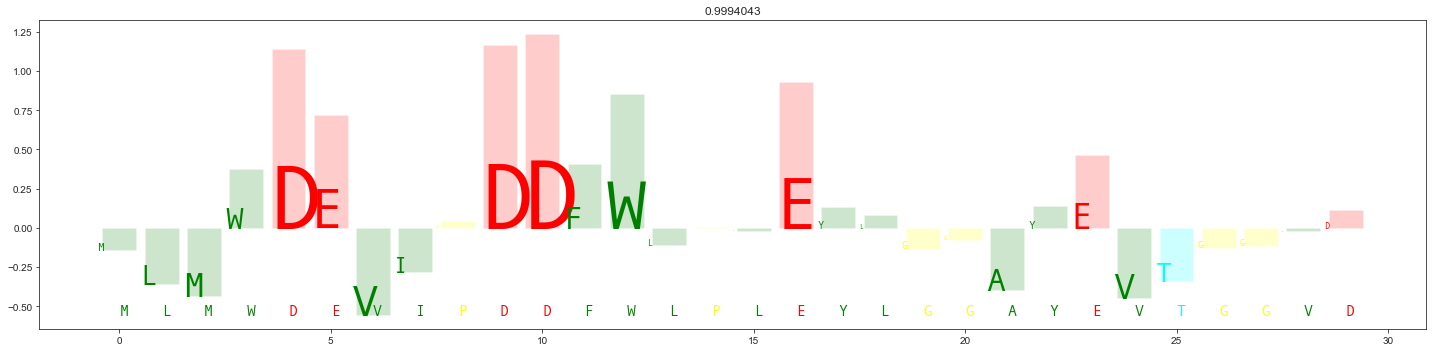

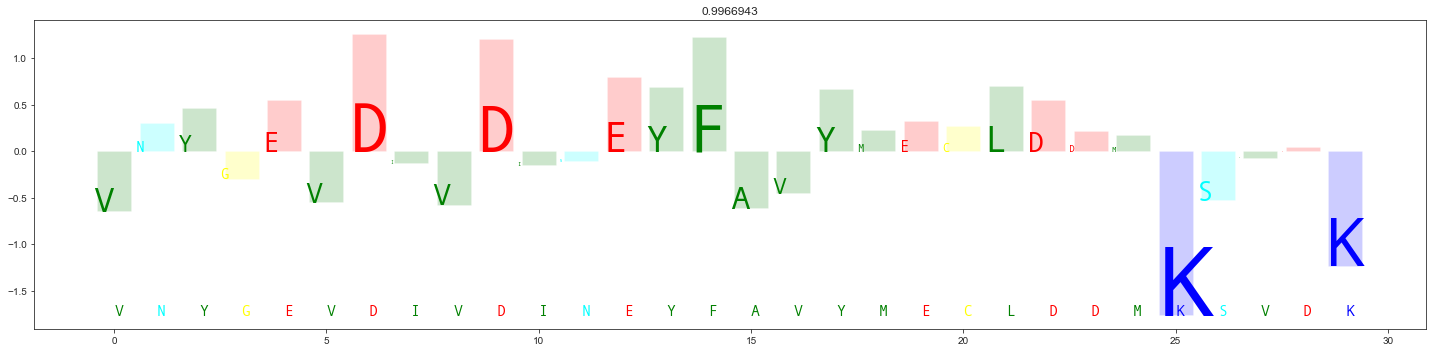

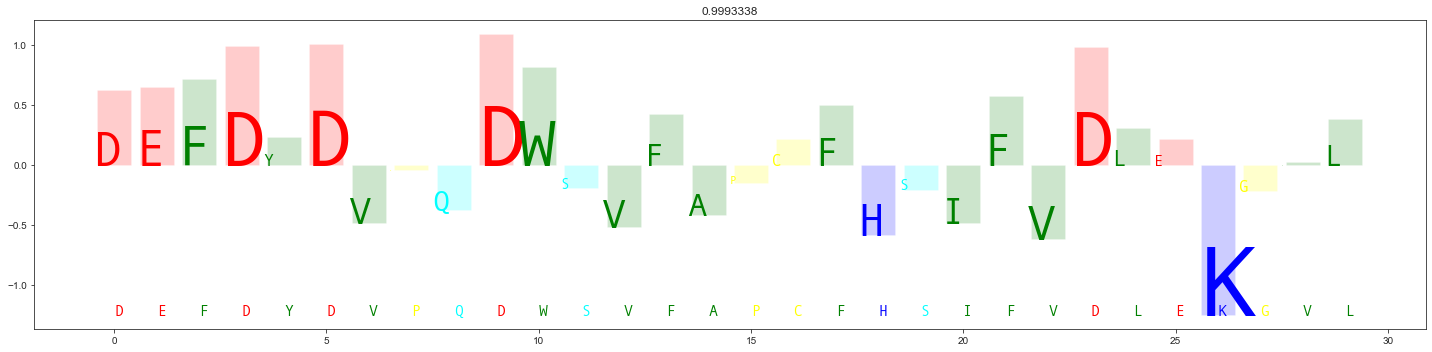

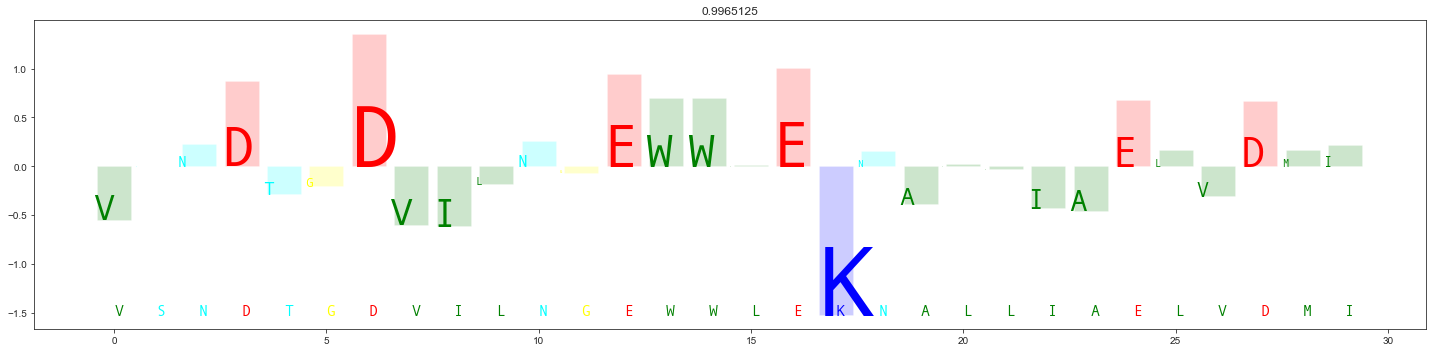

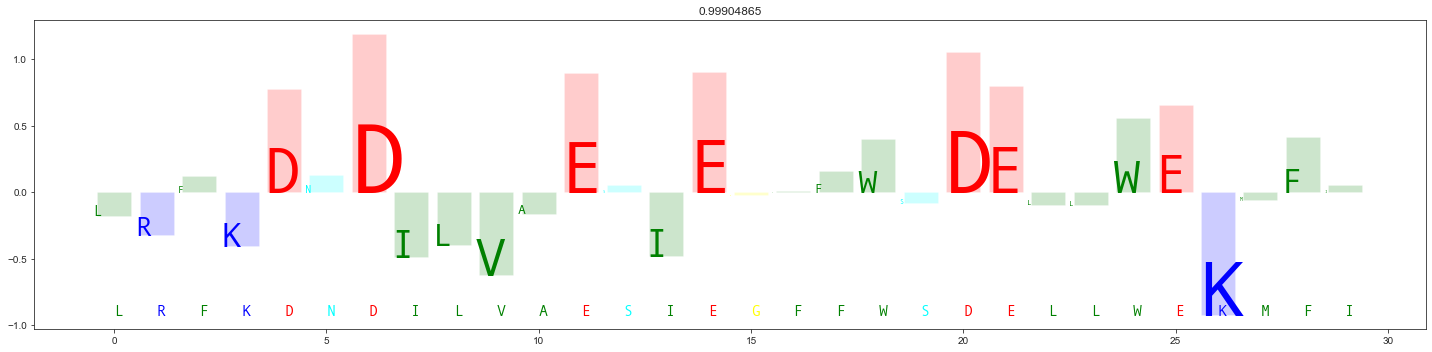

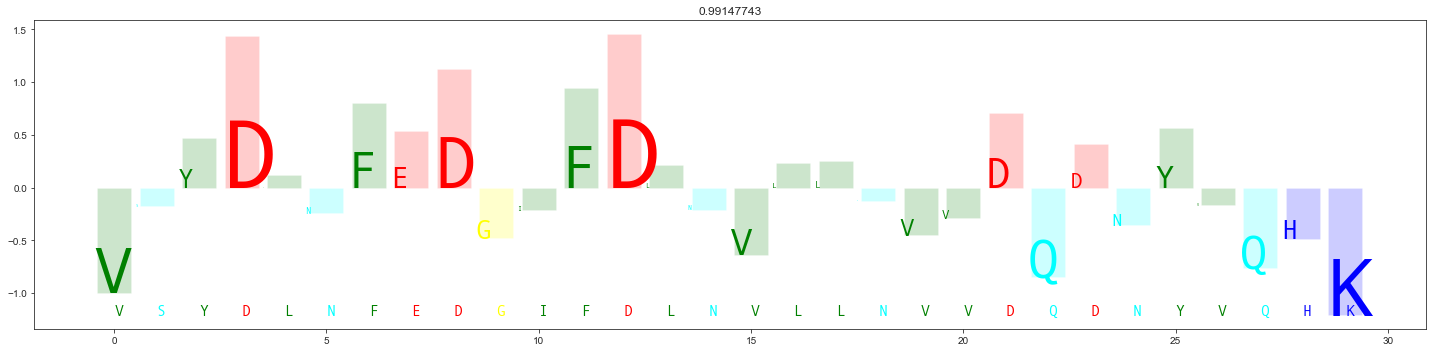

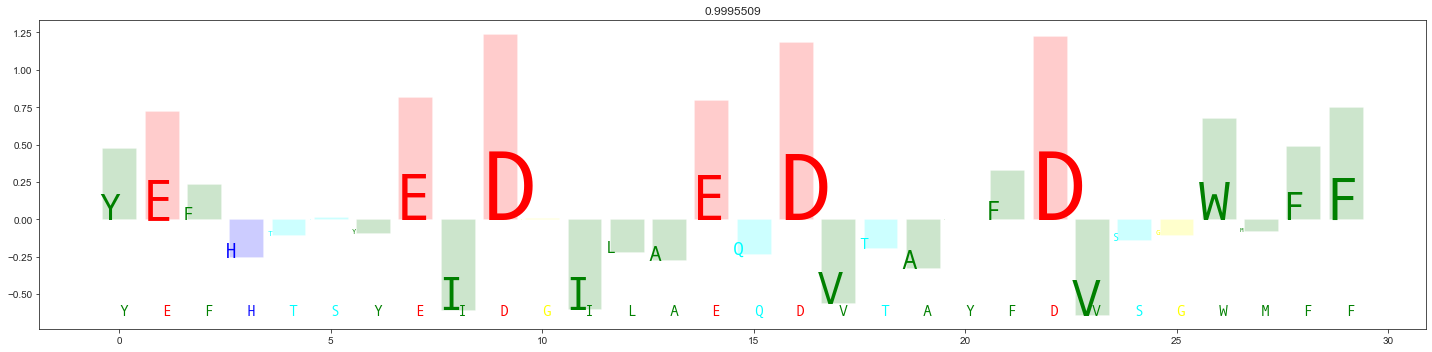

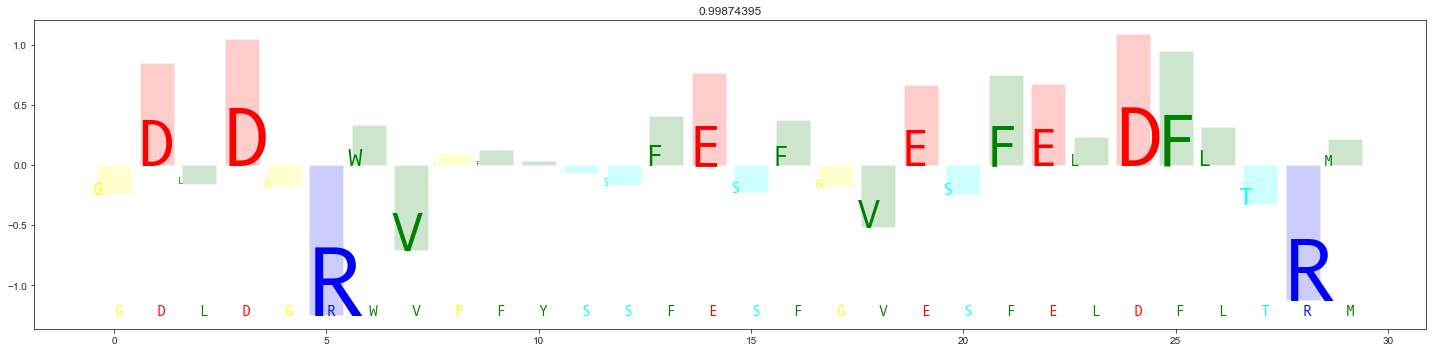

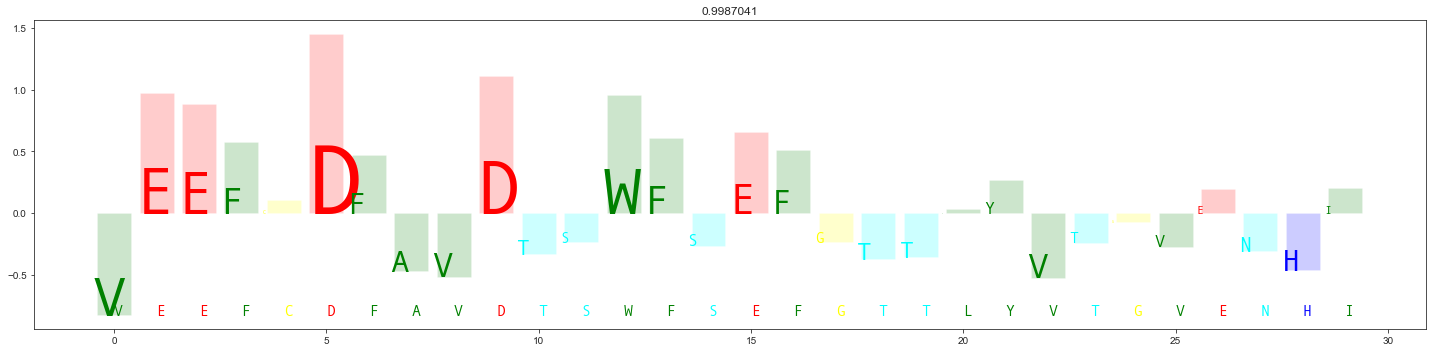

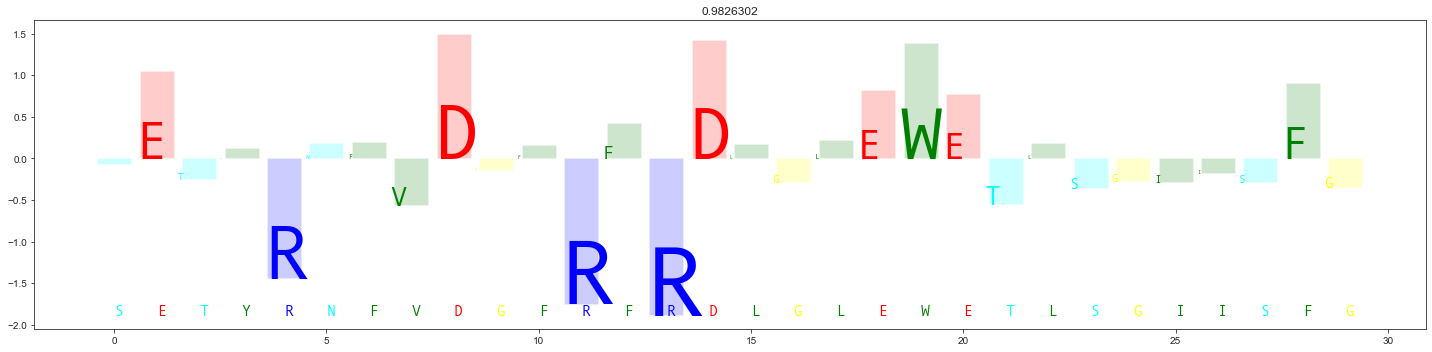

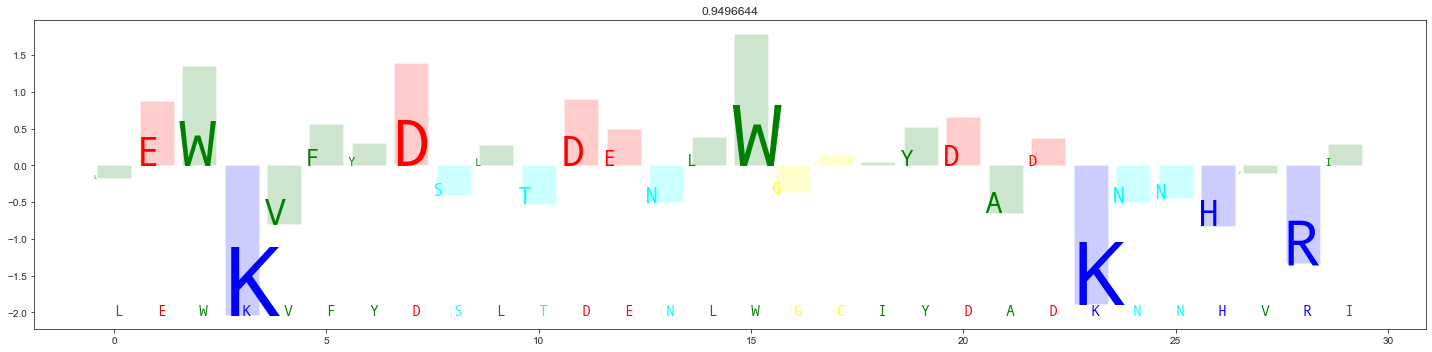

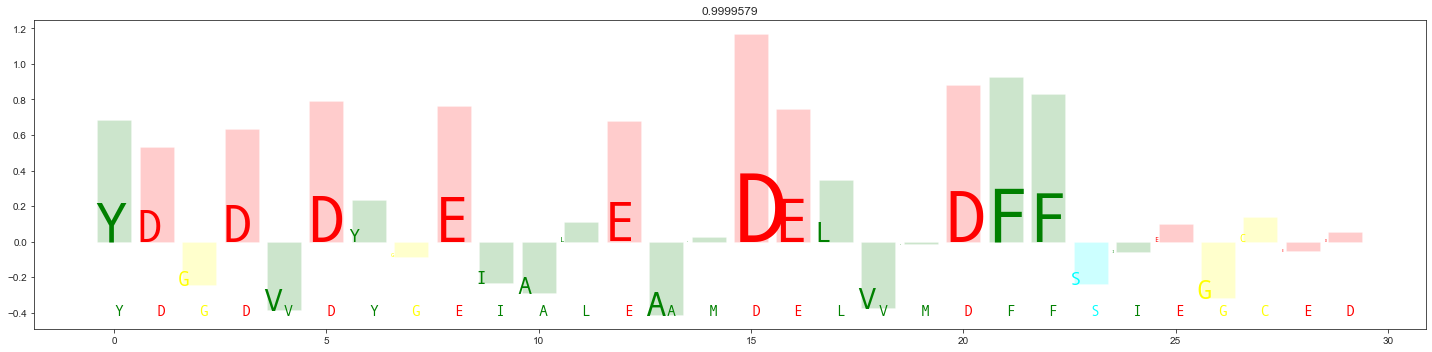

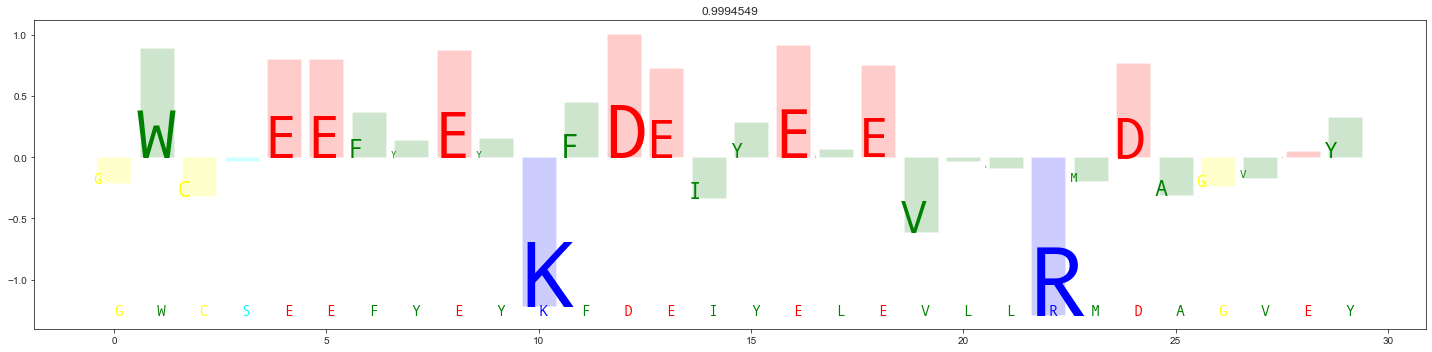

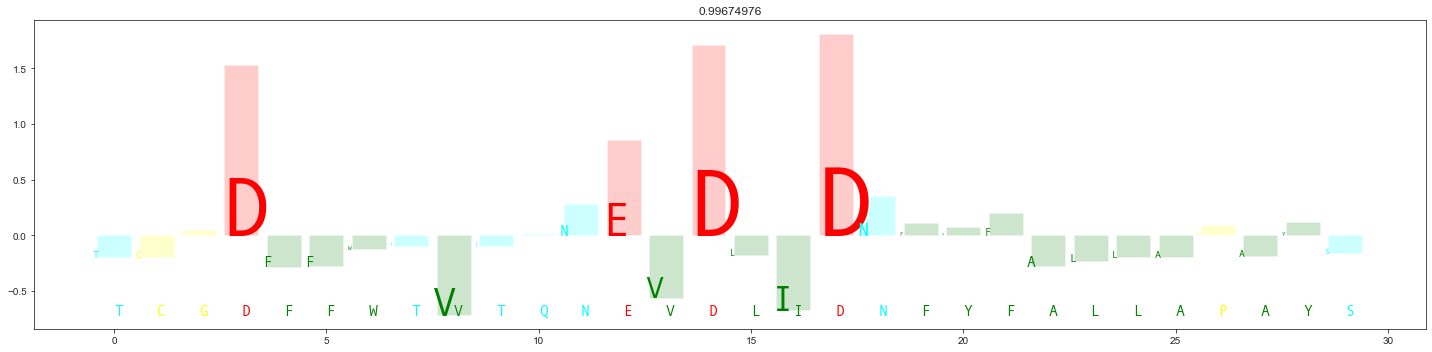

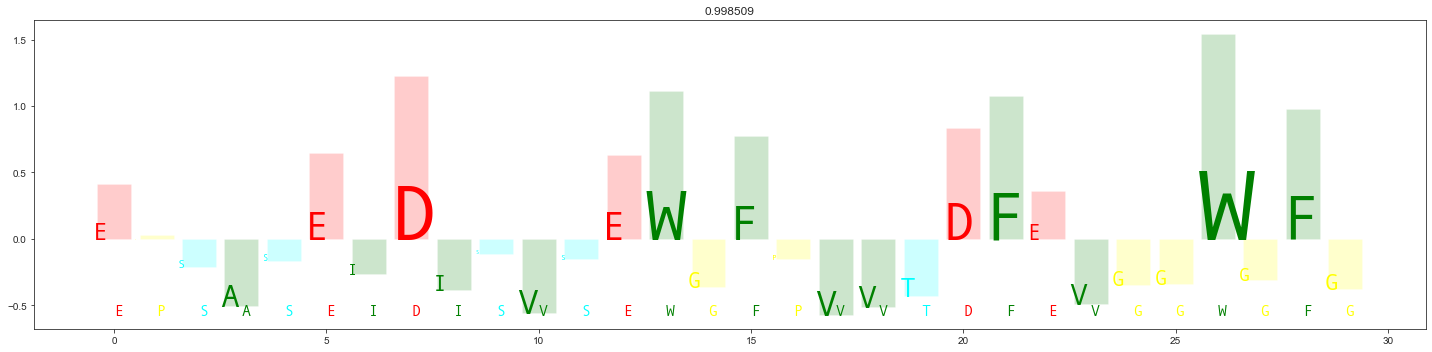

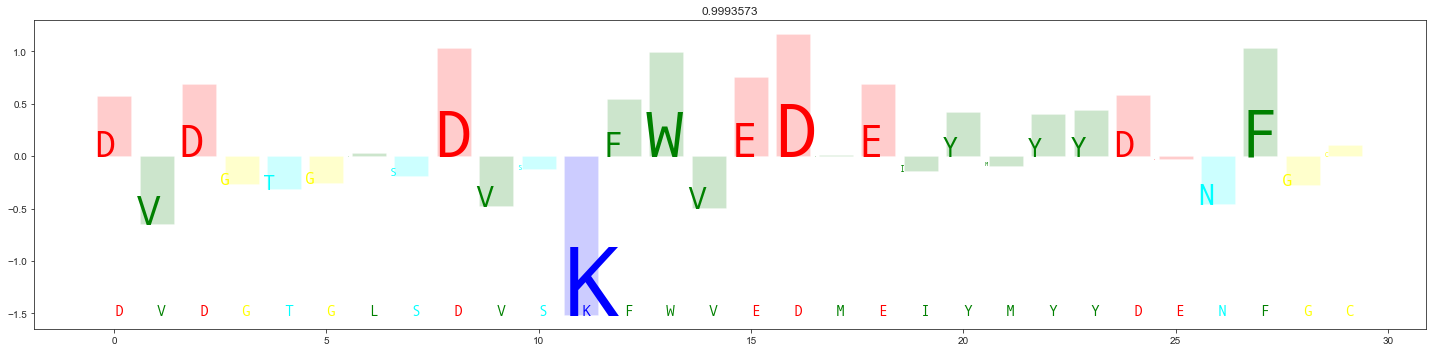

In [17]:
for i,j in zip(attributions_dl, preds1):
    f,ax1 = plt.subplots(1, figsize=(20,5))
    logo(i, j, ax1)

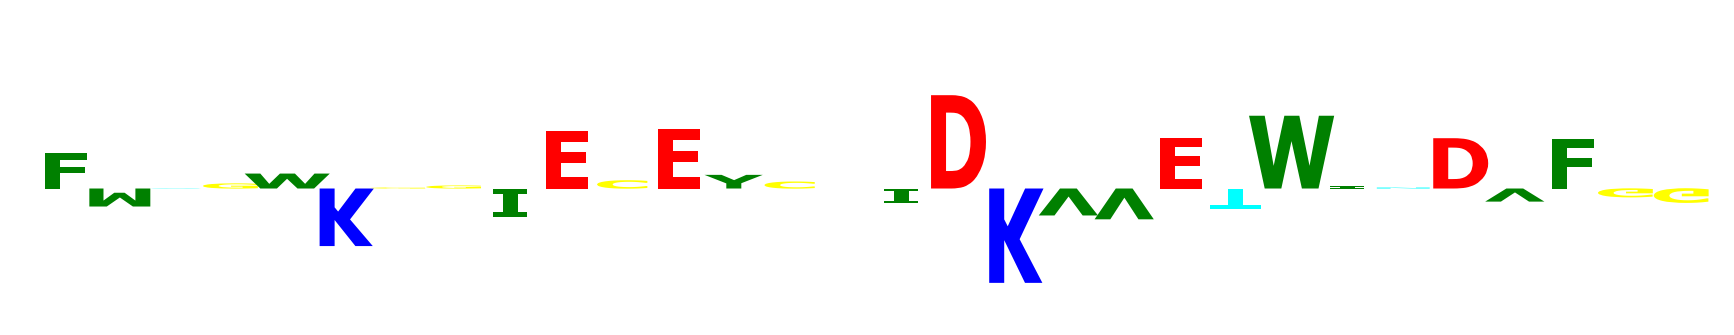

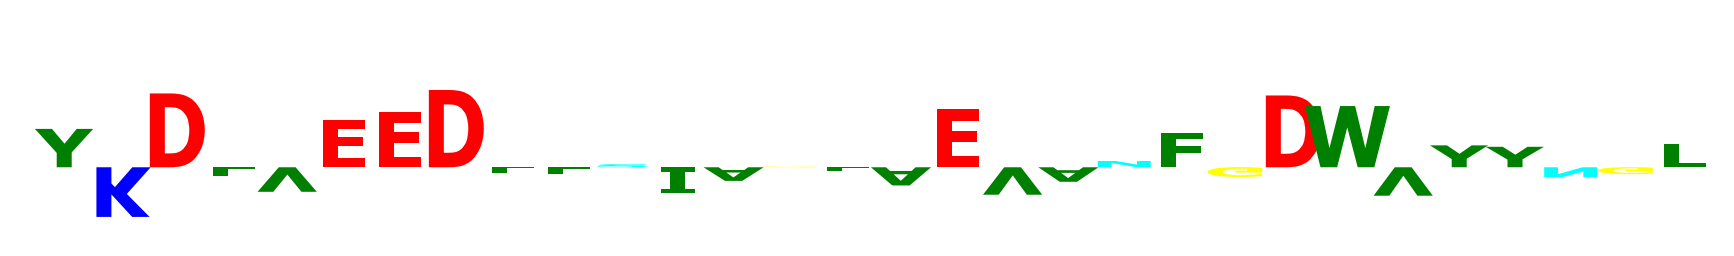

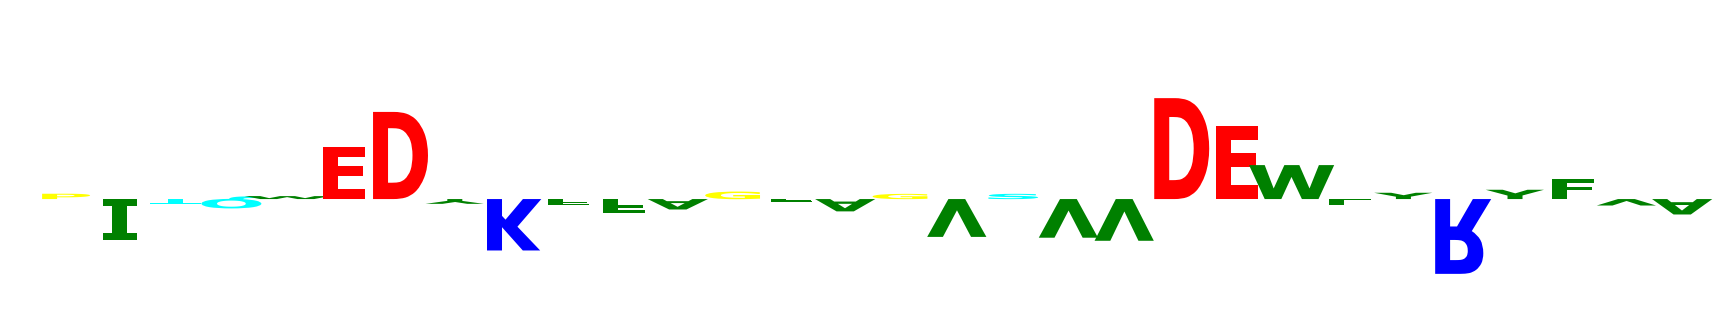

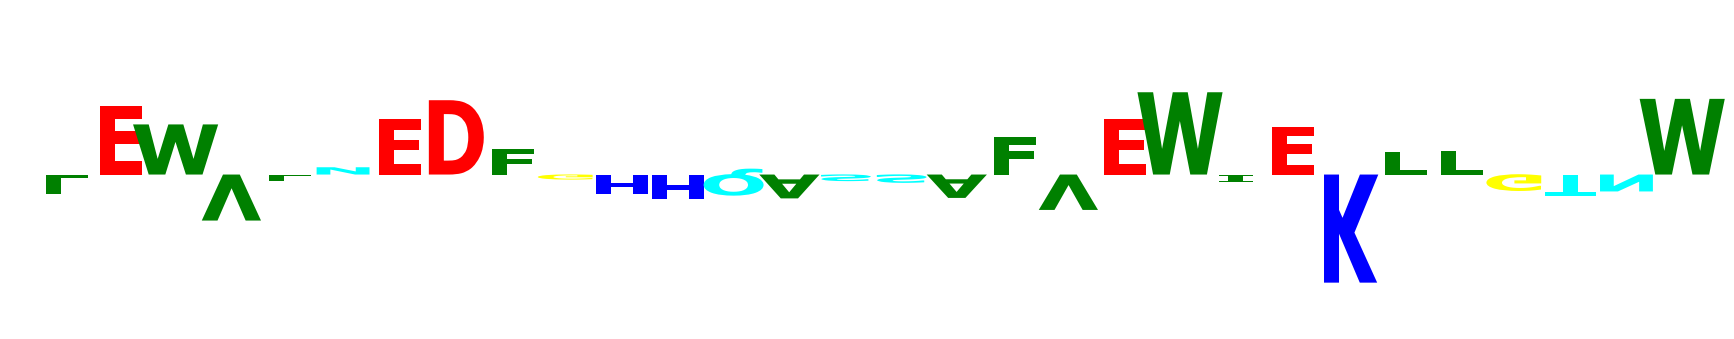

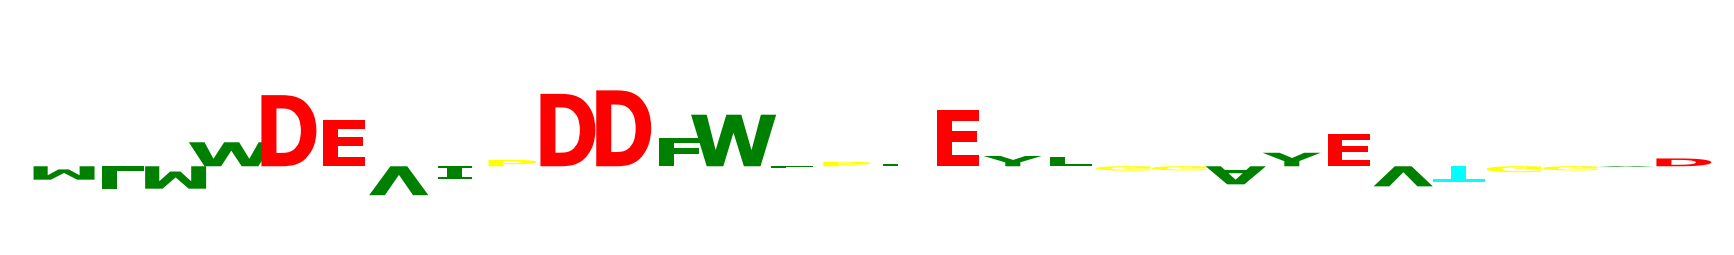

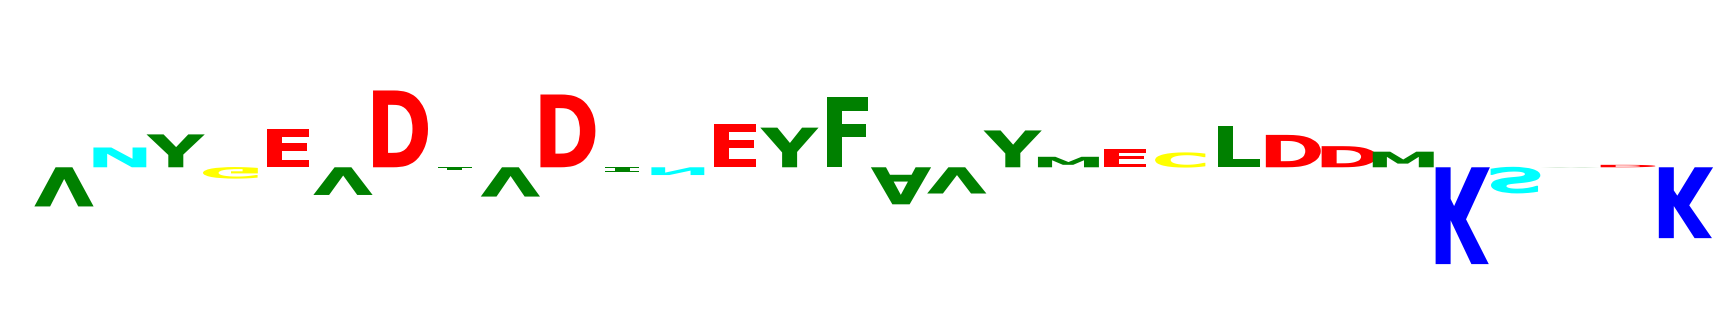

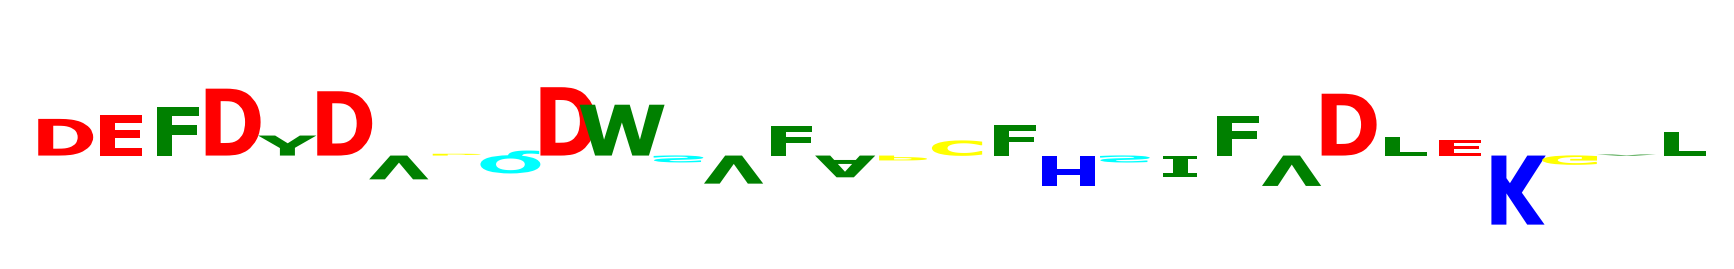

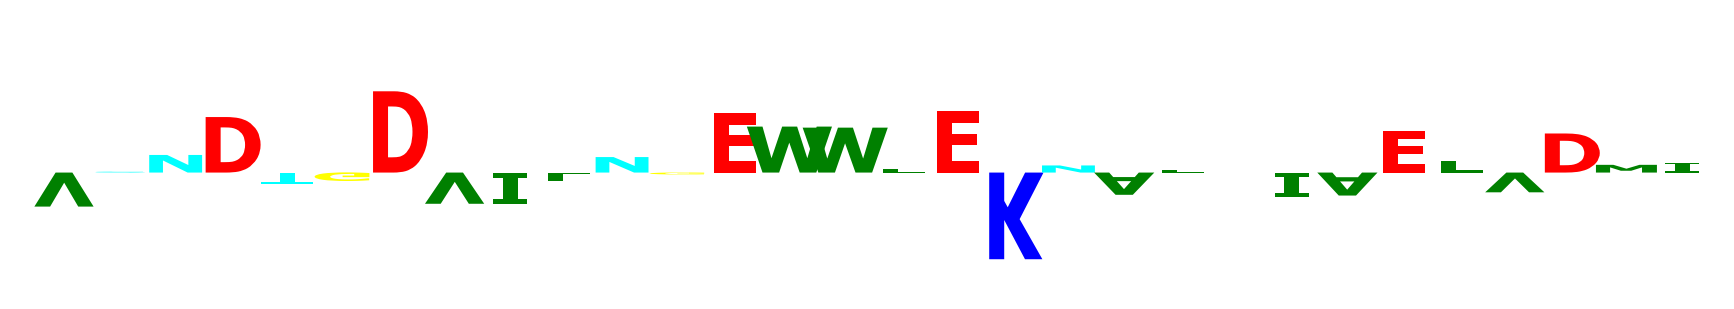

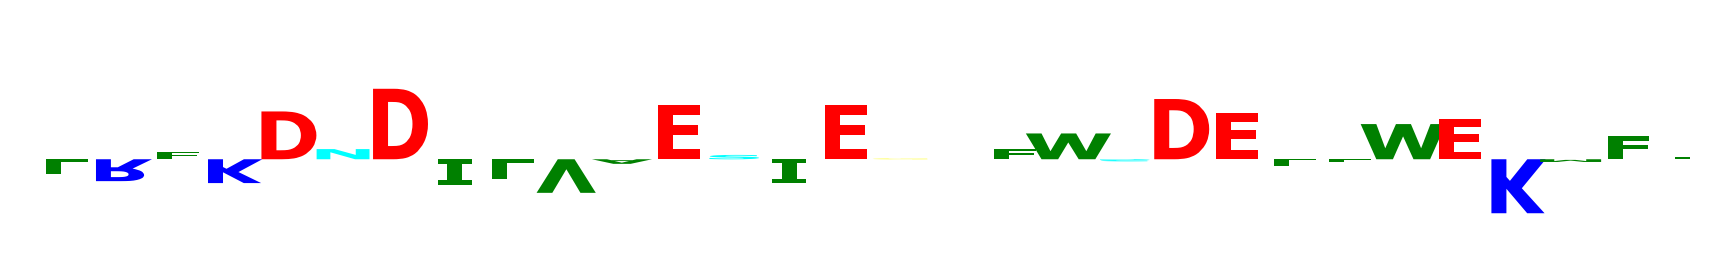

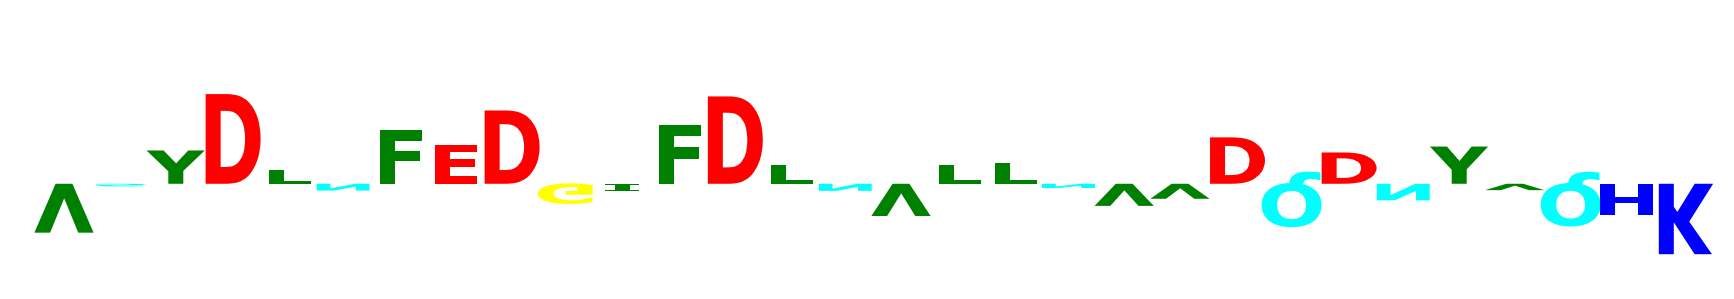

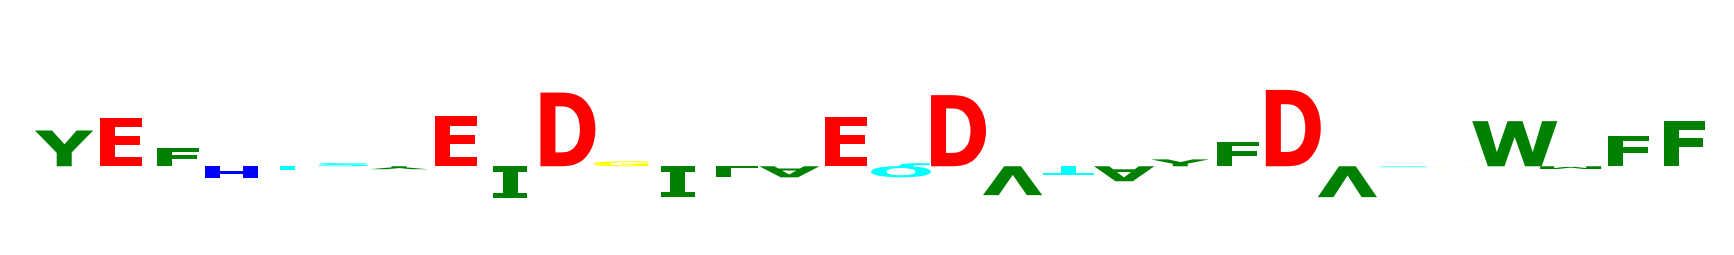

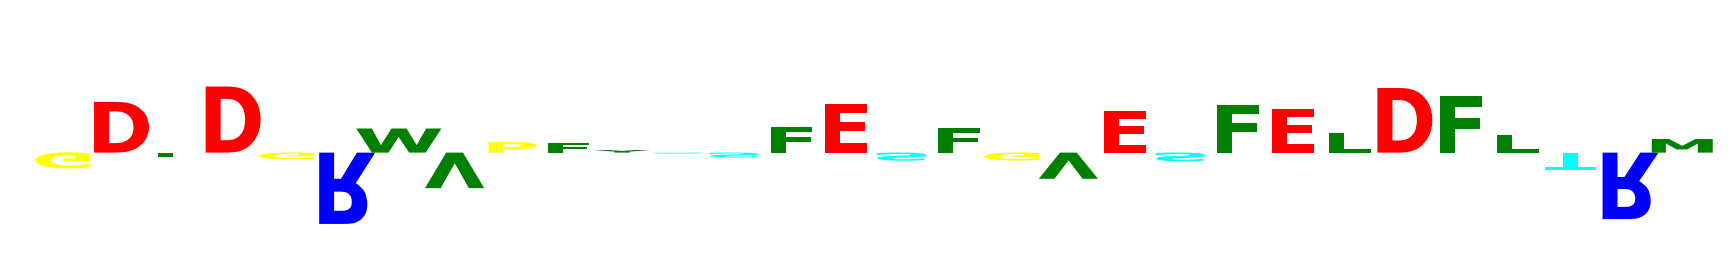

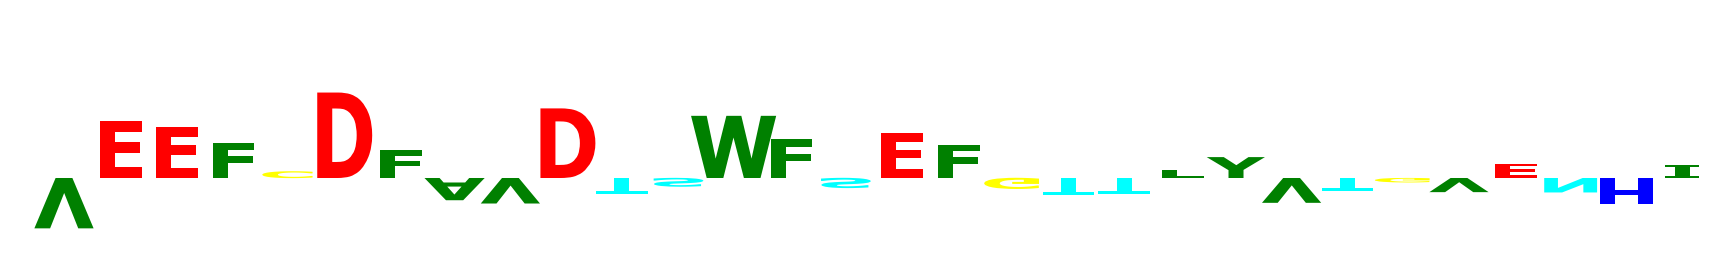

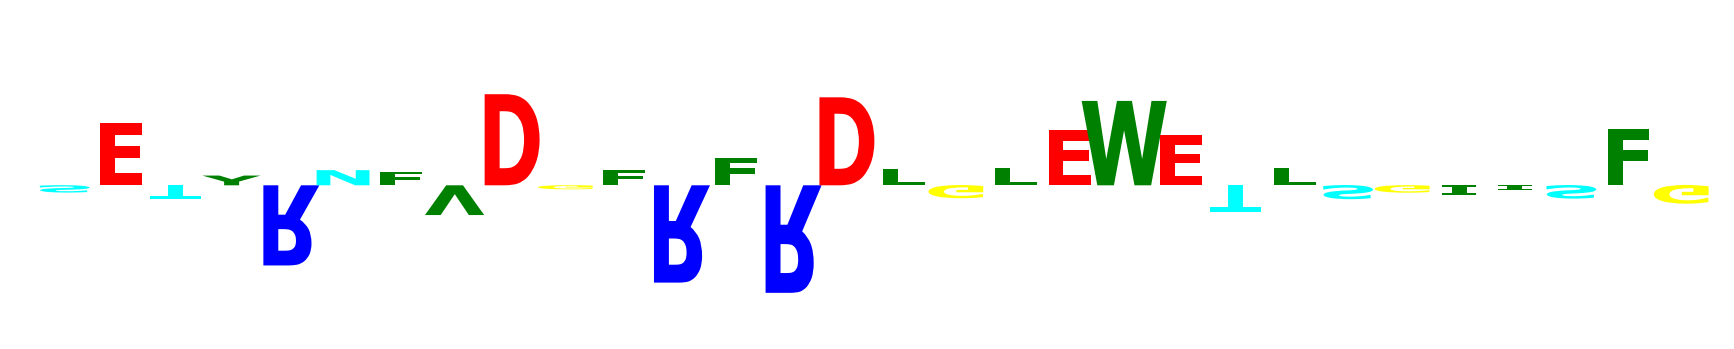

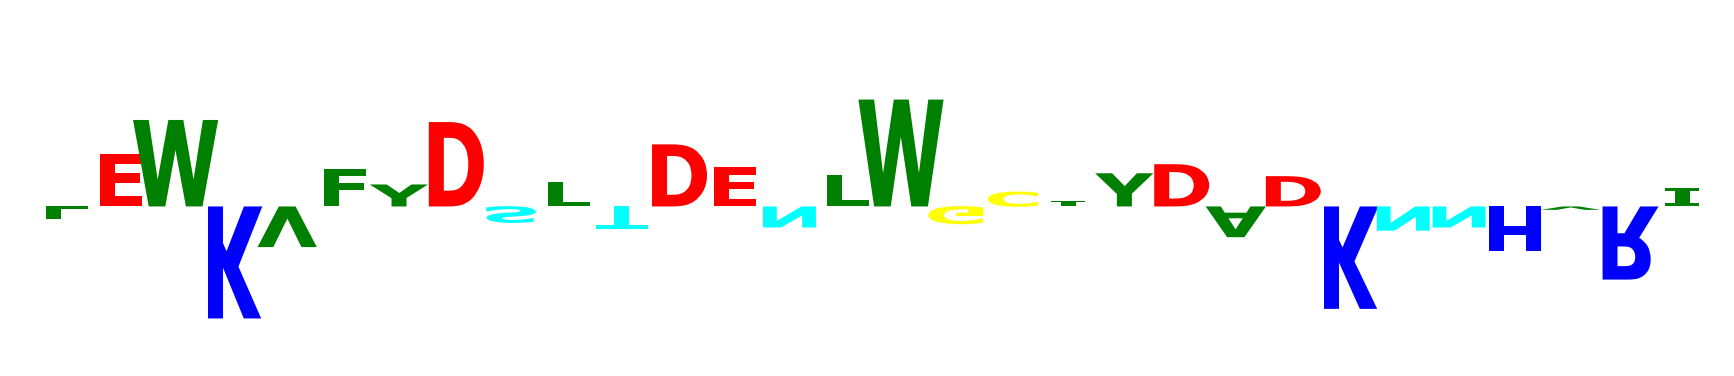

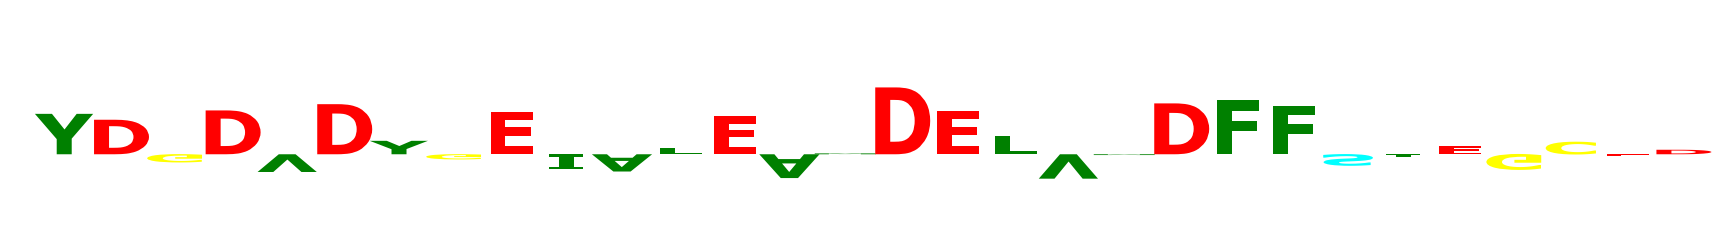

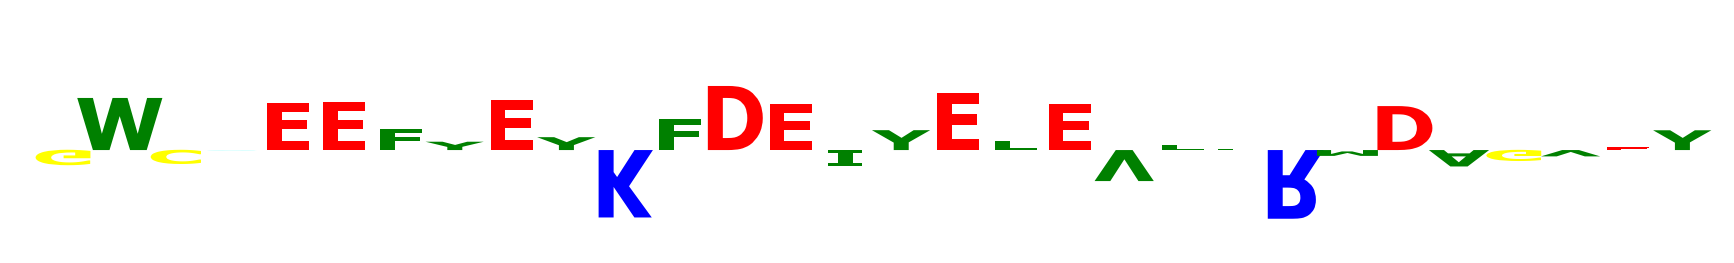

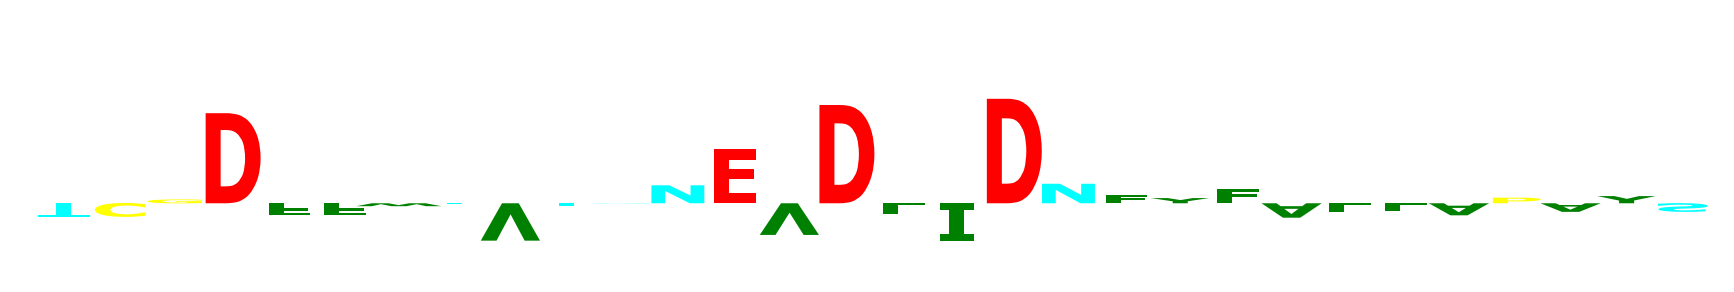

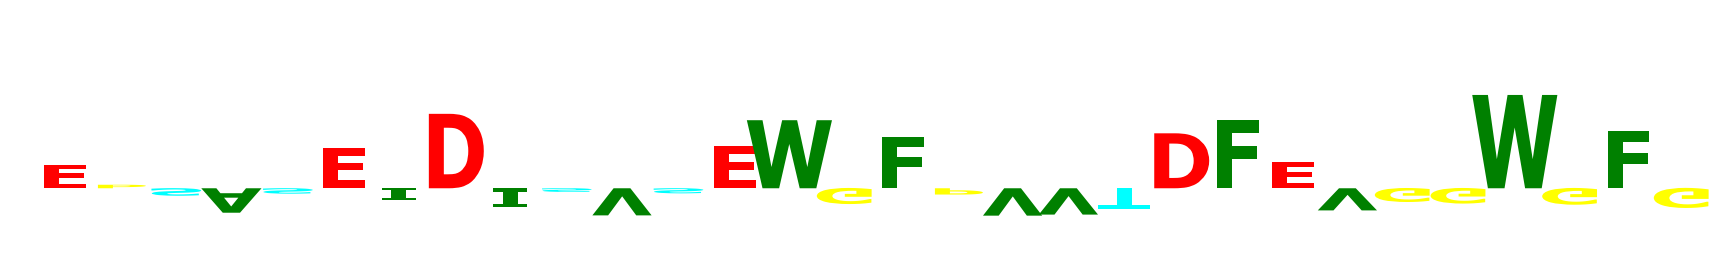

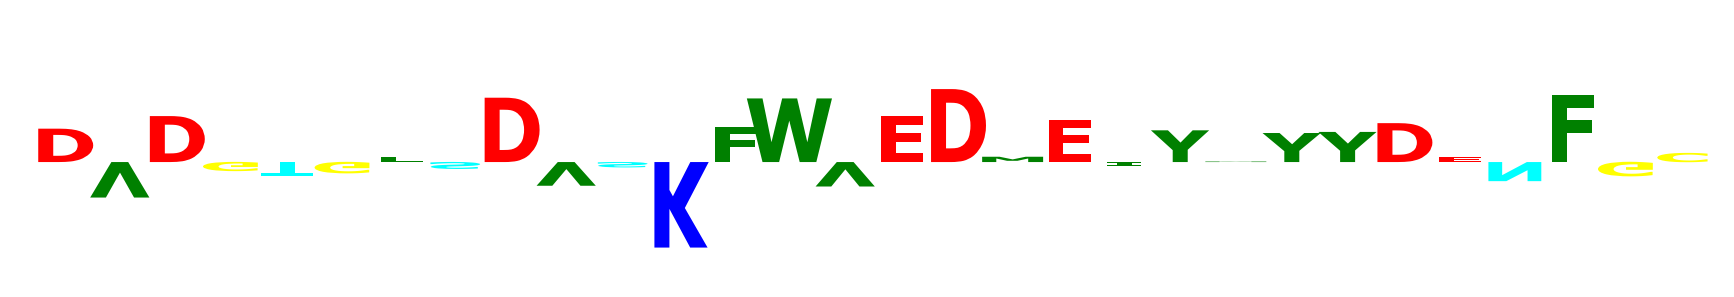

In [23]:
from matplotlib import transforms
import matplotlib.patheffects
from matplotlib.font_manager import FontProperties

class Scale(matplotlib.patheffects.RendererBase):
    def __init__(self, sx, sy=None):
        self._sx = sx
        self._sy = sy

    def draw_path(self, renderer, gc, tpath, affine, rgbFace):
        affine = affine.identity().scale(self._sx, self._sy)+affine
        renderer.draw_path(gc, tpath, affine, rgbFace)

def ohe_2_aa_analog(ohe_data):
    global ss
    seq = ohe_data[:,:20].reshape(30,20)
    SS =  ohe_data[:,20:].reshape(30,3)

    seq_list = []
    for i in seq:
        seq_list.append([(i,j) for i,j in zip(aa,i)])
        
    ss_list = []
    for i in SS:
        ss_list.append([(i,j) for i,j in zip(ss,i)])
        
    return seq_list, ss_list


# define color schemes
aa_1 = {i:'blue' for i in ['R','H','K']}
aa_2 = {i:'red' for i in ['D','E']}
aa_3 = {i:'cyan' for i in ['S','T','N','Q']}
aa_4 = {i:'green' for i in ['A','I','L','M','F','W','Y','V']}
aa_5 = {i:'yellow' for i in ['C','G','P']}

COLOR_SCHEME_AA = {**aa_1,**aa_2,**aa_3,**aa_4,**aa_5}

COLOR_SCHEME_SS = {'E': 'orange',
                   'H': 'blue',
                   '-': 'red'}

def draw_logo2(all_scores, filename, fontfamily='Arial', size=80, COLOR_SCHEME=COLOR_SCHEME_AA):
    if fontfamily == 'xkcd':
        plt.xkcd()
    else:
        matplotlib.rcParams['font.family'] = fontfamily

    fig, ax = plt.subplots(figsize=(len(all_scores), 2.5))

    font = FontProperties()
    font.set_size(size)
    font.set_weight('bold')
    
    #font.set_family(fontfamily)

    ax.set_xticks(range(1,len(all_scores)+1))    
    ax.set_yticks(range(0,6))
    ax.set_xticklabels(range(1,len(all_scores)+1), rotation=90)
    ax.set_yticklabels(np.arange(-3,3,1))    
    sns.despine(ax=ax, trim=True)
    
    trans_offset = transforms.offset_copy(ax.transData,fig=fig, x=1, y=0,units='dots')
   
    for index, scores in enumerate(all_scores):
        yshift = 0
        for base, score in scores:
            txt = ax.text(index+1, 3, base,transform=trans_offset,fontsize=80, color=COLOR_SCHEME[base],ha='center',fontproperties=font,)
            txt.set_path_effects([Scale(1.0, score)])
            fig.canvas.draw()
            window_ext = txt.get_window_extent(txt._renderer)
            yshift = window_ext.height*score
            trans_offset = transforms.offset_copy(txt._transform, fig=fig, y=yshift, units='points')
        trans_offset = transforms.offset_copy(ax.transData, fig=fig, x=1, y=0, units='points')    
    plt.axis('off')
    plt.savefig(filename)
    
for i in range(len(attributions_dl)):
    ALL_SCORES1, aSS1 = ohe_2_aa_analog(attributions_dl[i])
    draw_logo2(ALL_SCORES1, 'lala_AA.png', 'Verdana', COLOR_SCHEME=COLOR_SCHEME_AA)

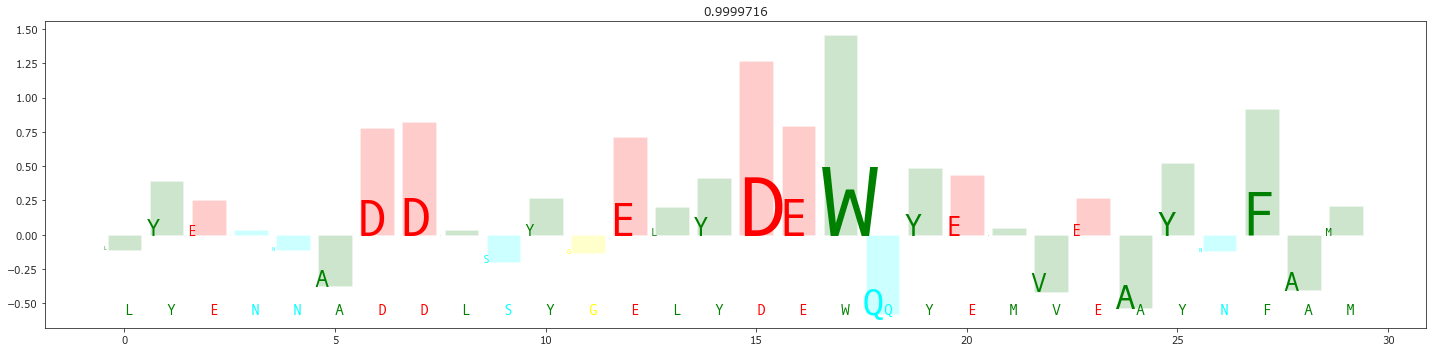

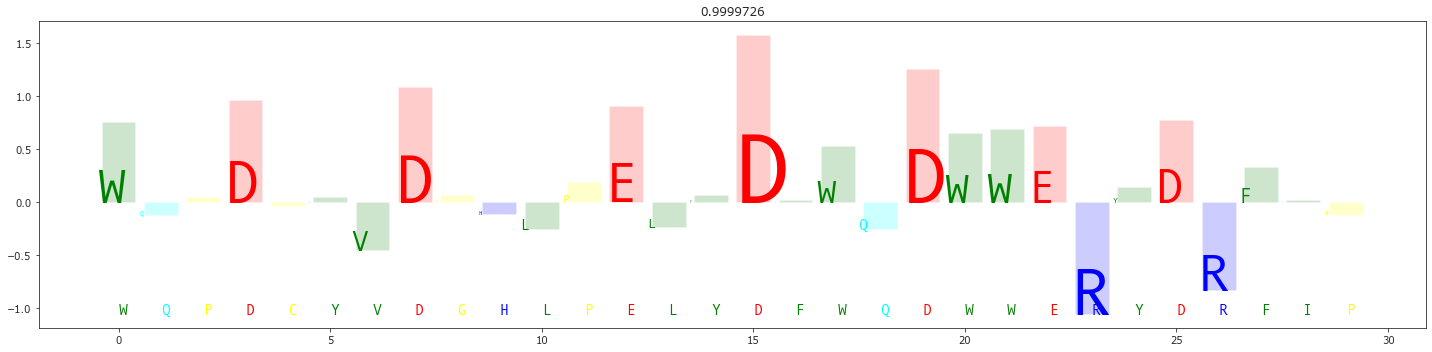

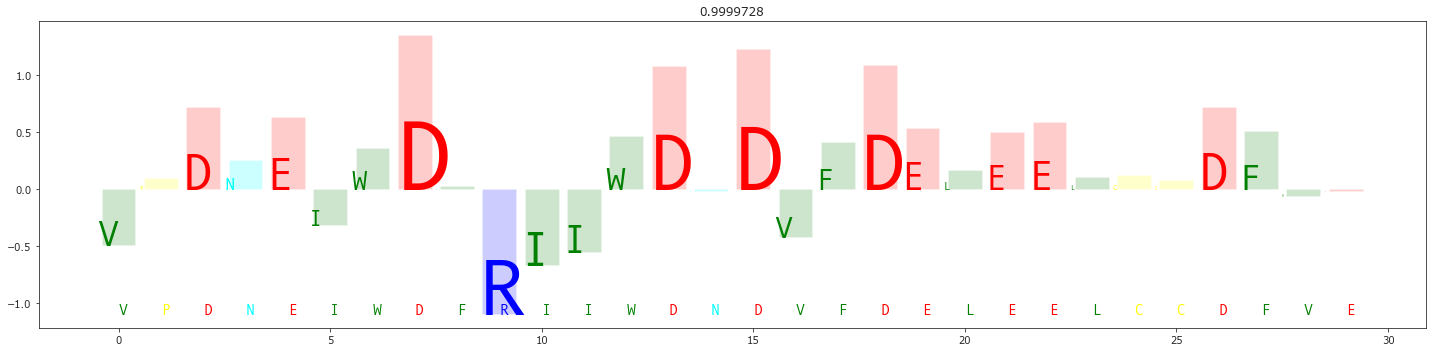

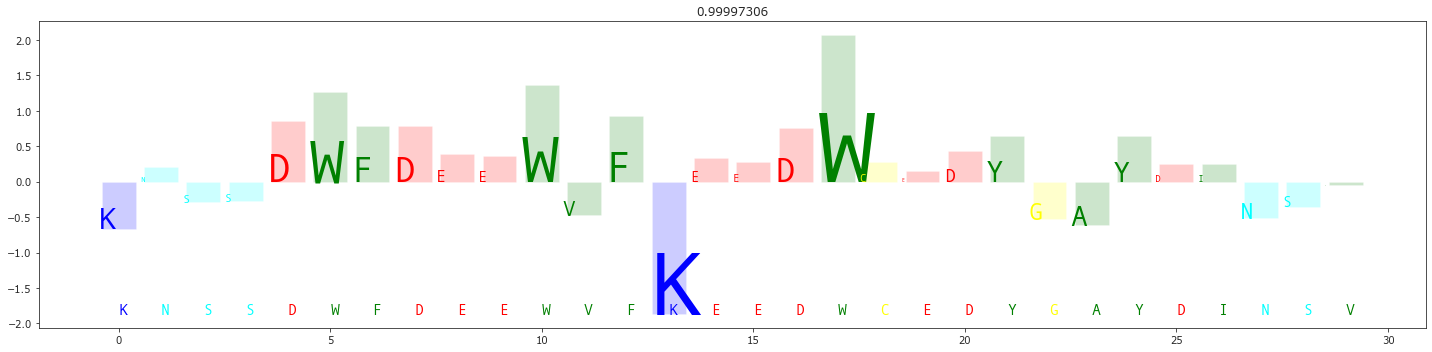

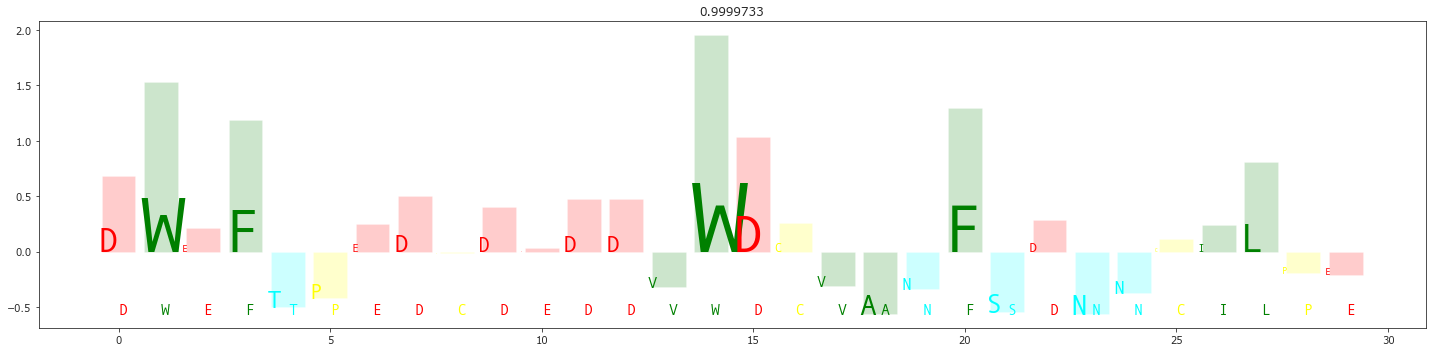

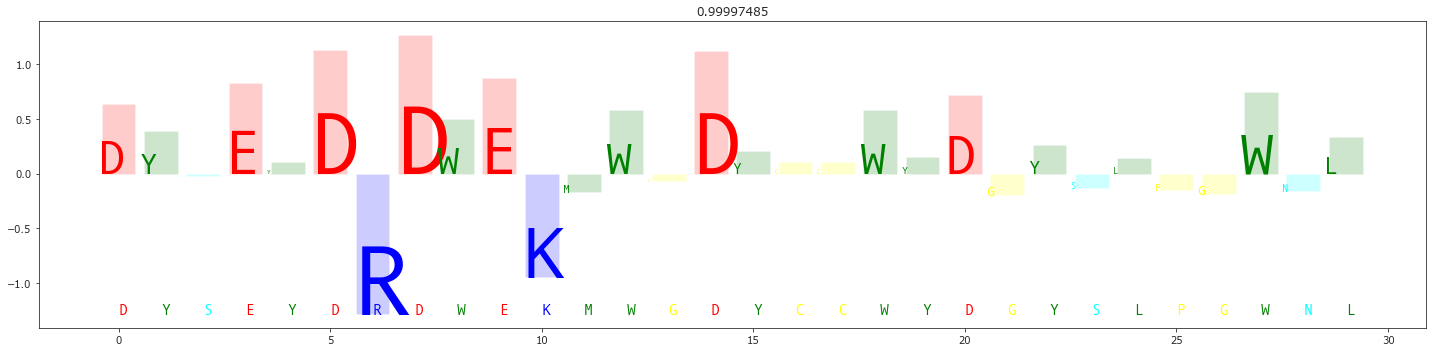

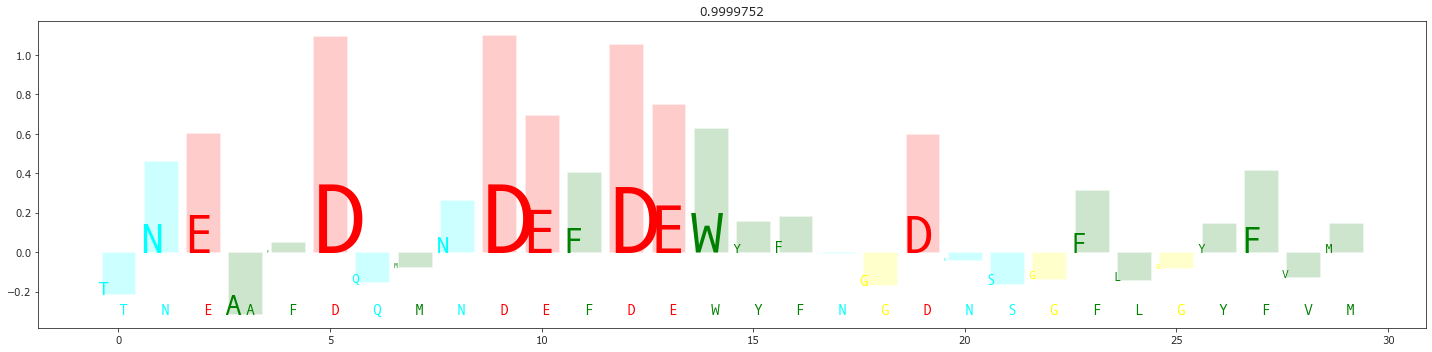

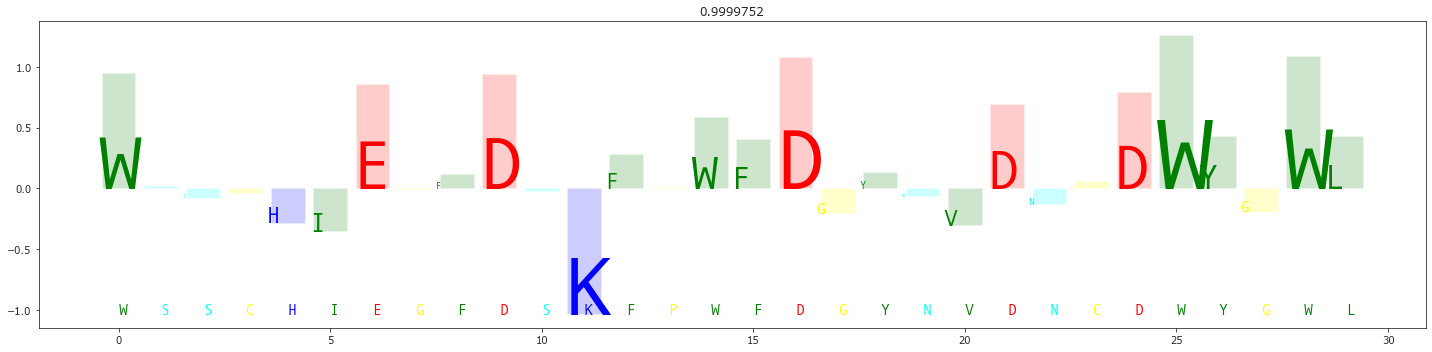

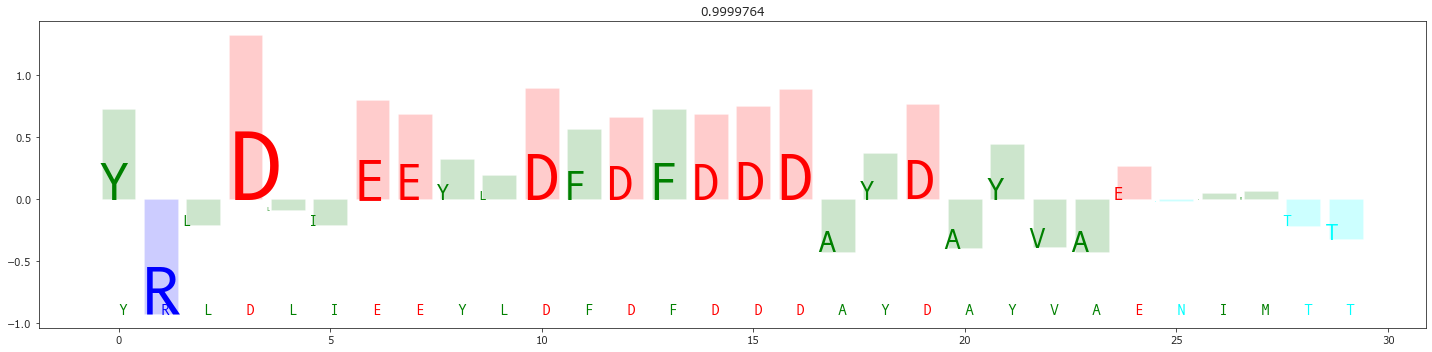

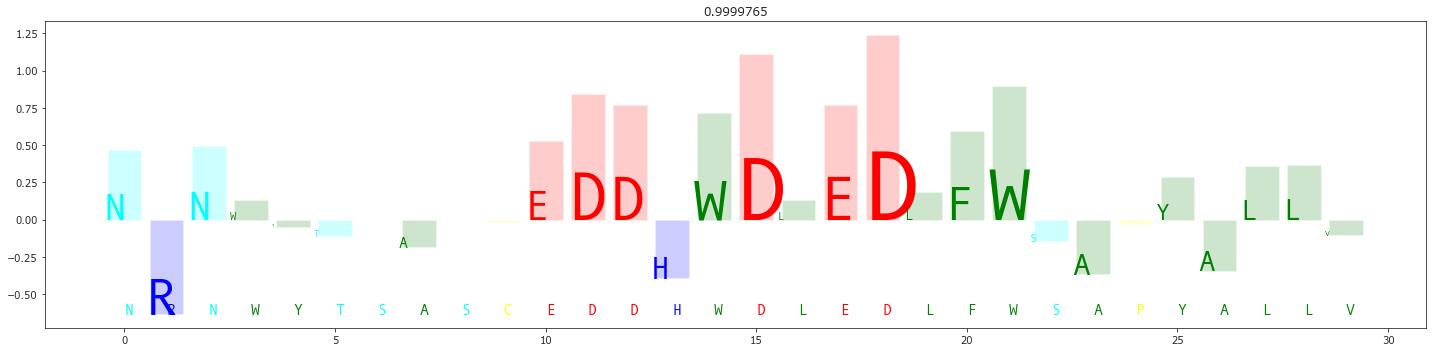

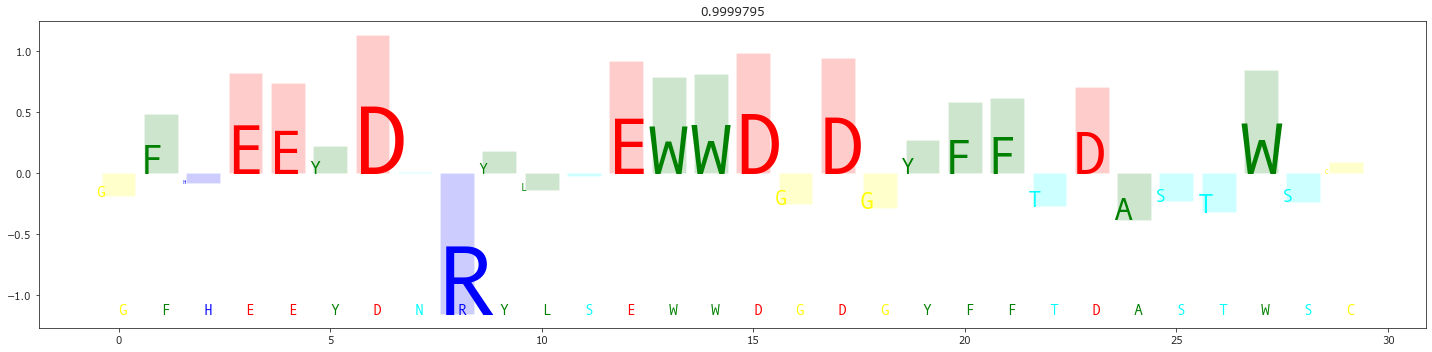

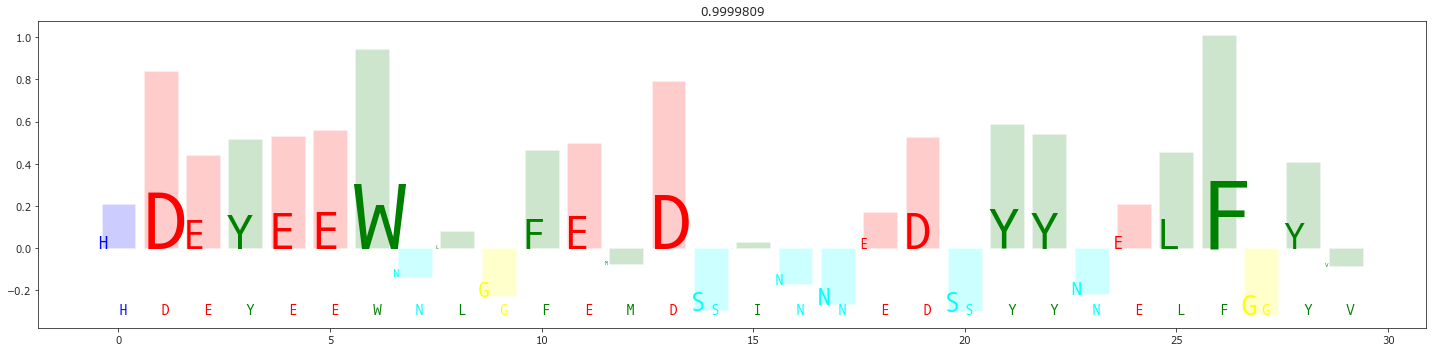

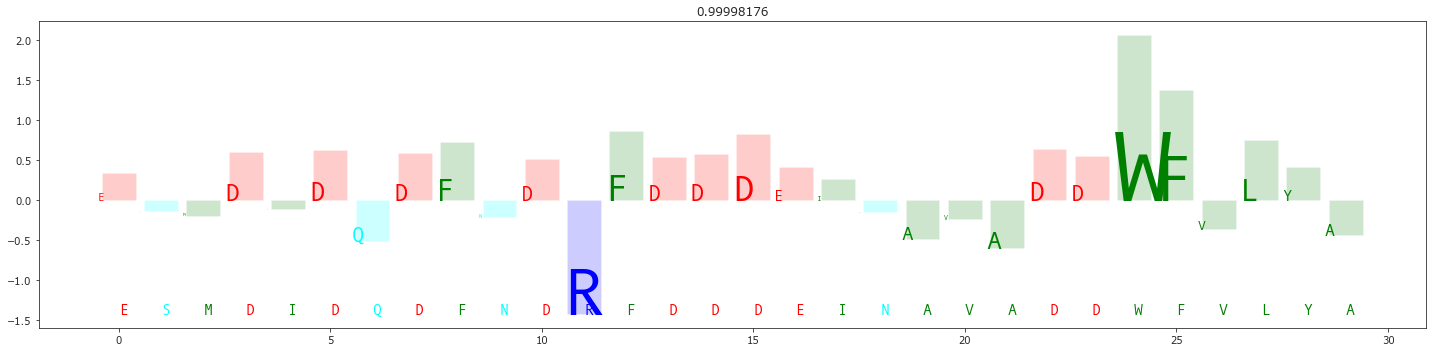

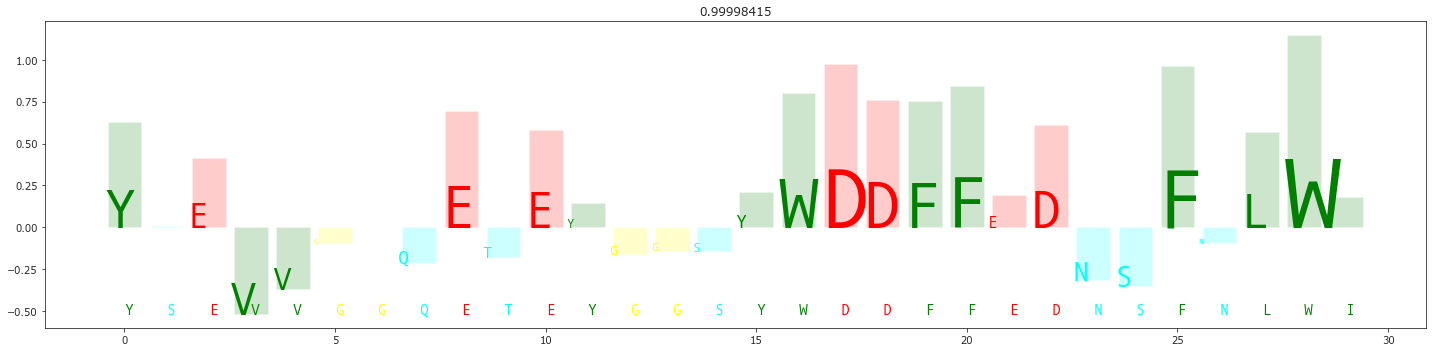

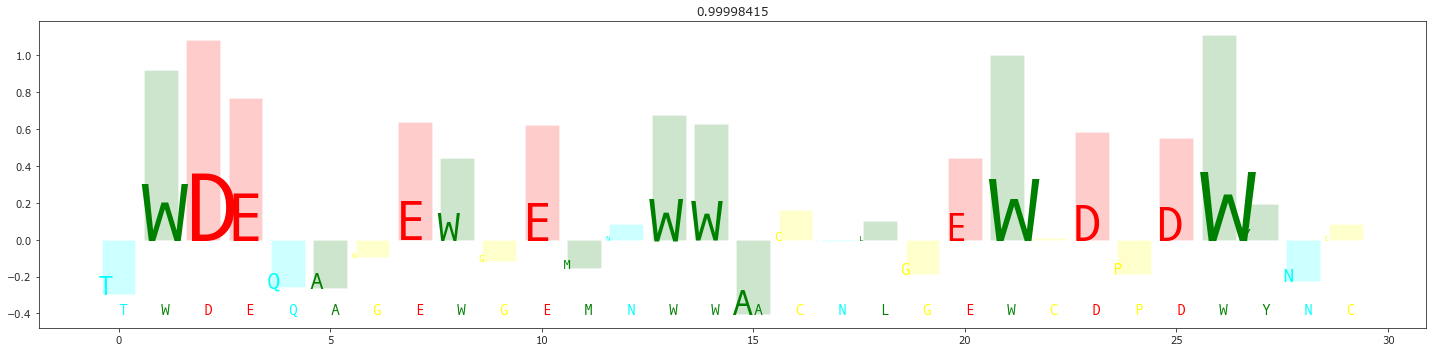

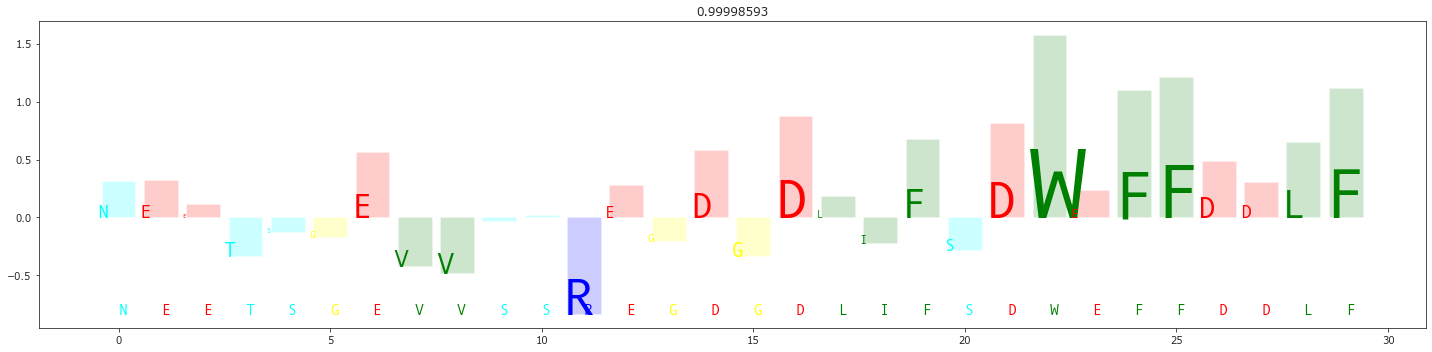

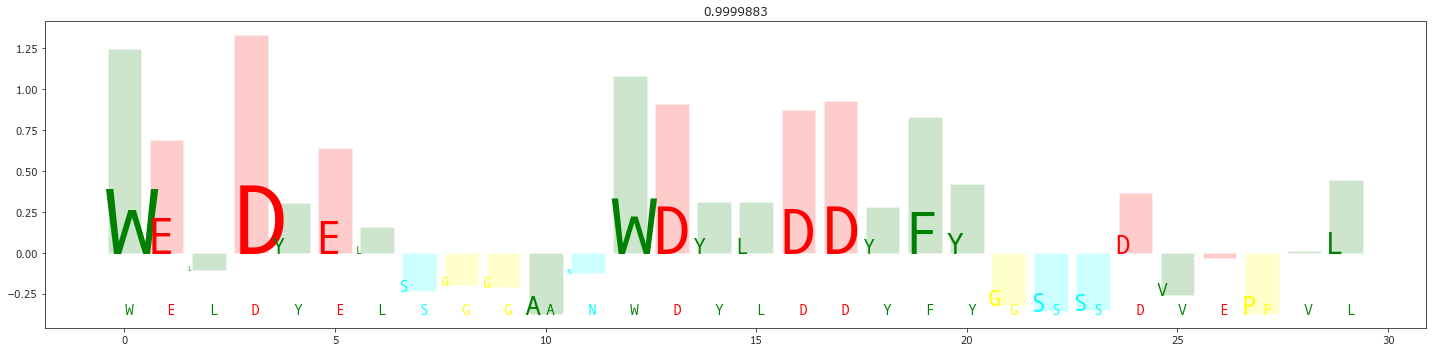

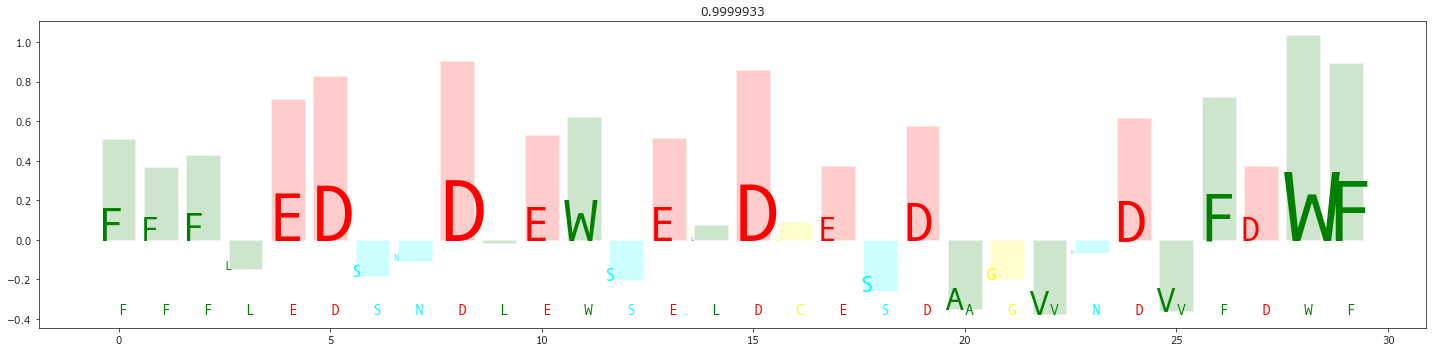

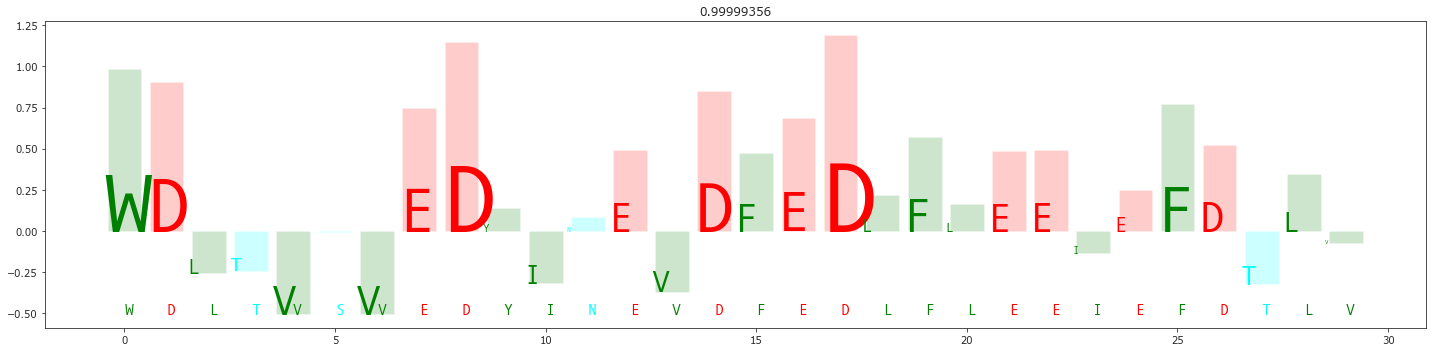

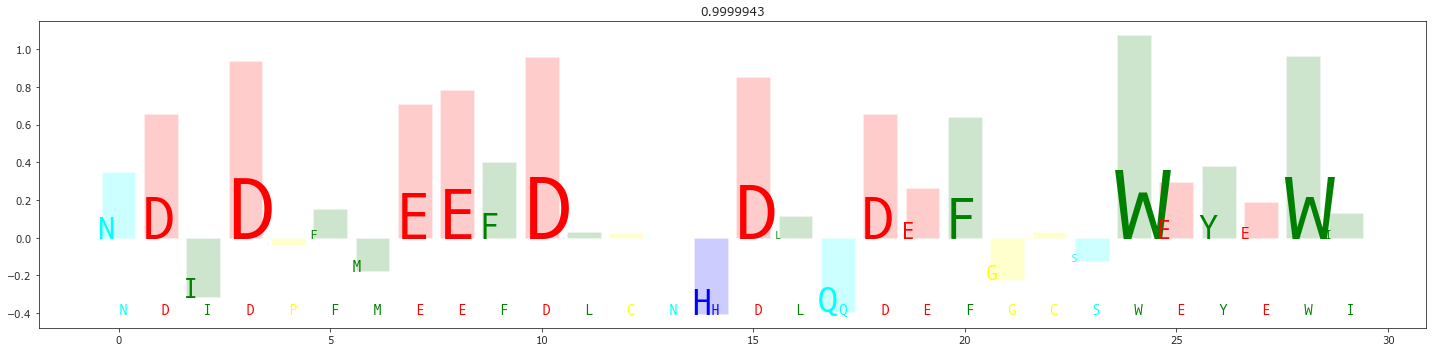

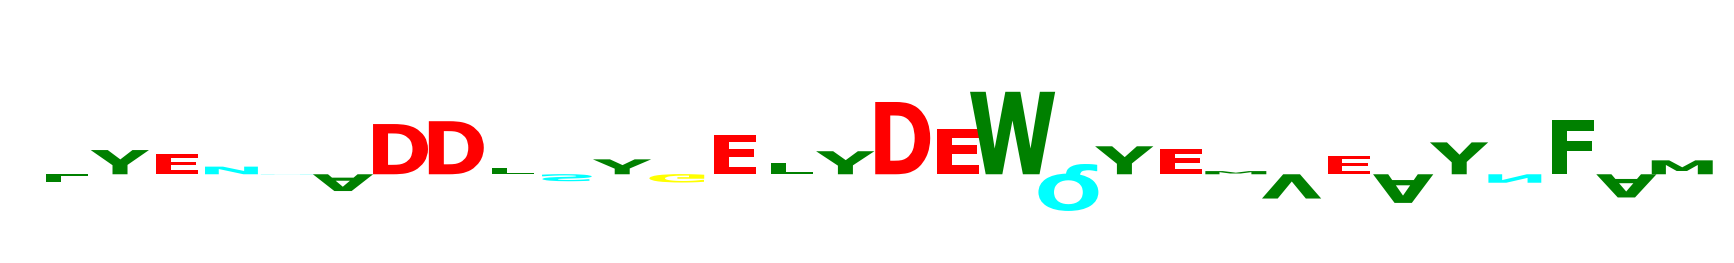

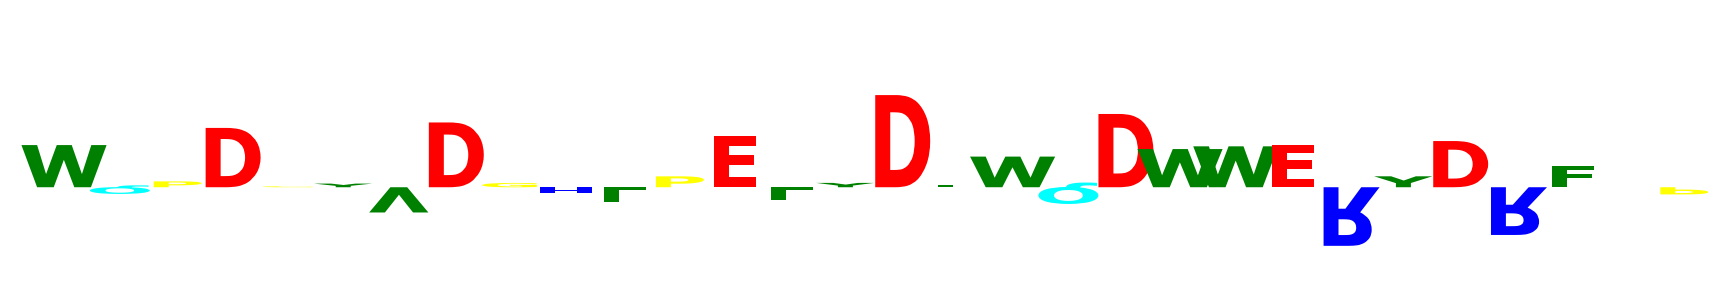

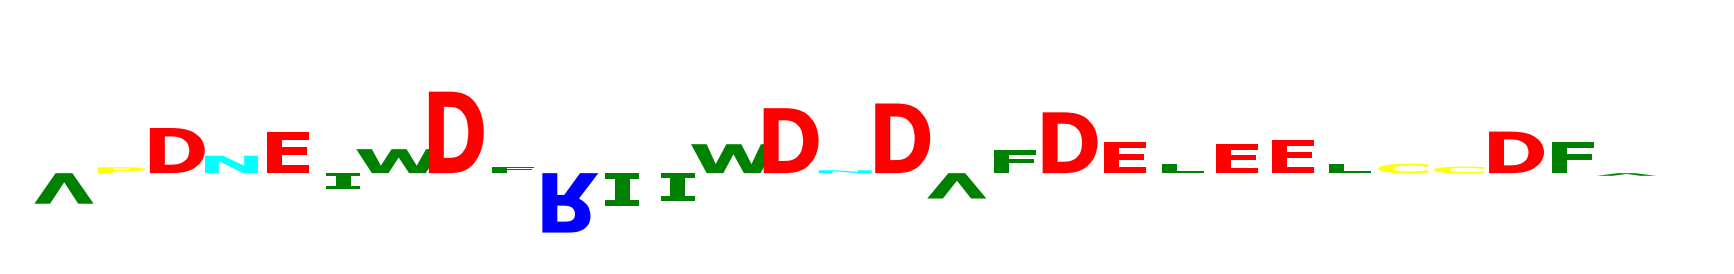

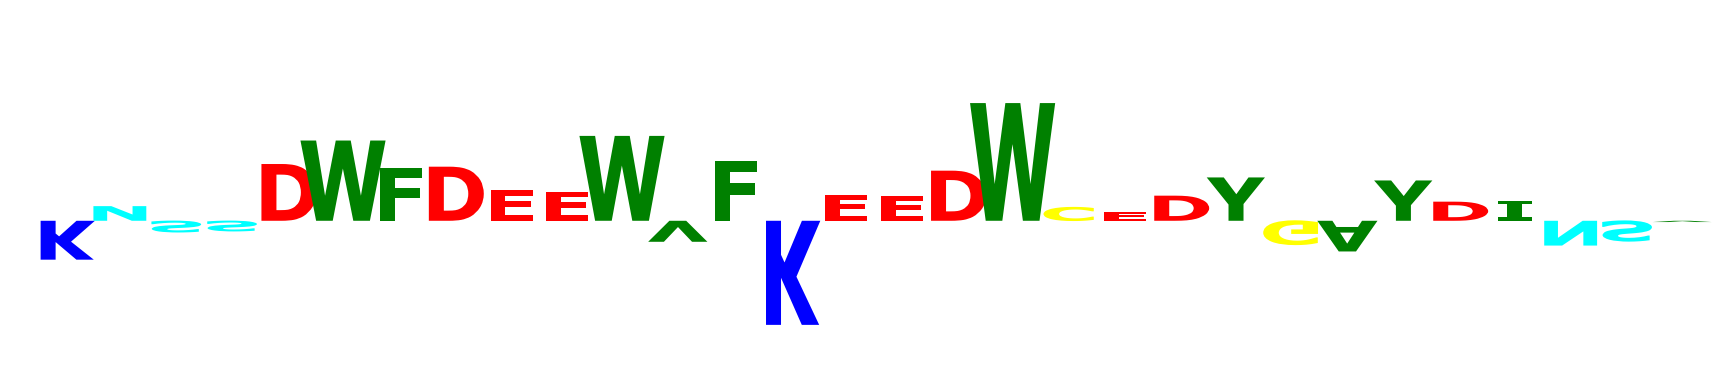

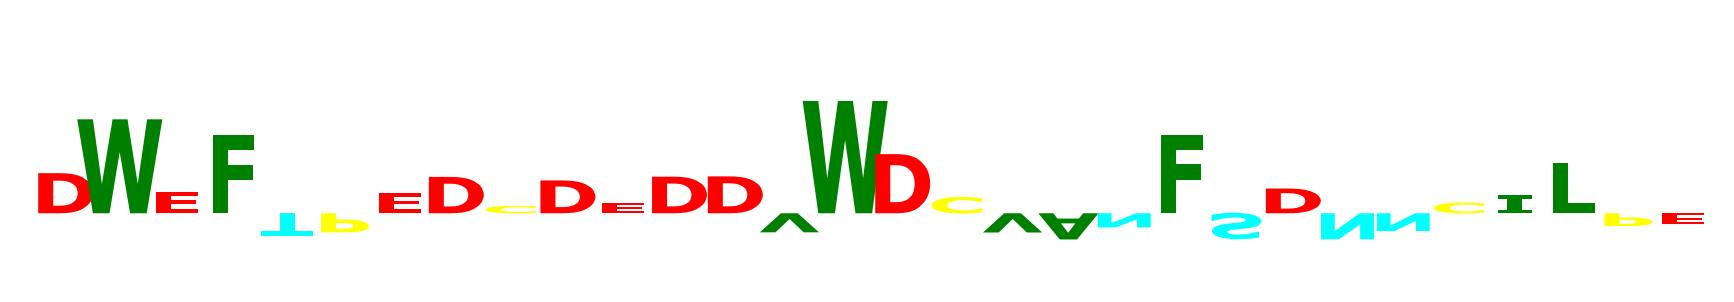

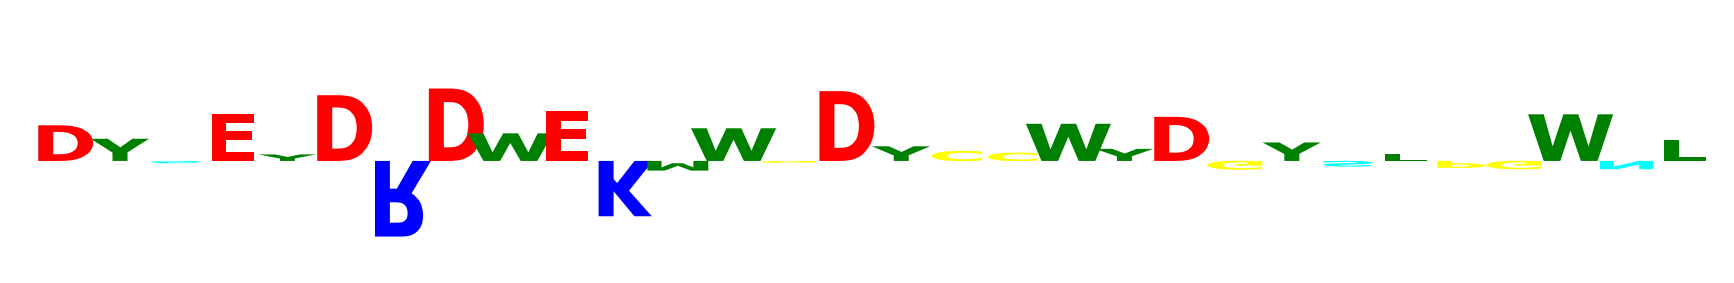

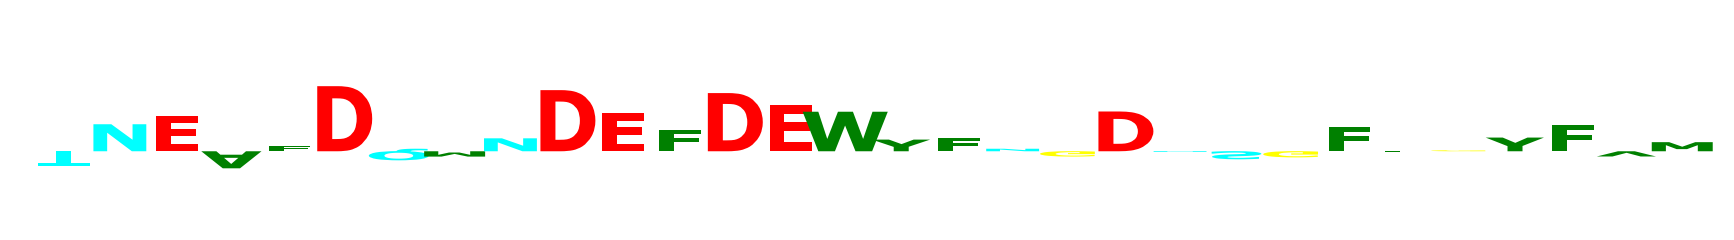

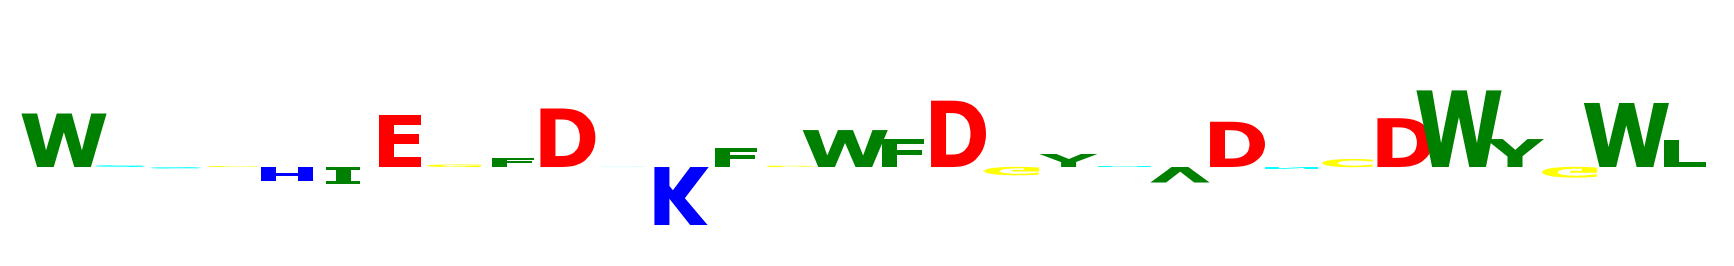

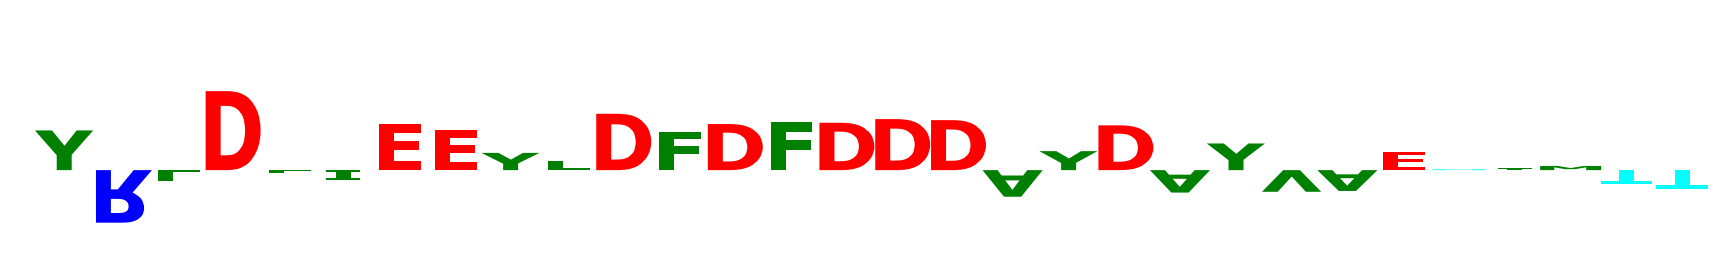

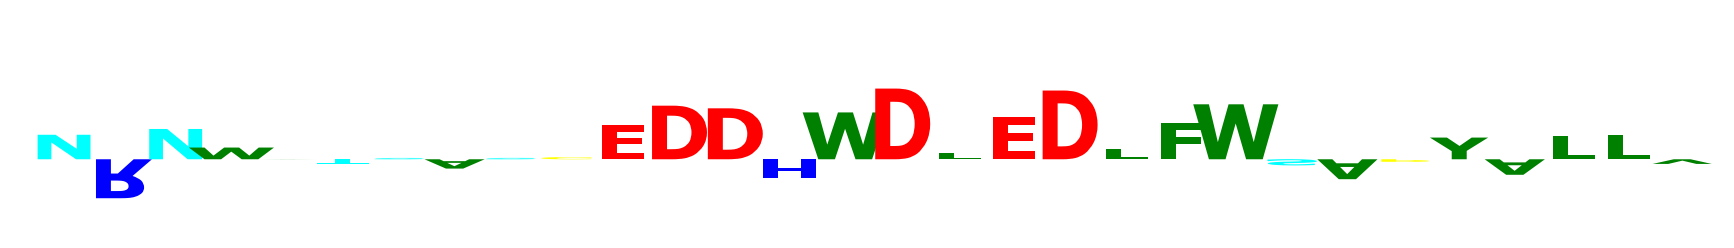

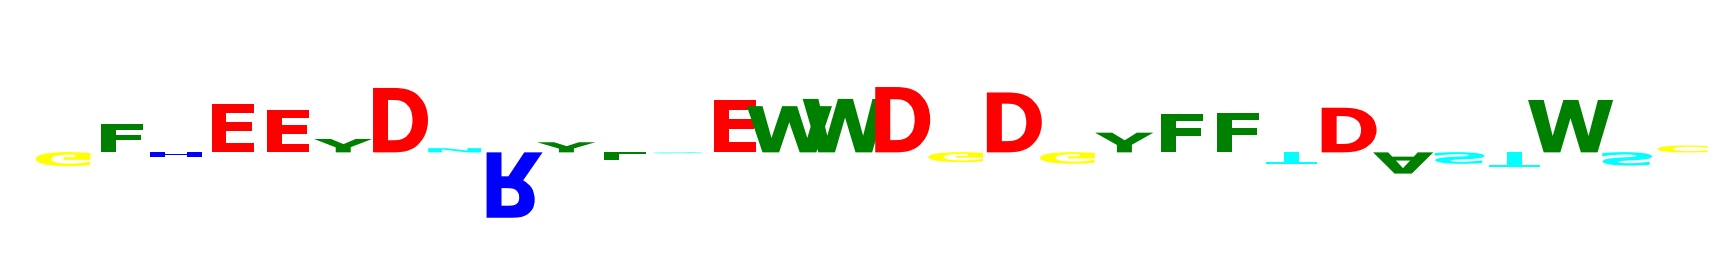

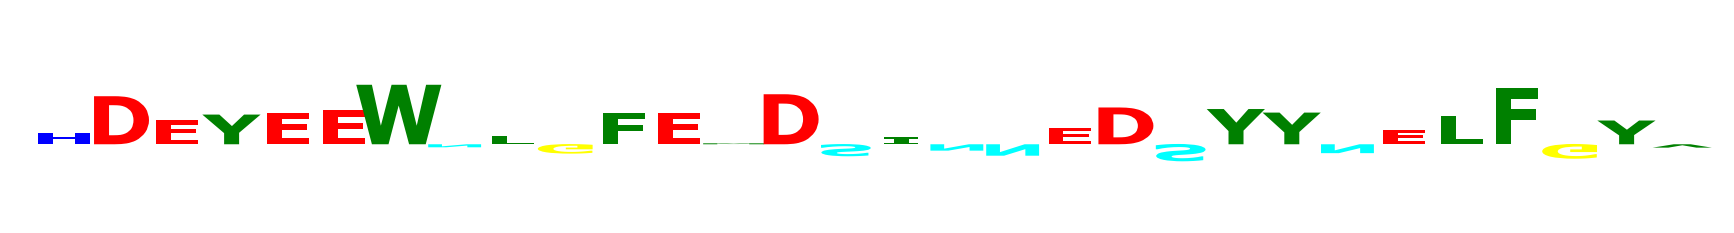

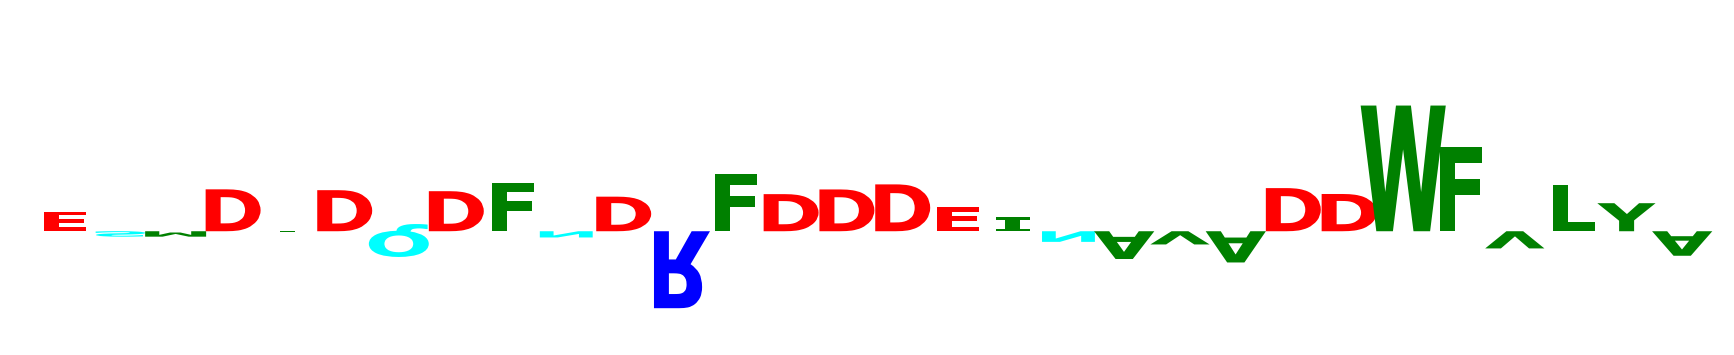

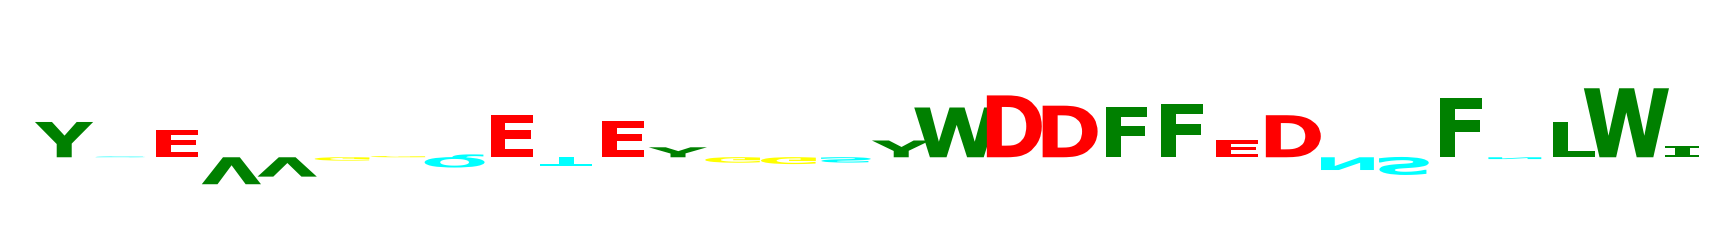

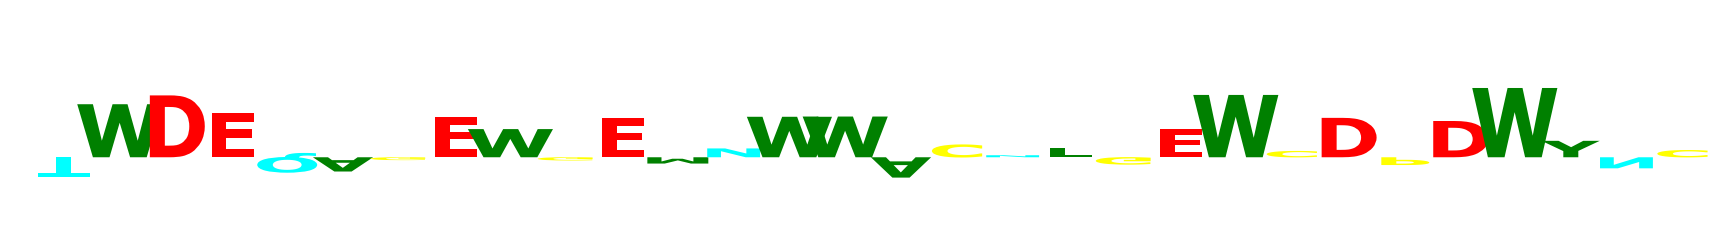

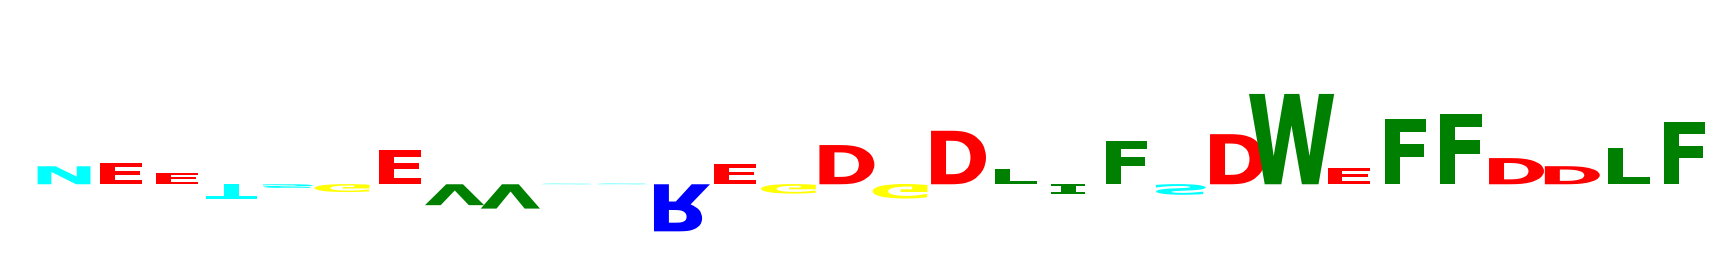

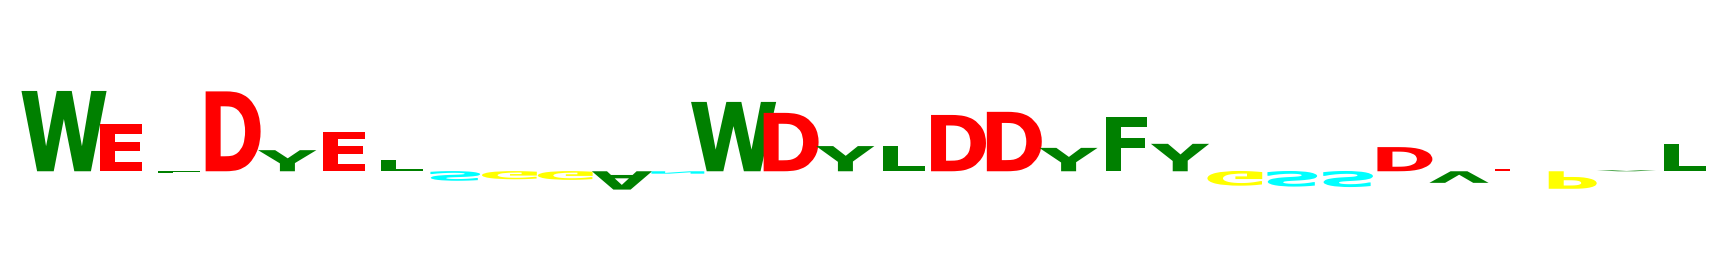

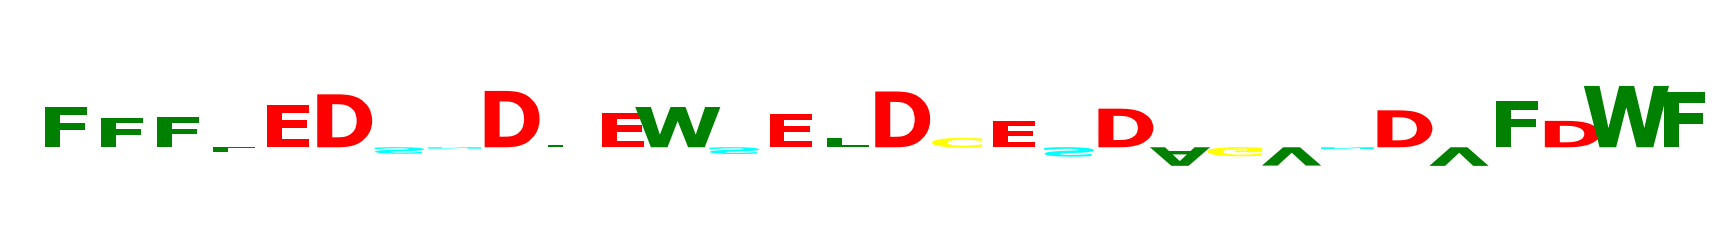

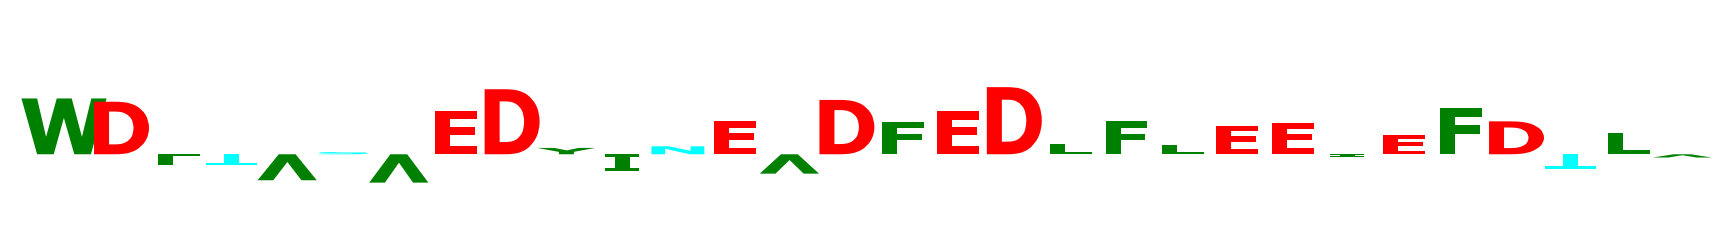

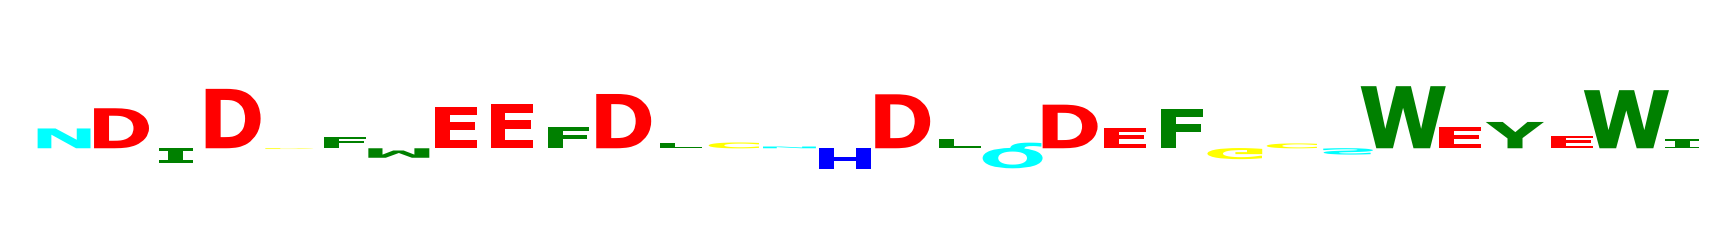

In [24]:
with DeepExplain(session=K.get_session()) as de:
    input_tensor = ADPred.layers[0].input
    fModel = Model(inputs=input_tensor, outputs = ADPred.layers[-2].output)
    target_tensor = fModel(input_tensor)
    
    s0 = ohes2.shape[0]
    xs = ohes2.reshape(s0,30,23,1)
    ys = preds2.reshape(s0,1)
    
    #attributions_gradin = de.explain('grad*input', target_tensor, input_tensor, xs, ys=ys)
    #attributions_sv     = de.explain('shapley_sampling', target_tensor, input_tensor, xs, ys=ys, samples=100)
    attributions_dl     = de.explain('deeplift', target_tensor, input_tensor, xs, ys=ys)
    
for i,j in zip(attributions_dl, preds2):
    f,ax1 = plt.subplots(1, figsize=(20,5))
    logo(i, j, ax1)
    
for i in range(len(attributions_dl)):
    ALL_SCORES1, aSS1 = ohe_2_aa_analog(attributions_dl[i])
    draw_logo2(ALL_SCORES1, 'lala_AA.png', 'Verdana', COLOR_SCHEME=COLOR_SCHEME_AA)

In [2]:
df = pd.read_csv(analysis_home+'/data/pnas2015.tsv', sep='\t', header=None, index_col=0)
df

1      2
0                     
AVVESLFSS  1.45  0.495
AVFESLFSS  2.56  0.164
AVYESLFSS  2.01  0.403
AVLESLFSS  1.32  0.046
AVIESLFSS  2.13  0.253
...         ...    ...
AVWESLQSS  1.97  0.401
AVWESLESS  1.56  0.236
AVWESLKSS  1.33  0.247
AVWESLRSS  1.51  0.206
AVWESLHSS  1.51  0.243

[171 rows x 2 columns]